# Import stuff

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re

from nltk.tokenize import word_tokenize
import twokenize
matplotlib.style.use('ggplot')
pd.options.display.max_colwidth = 100

# ReadFile in

In [2]:
directory = "data/crawled-tweets/"
filename = "master-11-07-2016.csv"
src_file = directory+filename

#size of wordembeddings
dimensions = 52

df = pd.read_csv(src_file, names=["User", "timestamp_ms", "tweet", "longitude", "latitude", "retweet_count", "favorite_count", "flag"])

In [3]:
df.head(10)

User   timestamp_ms  \
0   123790755  1467376528316   
1  1442442398  1467376529077   
2   298585296  1467376529203   
3    28834284  1467376529113   
4    27009134  1467376529303   
5    49985646  1467376529400   
6  4658015859  1467376529390   
7   421976071  1467376529514   
8   409357313  1467376529910   
9   152766660  1467376529870   

                                                                                                 tweet  \
0                                   #thedreamhunter is now trending in #London https://t.co/K1m5a2DSnm   
1                                                                        @connoroneil__ cheers buddy X   
2                     I love when Del Potro gets behind a forehand. He can just destroy a tennis ball.   
3                                                       Well this is confusing https://t.co/uouPRGfeYw   
4     The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW   
5                                    End of an era at United. Giggs is set to leave. #tearingthemapart   
6  ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...   
7                                                     @archiebald06 cost us £30 each more but fuck it!   
8                                                      @jaydevDevlin it's only a small get together...   
9                                        @mshgodwin I'm thinking the second option, what do you think?   

   longitude   latitude  retweet_count  favorite_count  flag  
0  -0.163024  51.511755              0               0     2  
1  -3.032089  53.841189              0               0     2  
2  -2.298134  52.847090              0               0     2  
3  -0.186833  51.127727              0               0     2  
4  -6.300177  53.343303              0               0     1  
5  -3.143354  51.669456              0               0     2  
6  -0.127318  51.507115              0               0     1  
7   1.302505  51.132408              0               0     2  
8  -6.247621  53.354903              0               0     2  
9  -2.803055  55.615368              0               0     2

In [4]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

def preprocess(data, tokenizingFunction):
    tweet = data.lower()
    #remove URLs
    tweet = re.sub(r"http\S+", " ", tweet)
    #remove Usernames
    tweet = re.sub(r"\@\S+", " ", tweet)
    #remove multiple blanks
    tweet = re.sub(' +',' ', tweet)
    #remove elongated elements of words
    tweet = re.sub('(.)\1{2,}','\1\1\1', tweet) 
    
    if callable(tokenizingFunction):
        tweet = tokenizingFunction(tweet)
    else:
        tweet = tweet.split()
    
    #remove those words were it's highly likely to encounter a bot
    spamWords =  {"#tides", "mph", "hire", "watt", "ktt", "watt", "watts", "kts", "hiring", "bestbroadband", "barometer"}    
    for item in tweet:
        if item in spamWords:
            return []  
    stops = set(stopwords.words("english"))
    tweet = [w for w in tweet if not w in stops and len(w) > 3] 

    #disable porter stemmer
    '''
    porter_stemmer = PorterStemmer()
    stemmed = []
    for word in tweet: 
        stemmed.append(porter_stemmer.stem(word))
    tweet = stemmed
    '''
    
    return tweet

In [9]:
TwoklengthsOfTweets = sfta.apply(preprocess, args=(twokenize.tokenize,)).str.len()

In [10]:
splitlengthsOfTweets = sfta.apply(preprocess, args=("split",)).str.len()

In [11]:
print("Number of entries that have precise GPS coordinates")
print(df[df.flag != 2].shape)
print("Tokenizer sample size")
print(sfta.shape)

Number of entries that have precise GPS coordinates
(146885, 8)
Tokenizer sample size
(15110,)


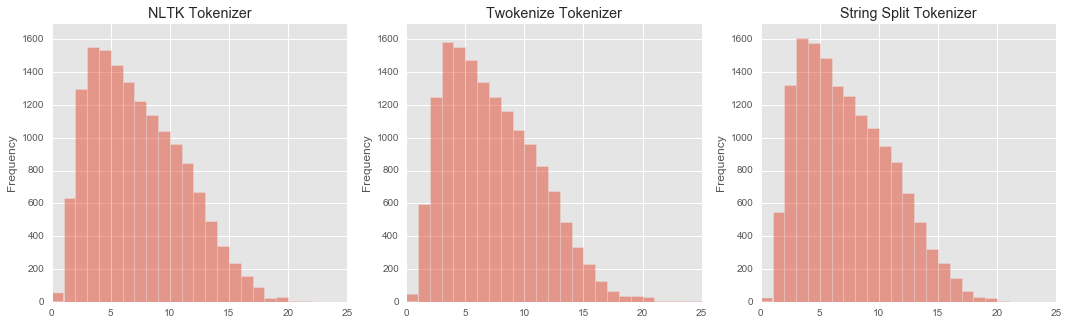

In [9]:
maxi = np.array([lengthsOfTweets.max(), TwoklengthsOfTweets.max(), splitlengthsOfTweets.max()]).max()
plt.figure(figsize=(18,5))
#NLTK Tokenizer Word length

plt.subplot(1, 3, 1)
lengthsOfTweets.plot.hist(alpha=0.5, bins=lengthsOfTweets.max())
#sns.distplot(lengthsOfTweets)
#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 1700])
plt.title("NLTK Tokenizer")

#Twokenize Tokenizer Word length
plt.subplot(1, 3, 2)
#sns.distplot(TwoklengthsOfTweets)
TwoklengthsOfTweets.plot.hist(alpha=0.5, bins=TwoklengthsOfTweets.max())

#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 1700])
plt.title("Twokenize Tokenizer")

#String.split Splitter Word length
plt.subplot(1, 3, 3)
#sns.distplot(splitlengthsOfTweets)


splitlengthsOfTweets.plot.hist(alpha=0.5, bins=splitlengthsOfTweets.max())
#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 1700])
plt.title("String Split Tokenizer")

plt.savefig("Preprocessing_evaluation_without_porter.png")
plt.show()


In [10]:
#This section calculates the percentage of Agreement
# blank, twok, nltk
# [splitlengthsOfTweets, TwoklengthsOfTweets, lengthsOfTweets,]

a = splitlengthsOfTweets
b = TwoklengthsOfTweets
(a == b).sum()/float(a.size)

0.75737921906022498

In [6]:
#get a sample of tweet to analyse tokenizers performance on 1% this dataset
sfta = df["tweet"].sample(frac=0.01, replace=False, random_state=7923)

lengthsOfTweets = sfta.apply(preprocess, args=(word_tokenize,)).str.len()

[6.440168825587708, 6.441348678469374, 4.774252801124548, 7.49211543841035, 4.838014228425277]
[465.6214546452515, 465.95364953856085, 316.816496175685, 545.4925194264451, 335.69240513688624]
0.00745751816275
99999
0.00435361507981


/Users/fabian/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


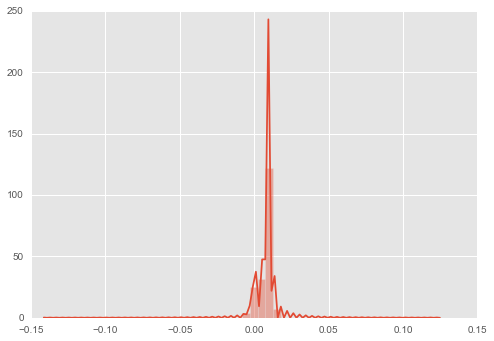

In [51]:
from geopy.distance import great_circle, vincenty
from scipy.spatial.distance import euclidean
from sklearn import preprocessing
import numpy as np
from math import sqrt

min_max_scaler = preprocessing.MinMaxScaler()

firstLat = df3.latitude.values[0]
restLat =  df3.latitude.values[1:]
                         
firstLong = df3.longitude.values[0]
restLat =  df3.longitude.values[1:]
eucRes = []
greatC = []
for i in range(1, 100000):
    eucRes.append(euclidean([firstLat, firstLong], [df3.latitude.values[i], df3.longitude.values[i]]))
    greatC.append(float(great_circle([firstLat, firstLong], [df3.latitude.values[i], df3.longitude.values[i]]).km))

print(eucRes[0:5])
print(greatC[0:5])

X_eucRes = min_max_scaler.fit_transform(np.array(eucRes).reshape(-1,1))
#X_eucRes = preprocessing.normalize(np.array(eucRes), norm='l2')

X_greatC = min_max_scaler.fit_transform(np.array(greatC).reshape(-1,1))
#X_greatC = preprocessing.normalize(np.array(X_greatC), norm='l2')

diffs = X_eucRes - X_greatC

sns.distplot(diffs)


m = np.mean(diffs)
s = np.std(diffs)
n = len(diffs)

print(m)
print(n)
print(s)
#from sklearn.metrics import mean_squared_error


#print(sqrt(mean_squared_error(X_greatC, X_eucRes)))

In [52]:
print(np.argmax(np.array(greatC).reshape(-1,1)))
print(m /(s/sqrt(n)))

df.flag[17843-1]

1903
541.679150317


2

In [5]:
#This section prints out the different tokenization results
print(df["tweet"].head(10))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=(word_tokenize,)))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=(twokenize.tokenize,)))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=("split",)))

0                                     #thedreamhunter is now trending in #London https://t.co/K1m5a2DSnm
1                                                                          @connoroneil__ cheers buddy X
2                       I love when Del Potro gets behind a forehand. He can just destroy a tennis ball.
3                                                         Well this is confusing https://t.co/uouPRGfeYw
4       The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW
5                                      End of an era at United. Giggs is set to leave. #tearingthemapart
6    ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...
7                                                       @archiebald06 cost us £30 each more but fuck it!
8                                                        @jaydevDevlin it's only a small get together...
9                                          @mshgodwin I

In [6]:
#This section applies Twokenize and throws away allwords shorter than 3 chars 
#the new dataframe that we work with is now df2
df["tweetList"] = df["tweet"].apply(preprocess, args=(twokenize.tokenize,))
df2 = df[(df.tweetList.str.len() > 2) ]
#df2.rename(columns={'tweetList':'tweet'}, inplace=True)

In [7]:
df2.head(10)
#print(df2.tweetList.head(10))

User   timestamp_ms  \
0    123790755  1467376528316   
2    298585296  1467376529203   
4     27009134  1467376529303   
5     49985646  1467376529400   
6   4658015859  1467376529390   
9    152766660  1467376529870   
10   961380986  1467376530120   
11  2418385757  1467376530138   
12  3114849977  1467376530197   
13   425937791  1467376530284   

                                                                                                  tweet  \
0                                    #thedreamhunter is now trending in #London https://t.co/K1m5a2DSnm   
2                      I love when Del Potro gets behind a forehand. He can just destroy a tennis ball.   
4      The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW   
5                                     End of an era at United. Giggs is set to leave. #tearingthemapart   
6   ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...   
9                                         @mshgodwin I'm thinking the second option, what do you think?   
10                                        Gove simply can not be next PM. Even Tory's don't trust him !   
11  @cathynewman @jeremycorbyn any word yet from @bbclaurak about the misquotes? Anything? Hmmmm? Th...   
12     @AmazonHelp it wasn't meant to have been yesterday but it said on the updated email it was today   
13                                  @SimplyCariisse Lool it got spoiled for me too tbh, life goes on 🤗😂   

    longitude   latitude  retweet_count  favorite_count  flag  \
0   -0.163024  51.511755              0               0     2   
2   -2.298134  52.847090              0               0     2   
4   -6.300177  53.343303              0               0     1   
5   -3.143354  51.669456              0               0     2   
6   -0.127318  51.507115              0               0     1   
9   -2.803055  55.615368              0               0     2   
10  -0.018734  51.599255              0               0     2   
11  -1.787496  52.447226              0               0     2   
12  -0.251592  52.085155              0               0     2   
13   0.206629  51.440224              0               0     2   

                                                                                        tweetList  
0                                                            [#thedreamhunter, trending, #london]  
2                                    [love, potro, gets, behind, forehand, destroy, tennis, ball]  
4                              [vaccines, stereophonics, kilmainham, royal, hospital, kilmainham]  
5                                                       [united, giggs, leave, #tearingthemapart]  
6   [++protonix, radio, weekend, packed, dope, segments😁, &amp;, music😝, london, united, kingdom]  
9                                                               [thinking, second, option, think]  
10                                                 [gove, simply, next, even, tory, don't, trust]  
11                                                    [word, misquotes, anything, hmmmm, thought]  
12                                        [wasn't, meant, yesterday, said, updated, email, today]  
13                                                                    [lool, spoiled, life, goes]

In [9]:
#run the gensim word2vec model on 

import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    
#size of wordembeddings
dimensions = 52

print("begin with word2vec")

model = gensim.models.Word2Vec(alpha=0.025, min_alpha=0.025, workers=4, size=dimensions, sg=0, min_count=3)  # use fixed learning rate
model.build_vocab(df2.tweetList)
for epoch in range(10):
    model.train(df2.tweetList)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay
model.save("ukmodel.model")

begin with word2vec


In [9]:
#when model is already trained, just load UKmodel
import gensim, logging
model = gensim.models.Word2Vec.load("ukmodel.model")

In [11]:
print(model.similarity("bottle", "table"))

0.482522111823


# Creat the Tweet Level Representation

In [28]:
#use tfidf to make sure that words with low tfidf wont be pooled

#from sklearn.feature_extraction.text import TfidfVectorizer
#v = TfidfVectorizer()
#x = v.fit_transform(df2['tweetList'].values)

In [12]:
import numpy

def createAvgPooledTweet(tweet):
        itera = 0
        dimensions = 52
        avgpooledTweets = np.zeros(dimensions)
        for word in tweet:
            #only allow words with a TFIDF that is not too low
            if word in model: #TODO: check lookup in vectorizer to find out if word exceed treshold and x: 
                itera += 1
                avgpooledTweets += model[word]
        return (avgpooledTweets / itera)

def createMaxPooledTweet(tweet):
        dimensions = 52
        maxpooledTweets = np.zeros(dimensions)
        for word in tweet:
            if word in model:       
                for k, dimen in enumerate(model[word]):
                    if dimen > maxpooledTweets[i, k]:
                        maxpooledTweets[i, k] = dimen
        return (maxpooledTweets)


In [13]:
df2["AvgWordEmbeddings"] = pd.Series(data=df2.tweetList.apply(createAvgPooledTweet), copy=True)
#df2.MaxWordEmbeddings = df2.tweetList.apply(createMaxPooledTweet)

/Users/fabian/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
df2.head(5)

User   timestamp_ms  \
0   123790755  1467376528316   
2   298585296  1467376529203   
4    27009134  1467376529303   
5    49985646  1467376529400   
6  4658015859  1467376529390   

                                                                                                 tweet  \
0                                   #thedreamhunter is now trending in #London https://t.co/K1m5a2DSnm   
2                     I love when Del Potro gets behind a forehand. He can just destroy a tennis ball.   
4     The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW   
5                                    End of an era at United. Giggs is set to leave. #tearingthemapart   
6  ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...   

   longitude   latitude  retweet_count  favorite_count  flag  \
0  -0.163024  51.511755              0               0     2   
2  -2.298134  52.847090              0               0     2   
4  -6.300177  53.343303              0               0     1   
5  -3.143354  51.669456              0               0     2   
6  -0.127318  51.507115              0               0     1   

                                                                                       tweetList  \
0                                                           [#thedreamhunter, trending, #london]   
2                                   [love, potro, gets, behind, forehand, destroy, tennis, ball]   
4                             [vaccines, stereophonics, kilmainham, royal, hospital, kilmainham]   
5                                                      [united, giggs, leave, #tearingthemapart]   
6  [++protonix, radio, weekend, packed, dope, segments😁, &amp;, music😝, london, united, kingdom]   

                                                                                     AvgWordEmbeddings  
0  [0.107983142138, -0.21552160879, 1.95650994529, 0.235422149301, -1.4569664076, 1.53436634938, 0....  
2  [-0.0981614161283, -0.309023637325, -0.624740086263, -0.0938148526475, 0.519130243571, -0.498329...  
4  [1.72854802012, 2.04076565802, 0.817192355792, 0.400311802824, -0.832726528247, -0.592731795584,...  
5  [-1.5554847916, 0.780769745509, -0.864477554957, 1.16388440132, -0.145415008068, -0.890219489733...  
6  [-0.511844826524, 1.02344850925, 0.37666635537, -0.921045774763, -0.738092326305, -0.17861876230...

In [15]:
#df2.reset_index(level=0, inplace=True)
df2.AvgWordEmbeddings.head()

0    [0.107983142138, -0.21552160879, 1.95650994529, 0.235422149301, -1.4569664076, 1.53436634938, 0....
1    [-3.12239849567, -1.02145624161, 0.0541671477258, 0.260065883398, -1.31987458467, -0.25529764592...
2    [-0.0981614161283, -0.309023637325, -0.624740086263, -0.0938148526475, 0.519130243571, -0.498329...
3    [-0.913643479347, -0.910556405783, -0.130457289517, 0.43853020668, 1.51038503647, 0.514075532556...
4    [1.72854802012, 2.04076565802, 0.817192355792, 0.400311802824, -0.832726528247, -0.592731795584,...
Name: AvgWordEmbeddings, dtype: object

In [15]:
from datetime import datetime, date

try:
    df2["timestamp_ms"] = df2.timestamp_ms.apply(lambda x: datetime.fromtimestamp(int(x) // 1000))
    pd.to_datetime(df2.timestamp_ms)
    df2 = df2.set_index(['timestamp_ms'])
    df2.index
except:
    print("Data was already converted")

#df2["timestamp_ms"] = df2.timestamp_ms.astype('datetime64[ns]')
#df2["TimeReviewed"] = pd.to_datetime(df2["timestamp_ms"])

/Users/fabian/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
#allow only tweets with precise coordinates for clustering
df2 = df2[df2.flag == 1]

In [17]:
#user, lat, long, date as index?, Tweet
#df2 = df2.dropna()

df2.head()

User  \
timestamp_ms                      
2016-07-01 13:35:29    27009134   
2016-07-01 13:35:29  4658015859   
2016-07-01 13:35:31  1731651644   
2016-07-01 13:35:31   257463123   
2016-07-01 13:35:33   625576341   

                                                                                                                   tweet  \
timestamp_ms                                                                                                               
2016-07-01 13:35:29     The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW   
2016-07-01 13:35:29  ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...   
2016-07-01 13:35:31  Queue for the Somme memorial service. Lest we forget...  #Somme #London #westminster #somme100 @...   
2016-07-01 13:35:31  Our Registration forms are on their  way to the NCEL.... Once confirmed we'll release a full squ...   
2016-07-01 13:35:33            Can't believe I've finally graduated college 🎓🎉 @ Ashford College https://t.co/spLEVnWWmd   

                     longitude   latitude  retweet_count  favorite_count  \
timestamp_ms                                                               
2016-07-01 13:35:29  -6.300177  53.343303              0               0   
2016-07-01 13:35:29  -0.127318  51.507115              0               0   
2016-07-01 13:35:31  -0.128285  51.499740              0               0   
2016-07-01 13:35:31  -1.526187  53.393434              0               0   
2016-07-01 13:35:33   0.860490  51.139525              0               0   

                     flag  \
timestamp_ms                
2016-07-01 13:35:29     1   
2016-07-01 13:35:29     1   
2016-07-01 13:35:31     1   
2016-07-01 13:35:31     1   
2016-07-01 13:35:33     1   

                                                                                                               tweetList  \
timestamp_ms                                                                                                               
2016-07-01 13:35:29                                   [vaccines, stereophonics, kilmainham, royal, hospital, kilmainham]   
2016-07-01 13:35:29        [++protonix, radio, weekend, packed, dope, segments😁, &amp;, music😝, london, united, kingdom]   
2016-07-01 13:35:31            [queue, somme, memorial, service, lest, forget, #somme, #london, #westminster, #somme100]   
2016-07-01 13:35:31  [registration, forms, ncel, ...., confirmed, we'll, release, full, squad, update, #building, ......   
2016-07-01 13:35:33                                [can't, believe, i've, finally, graduated, college, ashford, college]   

                                                                                                       AvgWordEmbeddings  
timestamp_ms                                                                                                              
2016-07-01 13:35:29  [1.72854802012, 2.04076565802, 0.817192355792, 0.400311802824, -0.832726528247, -0.592731795584,...  
2016-07-01 13:35:29  [-0.511844826524, 1.02344850925, 0.37666635537, -0.921045774763, -0.738092326305, -0.17861876230...  
2016-07-01 13:35:31  [0.553477221727, 3.77224738002, -1.61237300336, -0.391221809387, -1.81642892063, -0.992496645451...  
2016-07-01 13:35:31  [-0.70896384599, -0.192195546414, -1.10503615865, 0.0495893847463, -1.48540115609, 0.07224419120...  
2016-07-01 13:35:33  [1.05980419973, 1.10832135379, 0.173837810755, 0.513005072251, 0.368151036091, -0.692857531831, ...

# Method 1: One-step unified distance metric

In [72]:
#custom distance function ftw
from geopy.distance import great_circle, vincenty
from scipy.spatial.distance import cosine, euclidean
from datetime import datetime, date

#0 is lat, 1 is long, 3 is time, 4 to end is word embedding. Variable number of dimensions of word embeddings possible
def d(a,b, p="not"):
    
    timesim = abs((datetime.fromtimestamp(a[3]) - datetime.fromtimestamp(b[3])).days + 1) * 0.03
    if timesim < 1:
        spatialsim = (float(vincenty((a[0], a[1]), (b[0], b[1])).km)) * 0.05
        
        if timesim + spatialsim < 1:
            textsim = cosine(a[4:], b[4:]) * 5
            #vinc = (float(euclidean((a[0], a[1]), (b[0], b[1])).km)) * 0.01
            if p=="do":
                if textsim < 1:
                    print(b[2])

                print("text: " + str(textsim))

                print("time: " + str(timesim))
                print("spatial: "+ str(spatialsim))
                print("clean spatial in km " + str(spatialsim/0.01))
                print(" ")
        else:
            return timesim + spatialsim
    else:
        return timesim
    
    return  spatialsim + timesim + textsim

In [61]:
#build a function that does the unified thing
def method1(dataframe, we, minpts):
    #pick features for DBSCAN
    #print(dataframe.index.values)
    
    
    B = np.zeros((len(dataframe),dimensions+4),float)
    B[:,0]= dataframe.latitude.values
    B[:,1]= dataframe.longitude.values
    B[:,2]= dataframe.User.values
    B[:,3]= (dataframe.index.values.astype('uint64') / 1e9).astype('uint32')
    B[:,4:]=np.vstack(we)
    
    B = B[~np.isnan(B).any(axis=1)]
    
    #cleanTime = (dataframe.index.values.astype('uint64') / 1e9).astype('uint32').reshape(-1,1)
    #features = np.concatenate((dataframe.latitude.values.reshape(-1,1), dataframe.longitude.values.reshape(-1,1), dataframe.User.values.reshape(-1,1), cleanTime), axis=1)
    #print(features)
    
    #sample from features or take top k
    #either sample from np array? or build mask by generating random array
    
    db = DBSCAN(eps=1, min_samples=minpts, metric=d, algorithm='ball_tree').fit(B)
    #db = AgglomerativeClustering(n_clusters=10, affinity=d, linkage="complete").fit(dat)
    return db.labels_


# Method 2: Stepwise aggregation

In [62]:
#the other method
def method2_location(dataframe, minpts, eps):
    #make feature array from subset
    start = time.time()
    
    #firstN = 500
    columns = ["longitude", "latitude"]
    
    #take sample of day
    features = dataframe[list(columns)].values
    
    #run DBSCAN on just coordinates using euclidean distance
    dbmodel = DBSCAN(eps=eps, min_samples=minpts, metric="euclidean", algorithm='ball_tree')
    db = dbmodel.fit(features)
    end = time.time()
    
    #dailyTweets
    print(str(dailyTweets.index.day[0]) + " day Clustered. The passed time is: " + str(end-start))    
    
    return db.labels_

In [63]:
#do the analysis


# Make the Maps and do most frequent word analysis

In [74]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cosine, euclidean
import time
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
from collections import Counter
    
def make_the_Cluster_Eval(labels, dataframe): 
    """
    This function takes the clustering results in form of a labelled array, use those labels to 
    access the sampledDataFrame, which contains latitude longitude and the preprocessed Tweets
    in word form.
    """
    
    ###BEGIN map variable preparation and config
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    n_clusters_ = 1
    
    #define bounding box for map
    bbox = {
        'lon': -4.5,
        'lat': 55.5,
        'll_lon': -11,
        'll_lat': 50,
        'ur_lon': 2,
        'ur_lat': 61
    }    
    plt.figure(figsize=(15,15))
    m = Basemap(
        projection='merc', lon_0=bbox['lon'], lat_0=bbox['lat'], resolution="l",
        llcrnrlon=bbox['ll_lon'], llcrnrlat=bbox['ll_lat'],
        urcrnrlon=bbox['ur_lon'], urcrnrlat=bbox['ur_lat'])
    m.drawcoastlines()
    
    #fill continents?
    m.fillcontinents(color='gray', lake_color='aqua', zorder=5)
    m.drawmapboundary(fill_color='aqua')
    
    ####END map config
    
    makeMapLater = False
    
    print("start calculating")
    #plot each cluster individually
    for k, col in zip(unique_labels, colors):
        
        if k == -1:
            # Black used for noise.
            col = 'k'
             
        #currentClusterDF = subset dataframe by current k by index given in label variable
        class_member_mask = (labels == k)
        
        
        #get number of distinct users in this cluster.
        DistinctUsers = [] #pd.value_counts(dataframe.User.values).size #len(set(xy[:,2]))
        #print("The number of distinct users in this cluster is" + str(numOfDistinctUsers))
        #print(dataframe.latitude.values)
        x1 = dataframe.longitude.values
        y1 = dataframe.latitude.values
        period = dataframe.index.values[class_member_mask]
        
        x1 = x1[class_member_mask]

        y1 = y1[class_member_mask]
        x1, y1 = m(x1, y1)
        
        if k == -1:
            # don't print noise, but count number of noise tweets
            print("There were " + str(sum((labels == k))) + " out of " + str(len(class_member_mask)) + " Tweets that were clustered as noise")
            print("This is " + str(sum((labels == k))/len(class_member_mask) * 100) + "%.")
            # m.scatter(x1, y1, s=4, marker="o", c=col, alpha=0.5, zorder=10)
            
        else:
            #plot k to map at position 
            wordsOfCluster = []
            tweetsOfCluster = []
            xtxt = 0
            ytxt = 0
            
            #loop through all clusters to visualise
            for i, label in enumerate(labels):
                
                if label == k:
                    #print(dataframe.tweetList)
                    #das ist der tweet
                    #print(' '.join(tweets[i]))
                    
                    if dataframe.User.ix[i] not in DistinctUsers:
                        DistinctUsers.append(dataframe.User.ix[i])
                    
                    tweetsOfCluster.append(' '.join(dataframe.tweetList.ix[i]))
                    if xtxt == 0 and ytxt == 0:
                        xtxt = dataframe.latitude.ix[i]
                        ytxt = dataframe.longitude.ix[i]
                        xtxt, ytxt = m(ytxt, xtxt)
                    
                    
                    for word in dataframe.tweetList.ix[i]:
                        
                        wordsOfCluster.append(word)

            #evaluate clusters
            wfcnt = Counter(wordsOfCluster)
            
            numForbiddenClusters = 0
            
            #thresholding for cluster relevance, to avoid spam clusters of single users
            if wfcnt.most_common()[0][1]/len(tweetsOfCluster) > 0.05 and len(DistinctUsers) > 2:
                makeMapLater = True
                print(str(n_clusters_) + ". Cluster, with " + str(len(tweetsOfCluster)) + " tweets, " + str(len(DistinctUsers)) + " distinct users, " +
                "the most freq. words are:")
                print("This cluster is From: " +  str(period.min()) + " To " + str(period.max()))

                print(wfcnt.most_common()[0:20])

                #plot points
                m.scatter(x1, y1, s=10, marker="x", c=col, alpha=1, zorder=20)
                
                #print cluster numbers on plot      
                plt.text(xtxt, ytxt, str(n_clusters_), fontsize=10, fontweight='bold', ha='left',va='bottom',color='k', zorder=150)
                
                #print(x1)

                #print(tweetsOfCluster)
                print(" ------------- ")
                print(" ")
                n_clusters_ += 1
            else:
                numForbiddenClusters += 1
    
    if makeMapLater:
        plt.title("Clustered tweets from GB %d" % n_clusters_)
        plt.savefig(time.strftime("plots/test-%h-%m-%s-%d-%m-%Y.png"))
        plt.show()
        
        if numForbiddenClusters > 0:
            print("The number of clusters that were ignored because of quality issues is: " + str(numForbiddenClusters))
    else:
        print("Attempted to make map but there were not enough Tweets produce good clusters.")
        print(" ")
        plt.close()

# apply both methods and use function to plot results

Method 1 took: 0.7080180644989014
start calculating
1. Cluster, with 3 tweets, 3 distinct users, the most freq. words are:
This cluster is From: 2016-07-01T14:36:23.000000000 To 2016-07-04T20:47:00.000000000
[('united', 3), ('kingdom', 3), ('london', 3), ('please', 1), ('wake', 1), ('pretty', 1), ('#wakeup', 1), ('😂😍😂😍', 1), ('artist', 1), ('ukafrobeat', 1)]
 ------------- 
 
There were 93 out of 100 Tweets that were clustered as noise
This is 93.0%.
Finished Map


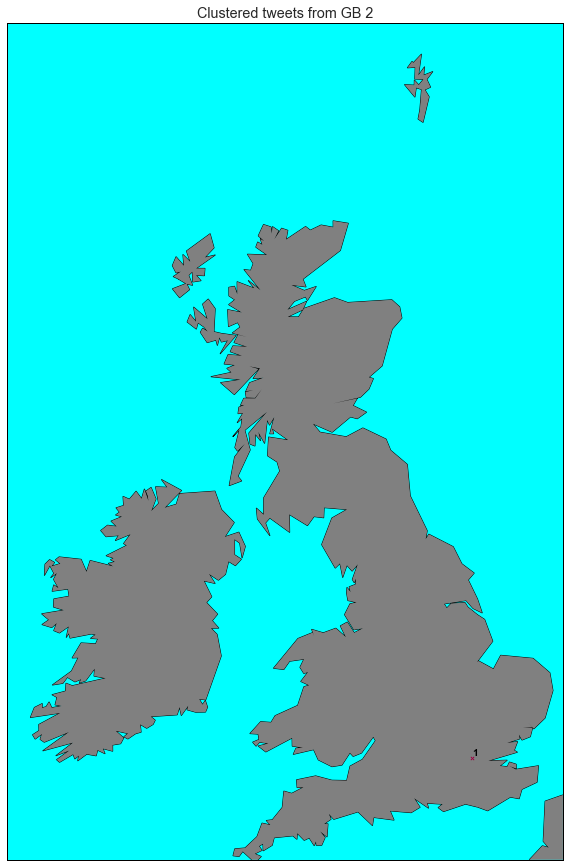

The number of clusters that were ignored because of quality issues is: 1
Trying to make the map took: 0.9934821128845215
Method 1 took: 16.071930170059204
start calculating
1. Cluster, with 4 tweets, 4 distinct users, the most freq. words are:
This cluster is From: 2016-07-02T16:42:20.000000000 To 2016-07-09T21:16:42.000000000
[('united', 4), ('kingdom', 4), ('london', 4), ('suits', 1), ('#business', 1), ('right🐙', 1), ('celebrations', 1), ('#liverpoolstreet', 1), ('siblings', 1), ('real', 1), ('#london', 1)]
 ------------- 
 
2. Cluster, with 6 tweets, 6 distinct users, the most freq. words are:
This cluster is From: 2016-07-02T19:48:37.000000000 To 2016-07-10T21:16:18.000000000
[('london', 12), ('greater', 6), ('railway', 2), ('station', 2), ('lounge', 1), ('mezzah', 1), ('bridge', 1), ('pancras', 1), ('knightsbrisge', 1), ('soho', 1), ('comptons', 1), ('international', 1)]
 ------------- 
 
3. Cluster, with 3 tweets, 3 distinct users, the most freq. words are:
This cluster is From: 

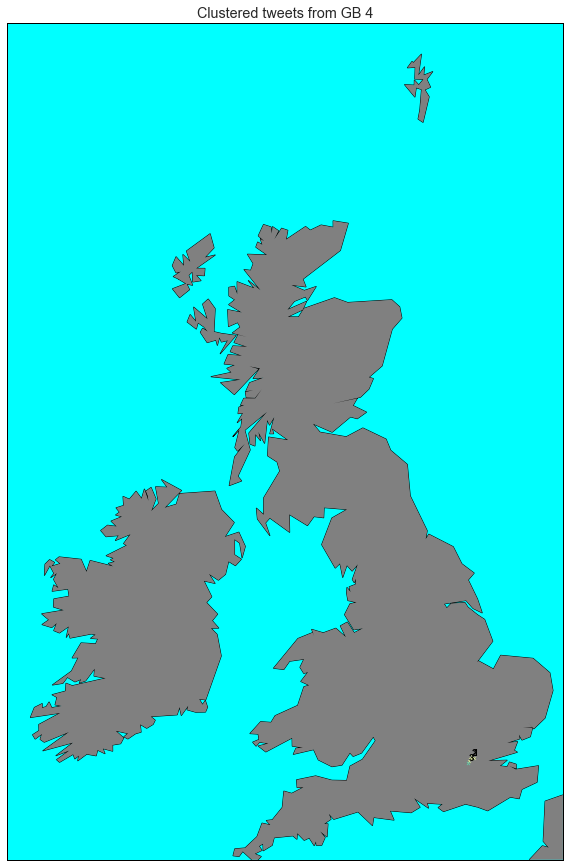

Trying to make the map took: 1.011746883392334
Method 1 took: 62.638827085494995
start calculating
1. Cluster, with 10 tweets, 10 distinct users, the most freq. words are:
This cluster is From: 2016-07-04T07:35:41.000000000 To 2016-07-10T18:53:53.000000000
[('united', 10), ('kingdom', 10), ('london', 10), ('life', 1), ('#blacklivesmatter', 1), ('cmon', 1), ('🔴🔴🔴🔴⚽️', 1), ('follow', 1), ('amen', 1), ('#reflecting', 1), ('#loveher', 1), ('posted', 1), ('#puentedelondres', 1), ('!!!!', 1), ('💖🤗👸🏻👸🏼👩\u200d❤️\u200d💋\u200d👩', 1), ('wales', 1), ('#london', 1), ('#memorylane', 1), ('#travel', 1), ('photo', 1)]
 ------------- 
 
2. Cluster, with 3 tweets, 3 distinct users, the most freq. words are:
This cluster is From: 2016-07-09T19:43:26.000000000 To 2016-07-10T16:46:49.000000000
[('photo', 3), ('posted', 3), ('park', 2), ('london', 2), ('heath', 1), ('regents', 1), ('hamstead', 1), ('regent', 1), ('central', 1)]
 ------------- 
 
3. Cluster, with 22 tweets, 21 distinct users, the most freq. 

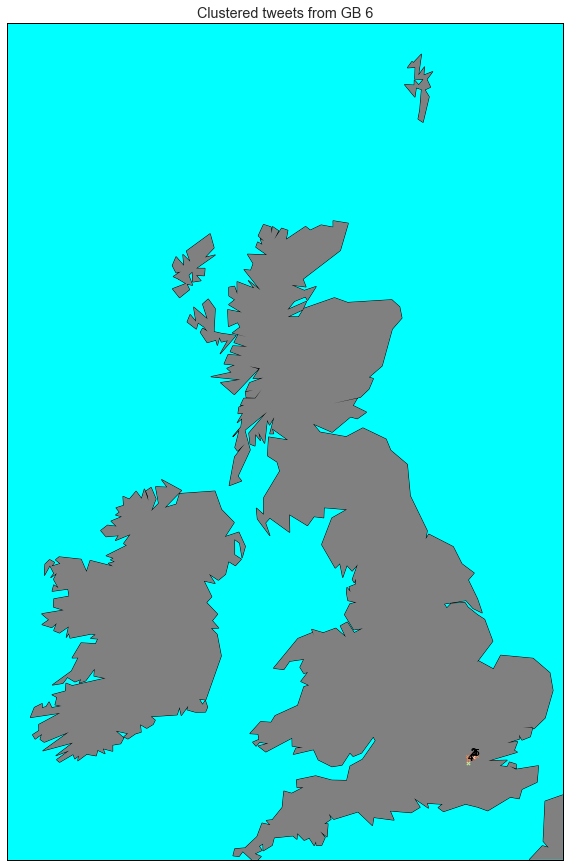

The number of clusters that were ignored because of quality issues is: 1
Trying to make the map took: 1.0182750225067139


In [73]:
#Method1

import random
import time

listOfDifferentSizes = [100, 500, 1000]

#set seed for sample
seed = random.random()
random.seed(seed)

for set_size in listOfDifferentSizes:
    rindex =  np.array(random.sample(range(len(df2)), set_size))
    sampleForMethod1 = df2.ix[rindex]
    
    #print(sampleForMethod1.index)
    
    #wordembeddings have to be separately picked
    we = df2.AvgWordEmbeddings.ix[rindex]
    #sampleForMethod1 = df2.sample(n=set_size, random_state=seed)
    #print(we.values)
    start = time.time()
    labelsMethod1 = method1(sampleForMethod1, we.values, minpts=3)
    print("Method 1 took: " + str(time.time() - start))
    start = time.time()
    make_the_Cluster_Eval(labelsMethod1, sampleForMethod1)
    print("Trying to make the map took: " + str(time.time()- start))


Begin Analysis for next day
1 day Clustered. The passed time is: 0.01146388053894043
labelsMethod2_loc: 1500
start calculating
Method 2 took: 0.0008549690246582031
[ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]
start calculating
There were 1 out of 28 Tweets that were clustered as noise
This is 3.57142857143%.


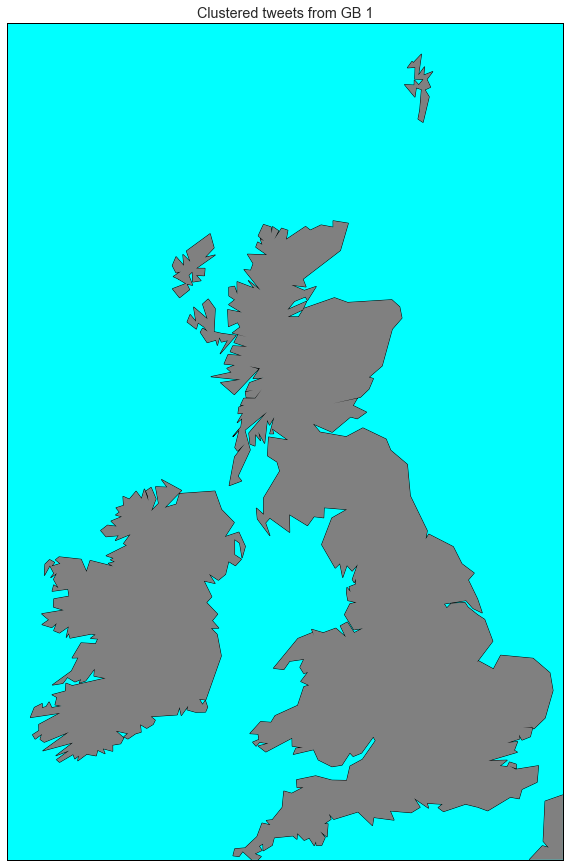

Making the Map took: 0.9860870838165283
Method 2 took: 0.0007181167602539062
[ 0 -1  0  0 -1 -1  0 -1 -1 -1  0 -1  0]
start calculating
There were 7 out of 13 Tweets that were clustered as noise
This is 53.8461538462%.


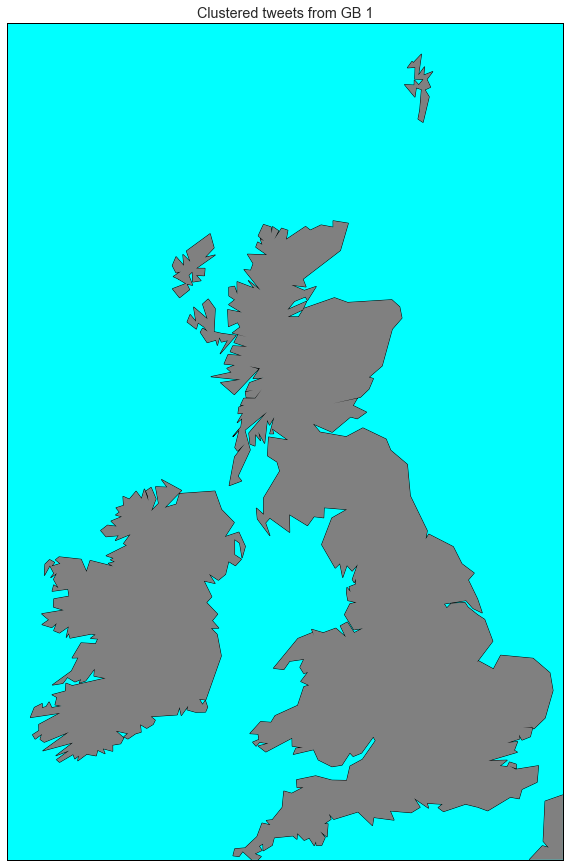

Making the Map took: 1.0259521007537842
Method 2 took: 0.010106801986694336
[ 0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0 -1 -1 -1  0  0  0 -1  0  0  0
  0  1  0 -1  0  0  0  0 -1  0 -1  0 -1  0  0  0 -1  0  0 -1  0 -1  0  1  0
  0 -1  0  0  0  0  0 -1  0  1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
 -1  0  0 -1  0  0 -1  0  2  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0 -1
 -1  0  0 -1  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1  0  0
  0 -1  1  0  0  0  0 -1  0  2  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1  0
  0  0  0  0  0  0 -1  0  0  0 -1  1  0  0  1  0 -1  3  3  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0 -1 -1 -1  0  0  0 -1  0  1  0  0  0  0
 -1 -1  0  0  0  0 -1  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0 -1  0  0  0
  0  0  0 -1  0 -1  0 -1  0  1  0 -1  0  0  0  1  0 -1  0  0  0  0  0  0  0
  0  0  0  1 -1  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1 -1  0  0  3  0 -1
  0  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0 -1  0 -1  0  0  0
  0  0 -1  0

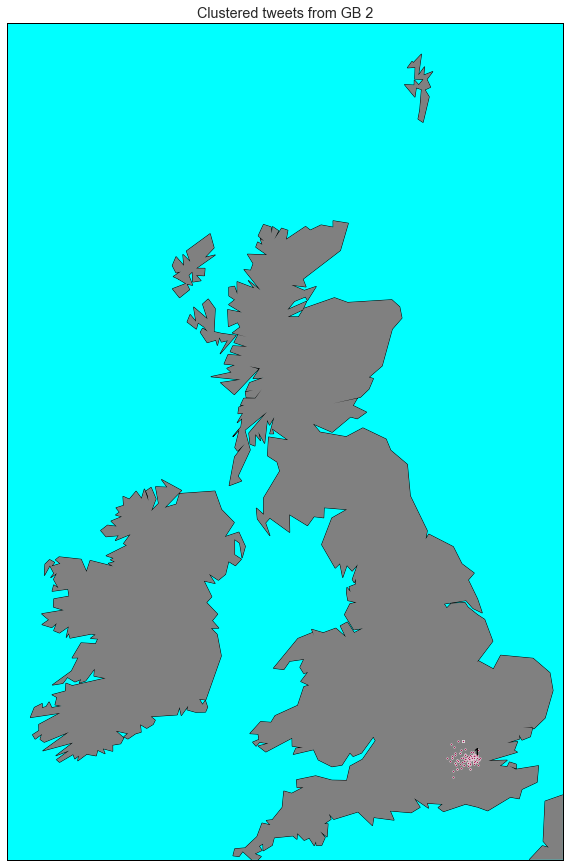

Making the Map took: 1.1299669742584229
Method 2 took: 0.0016298294067382812
[-1  0  0 -1  0  0  0  0 -1  0  0 -1  0 -1 -1  0 -1 -1  0 -1  0 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1  0 -1  0  0  0 -1 -1 -1 -1  0 -1  0]
start calculating
1. Cluster, with 19 tweets, 9 distinct users, the most freq. words are:
This cluster is From: 2016-07-01T14:02:53.000000000 To 2016-07-01T18:03:18.000000000
[('dublin', 19), ('25ph', 7), ('locum', 7), ('dock', 7), ('holiday', 7), ('canal', 7), ('incl', 7), ('grand', 7), ('#dublin', 6), ('august', 4), ('ireland', 4), ('08:30', 4), ('house', 3), ('09:00', 3), ('19:00', 3)]
 ------------- 
 
There were 24 out of 43 Tweets that were clustered as noise
This is 55.8139534884%.


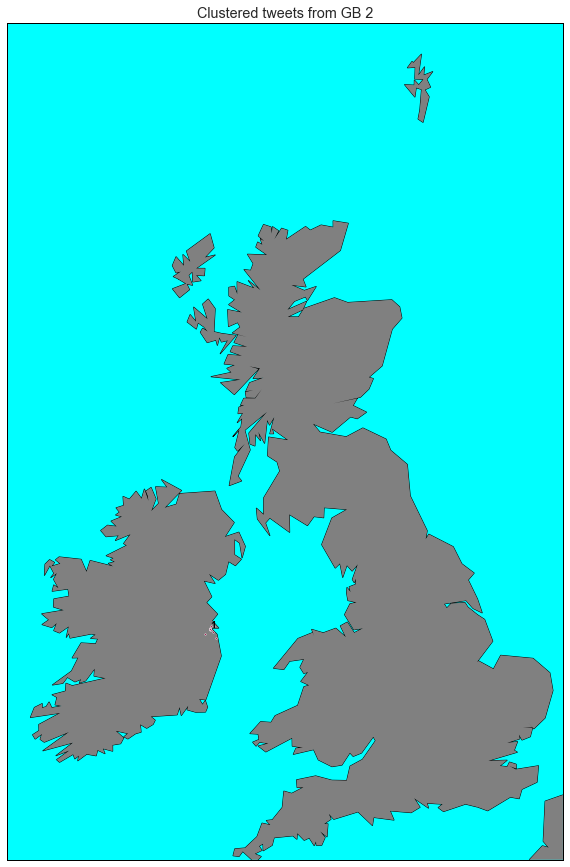

Making the Map took: 1.1180839538574219
Method 2 took: 0.0010750293731689453
[-1  1  0 -1  0 -1 -1 -1 -1  1  1  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0  1 -1 -1 -1 -1  0 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1]
start calculating
1. Cluster, with 9 tweets, 8 distinct users, the most freq. words are:
This cluster is From: 2016-07-01T13:44:27.000000000 To 2016-07-01T17:41:19.000000000
[('manchester', 11), ('station', 4), ('#somme100', 4), ('#wearehere', 3), ('railway', 3), ('piccadilly', 2), ('road', 2), ('greater', 2), ('oxford', 2), ('hall', 1), ('bignor', 1), ('remembrance', 1), ('skies', 1), ('food', 1), ('park', 1)]
 ------------- 
 
2. Cluster, with 5 tweets, 5 distinct users, the most freq. words are:
This cluster is From: 2016-07-01T14:03:21.000000000 To 2016-07-01T17:46:54.000000000
[('week', 3), ('back', 2), ('happy', 2), ('monastery', 1), ('congratulation', 1), ('great', 1), ('murray…', 1), ('better', 1), ('started', 1), ('bank', 1

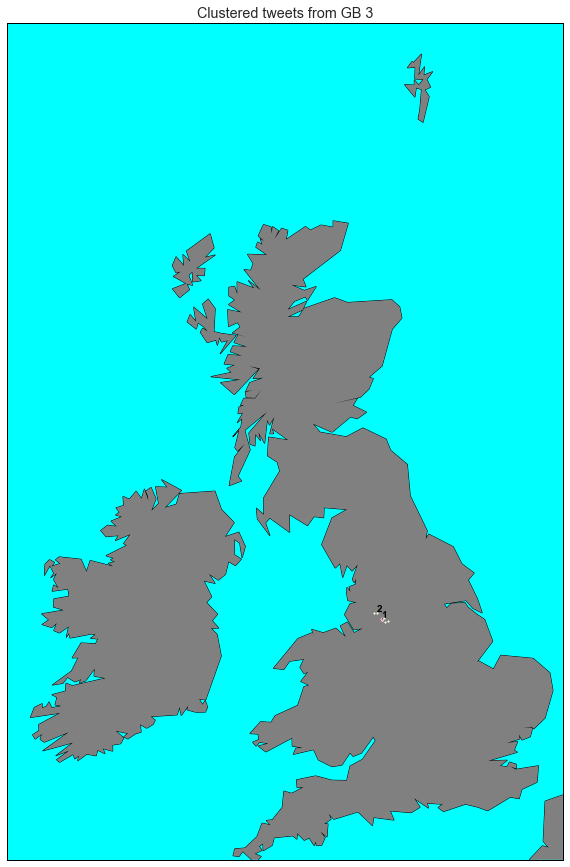

Making the Map took: 1.059485912322998
Method 2 took: 0.0009970664978027344
[ 0  0  0  0  0 -1  0  0 -1  0 -1 -1 -1  0  0  0  0  0 -1]
start calculating
There were 6 out of 19 Tweets that were clustered as noise
This is 31.5789473684%.


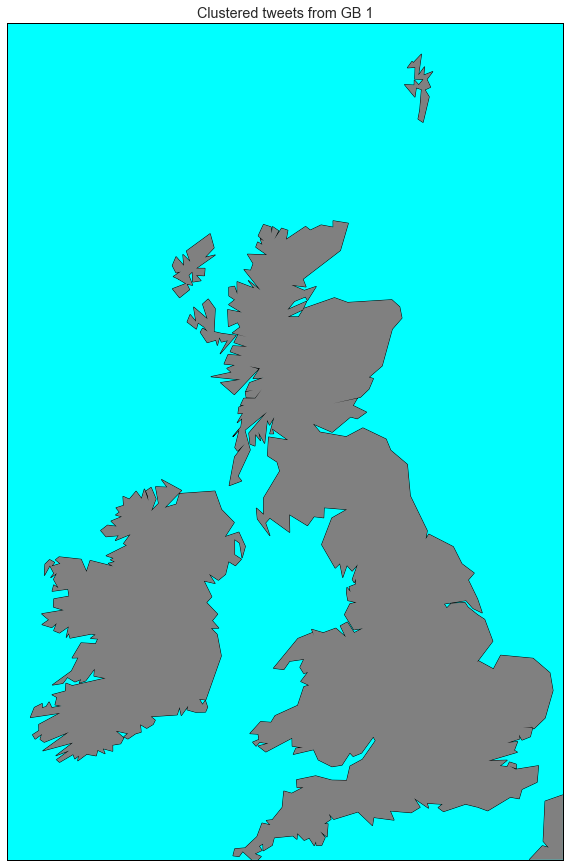

Making the Map took: 1.0224699974060059
Method 2 took: 0.0006830692291259766
[ 0  0 -1  0 -1  0 -1 -1  0]
start calculating
1. Cluster, with 5 tweets, 3 distinct users, the most freq. words are:
This cluster is From: 2016-07-01T13:55:41.000000000 To 2016-07-01T15:36:14.000000000
[('news', 3), ('dawlish', 2), ('#dawlish', 2), ('#devon', 2), ('boris', 1), ('barnstaple', 1), ('rescued', 1), ('severely', 1), ('remembers', 1), ('damaged', 1), ('parkway', 1), ('ottery', 1), ('tiverton', 1), ('attack', 1), ('arrives', 1)]
 ------------- 
 
There were 4 out of 9 Tweets that were clustered as noise
This is 44.4444444444%.


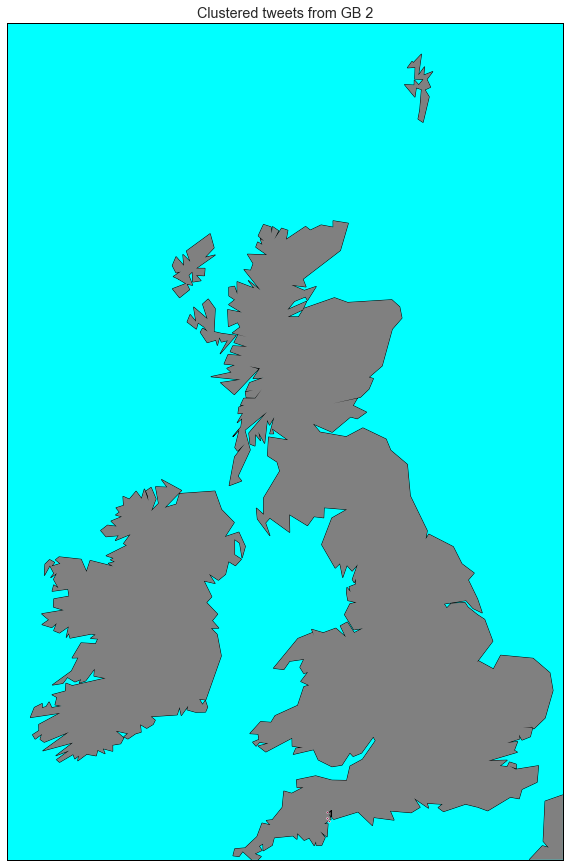

Making the Map took: 0.9937591552734375
There were 403 Tweets that were clustered as noise
Begin Analysis for next day
2 day Clustered. The passed time is: 0.010835886001586914
labelsMethod2_loc: 1500
start calculating
Method 2 took: 0.001035928726196289
[-1 -1 -1 -1 -1  1  0  0  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  0 -1
  0  1  0 -1  0 -1 -1 -1  0  0 -1  0 -1 -1  0 -1 -1 -1 -1]
start calculating
1. Cluster, with 10 tweets, 7 distinct users, the most freq. words are:
This cluster is From: 2016-07-02T15:23:40.000000000 To 2016-07-02T22:24:35.000000000
[('drinking', 8), ('abbey', 2), ('#photo', 2), ('neapolitan', 2), ('pudsey', 2), ('life', 1), ('gold', 1), ('lawnswood', 1), ('horsforth', 1), ('first', 1), ('avenue', 1), ('though', 1), ('garde', 1), ('hotel', 1), ('magellan', 1)]
 ------------- 
 
2. Cluster, with 8 tweets, 8 distinct users, the most freq. words are:
This cluster is From: 2016-07-02T16:36:31.000000000 To 2016-07-02T23:16:00.000000000
[('west', 4), ('leeds', 4), (

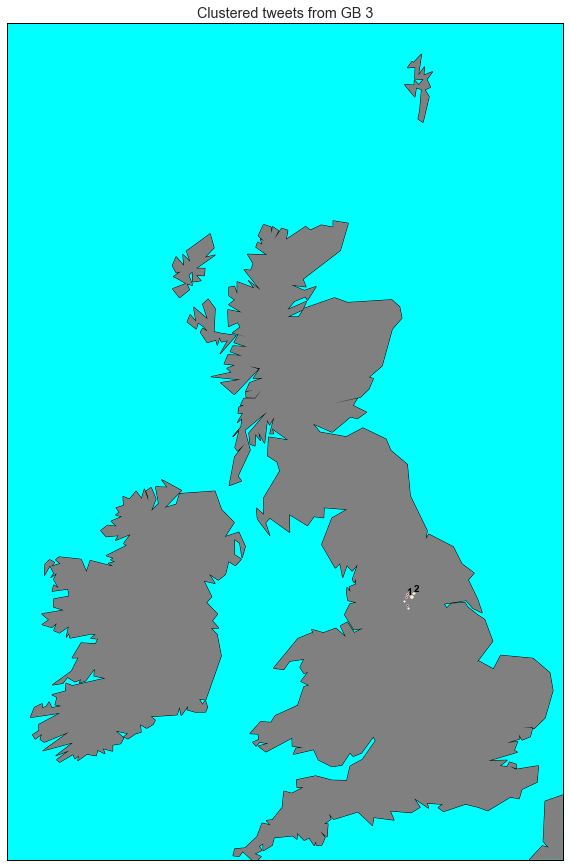

Making the Map took: 1.03245210647583
Method 2 took: 0.008675098419189453
[ 0  0  0  0  0 -1 -1  0  0  0  0  0 -1  0  0  0 -1  0  0 -1  0  1  0  0  0
  0  0 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  2  0  0  0  0  0  0  0
  0 -1  0  0  3  2  4  0  0  0  0  0  0  0  0 -1  0  0 -1  2  0  0  0  3  0
  0  0 -1  0 -1  0  0 -1  2  3  0  0 -1  0  0 -1  0  0  0 -1  0  0  0 -1  1
  0  0  0  0  0 -1  0  2  0  0  0  0  0 -1  2  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  3 -1  0
  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  2 -1 -1  0  0  0 -1  0  0  0
  0  0  0 -1  3  0  0  0  3  2 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0 -1 -1  0  0 -1  0  0  0  4  0  0  0 -1 -1  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  2  0  0  0  0  0  0  0  2  0  0  3 -1  0  0  2  0  0  0  0  0  1  0  0 -1
  0  0  0  0  0  0 -1  0 -1  0 -1  0  0  0  0  1  0  0  0 -1  0 -1  0  0  0
  4  0  0  0  

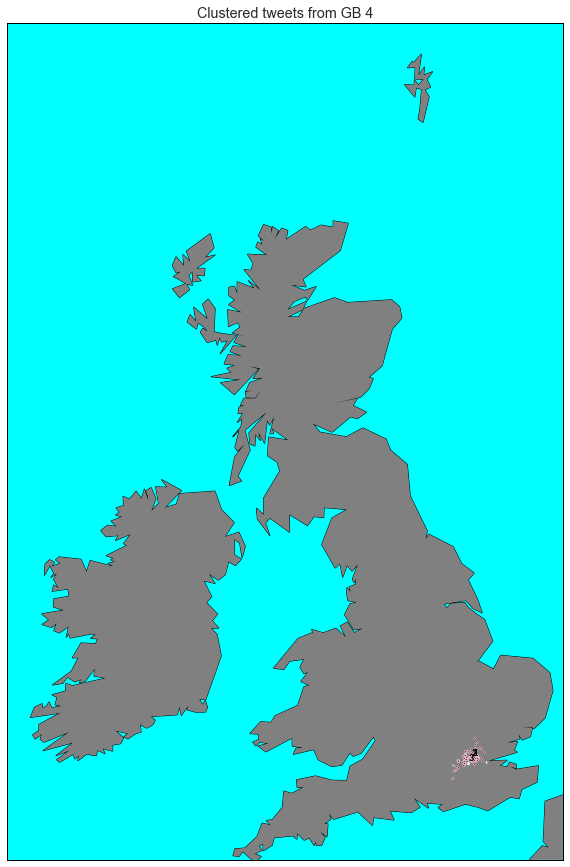

Making the Map took: 1.2100050449371338
Method 2 took: 0.0010271072387695312
[ 0  0 -1 -1  0  0 -1  0  0]
start calculating
1. Cluster, with 6 tweets, 4 distinct users, the most freq. words are:
This cluster is From: 2016-07-02T16:29:38.000000000 To 2016-07-02T21:18:52.000000000
[('drinking', 5), ('#photo', 4), ('gold', 2), ('beer', 2), ('little', 1), ('billericay', 1), ('norsey', 1), ('chilli', 1), ('fest', 1), ('found', 1), ('revenge', 1), ('....', 1), ('paradise', 1), ('wetherspoon', 1), ('company', 1)]
 ------------- 
 
There were 3 out of 9 Tweets that were clustered as noise
This is 33.3333333333%.


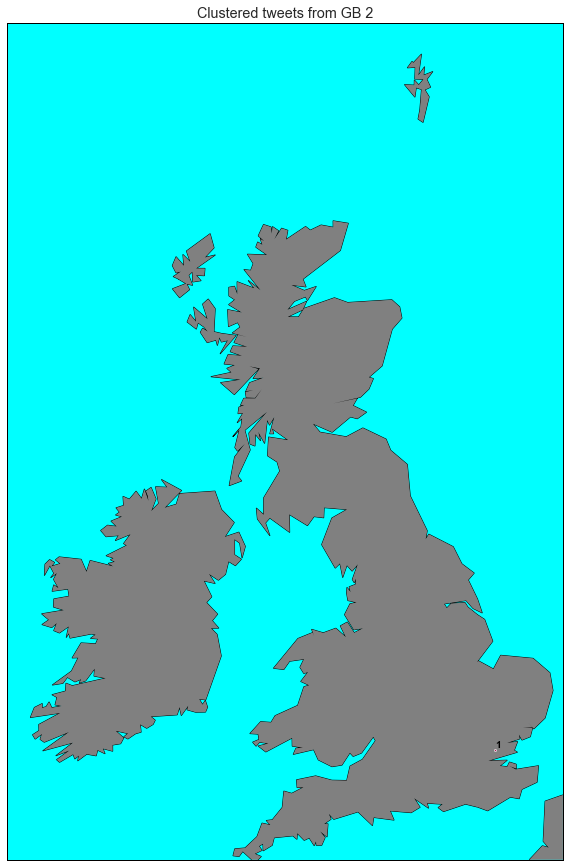

Making the Map took: 1.0461900234222412
Method 2 took: 0.0012650489807128906
[-1  0 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1
 -1 -1 -1 -1  0  0 -1 -1 -1 -1  0  0 -1  0 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1
  0 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1]
start calculating
1. Cluster, with 17 tweets, 14 distinct users, the most freq. words are:
This cluster is From: 2016-07-02T15:15:51.000000000 To 2016-07-02T22:50:28.000000000
[('manchester', 23), ('united', 11), ('kingdom', 5), ('park', 4), ('principle', 4), ('aftermath', 4), ('dislocation', 4), ('broadhurst', 4), ('moston', 4), ('greater', 3), ('#colourmehappy', 2), ('trafford', 2), ('bury', 1), ('#colorrun', 1), ('spinningfields', 1)]
 ------------- 
 
There were 45 out of 62 Tweets that were clustered as noise
This is 72.5806451613%.


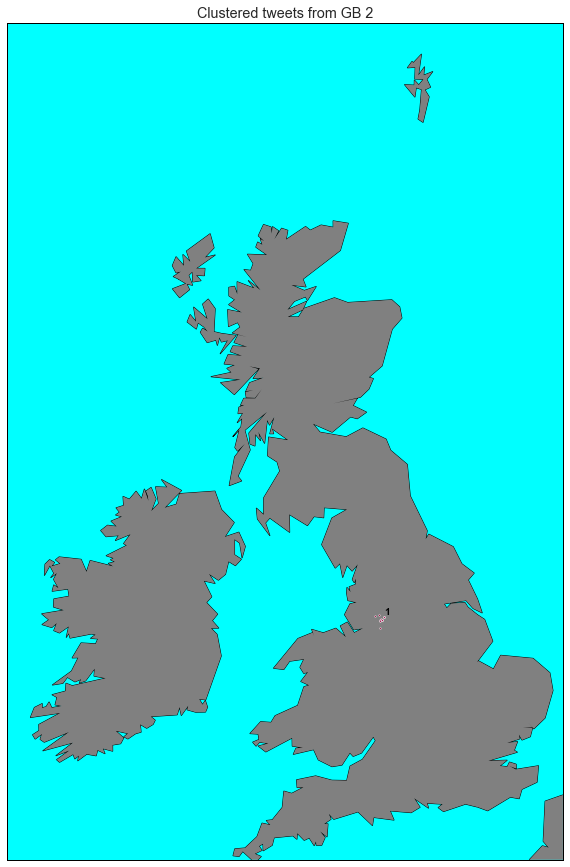

Making the Map took: 1.0774199962615967
Method 2 took: 0.00084686279296875
[ 0 -1  0 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1  0 -1]
start calculating
1. Cluster, with 8 tweets, 8 distinct users, the most freq. words are:
This cluster is From: 2016-07-02T15:36:45.000000000 To 2016-07-02T21:25:09.000000000
[('dublin', 6), ('#dublin', 5), ('trinity', 2), ('station', 2), ('college', 2), ('theatre', 2), ('heuston', 2), ('olympia', 2), ('#ireland', 1), ('#guinness', 1), ('ireland', 1), ('#streetart', 1), ('bridge', 1), ('pint', 1), ('#beerstudy', 1)]
 ------------- 
 
There were 20 out of 28 Tweets that were clustered as noise
This is 71.4285714286%.


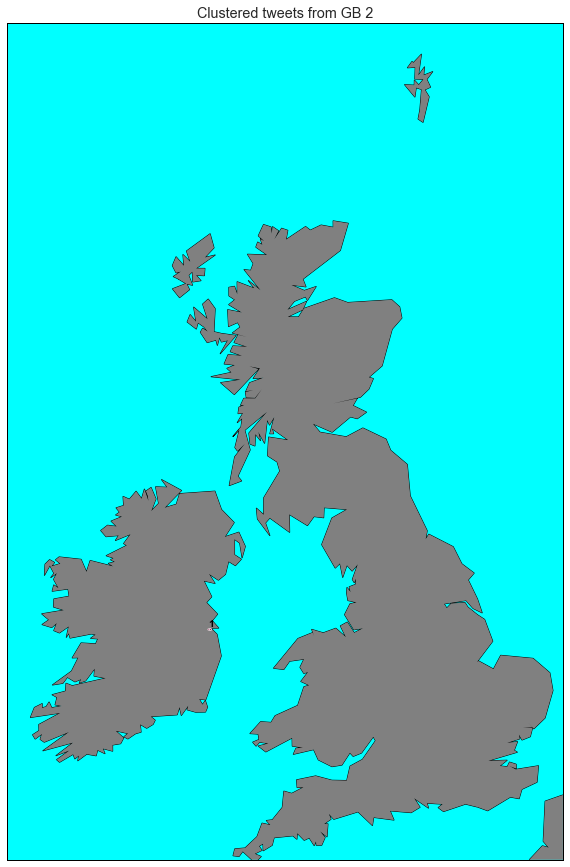

Making the Map took: 0.9672830104827881
Method 2 took: 0.0007619857788085938
[-1  0  0  0  0 -1  0  0 -1 -1]
start calculating
There were 4 out of 10 Tweets that were clustered as noise
This is 40.0%.


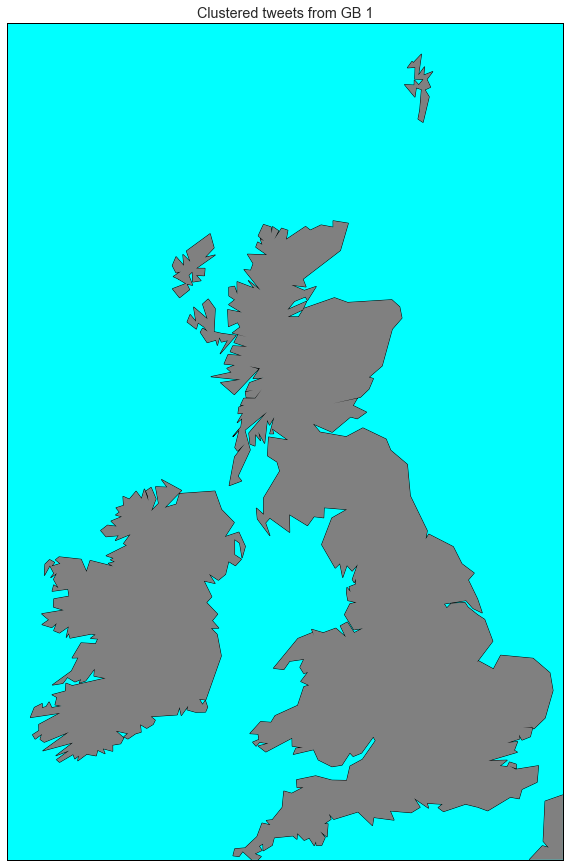

Making the Map took: 1.0393030643463135
Method 2 took: 0.0017180442810058594
[-1 -1  0  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1  0 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1]
start calculating
1. Cluster, with 10 tweets, 10 distinct users, the most freq. words are:
This cluster is From: 2016-07-02T16:04:27.000000000 To 2016-07-02T23:00:19.000000000
[('#liverpool', 7), ('liverpool', 7), ('waterfront', 2), ('date', 2), ('#datenight', 2), ('#cocktails', 2), ('hall', 1), ('#pinacolada', 1), ('ladies', 1), ('#portugal…', 1), ('#bamburubia', 1), ('station', 1), ('elizabeth', 1), ('dock', 1), ('#skulls', 1)]
 ------------- 
 
There were 31 out of 41 Tweets that were clustered as noise
This is 75.6097560976%.


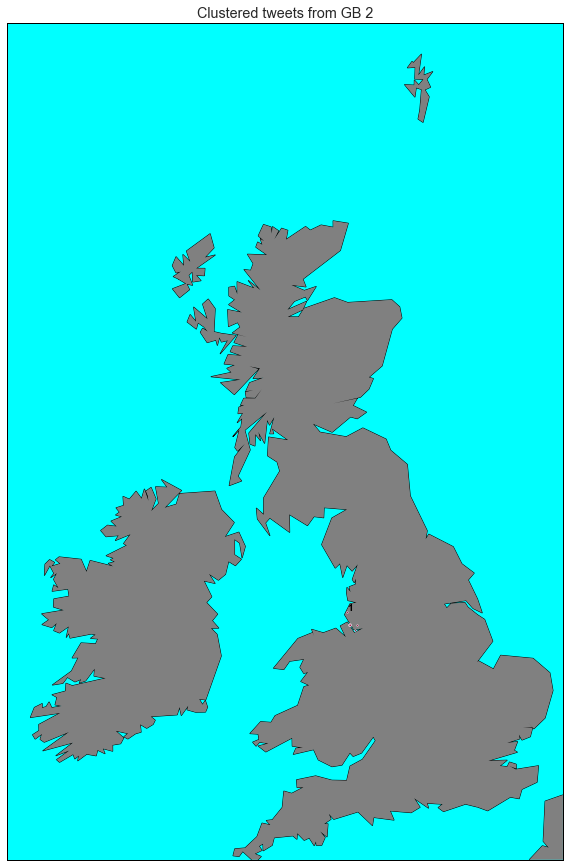

Making the Map took: 1.154754877090454
Method 2 took: 0.0008308887481689453
[ 0  0  0 -1  0  0]
start calculating
1. Cluster, with 5 tweets, 3 distinct users, the most freq. words are:
This cluster is From: 2016-07-02T18:02:56.000000000 To 2016-07-02T22:27:54.000000000
[('thornbridge', 5), ('hall', 4), ('drinking', 4), ('decent', 2), ('valravn', 1), ('einsteinium', 1), ('tonka', 1), ('likely', 1), ('jolly', 1), ('indeed', 1), ('goose', 1), ('immense', 1), ('outdoors', 1), ('chase', 1), ('pretty', 1)]
 ------------- 
 
There were 1 out of 6 Tweets that were clustered as noise
This is 16.6666666667%.


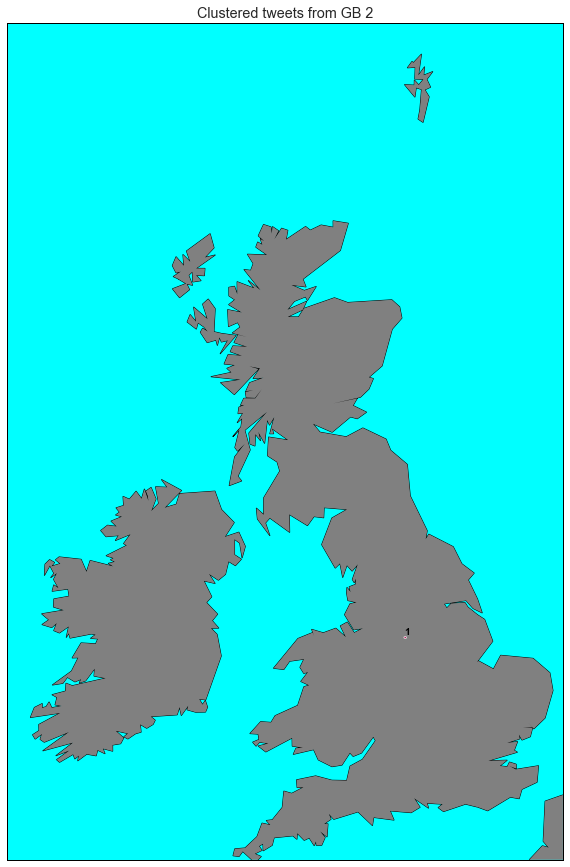

Making the Map took: 1.0606629848480225
There were 398 Tweets that were clustered as noise
Begin Analysis for next day
3 day Clustered. The passed time is: 0.014596939086914062
labelsMethod2_loc: 1500
start calculating
Method 2 took: 0.001188039779663086
[-1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1
 -1]
start calculating
1. Cluster, with 7 tweets, 7 distinct users, the most freq. words are:
This cluster is From: 2016-07-03T16:16:18.000000000 To 2016-07-03T21:41:59.000000000
[('manchester', 9), ('station', 3), ('railway', 3), ('greater', 2), ('united', 2), ('piccadilly', 2), ('littleborough', 2), ('kingdom', 2), ('stockport', 2), ('clouds', 1), ('take', 1), ('carnival', 1), ('#manchester', 1), ('#parade', 1), ('time', 1)]
 ------------- 
 
There were 44 out of 51 Tweets that were clustered as noise
This is 86.2745098039%.


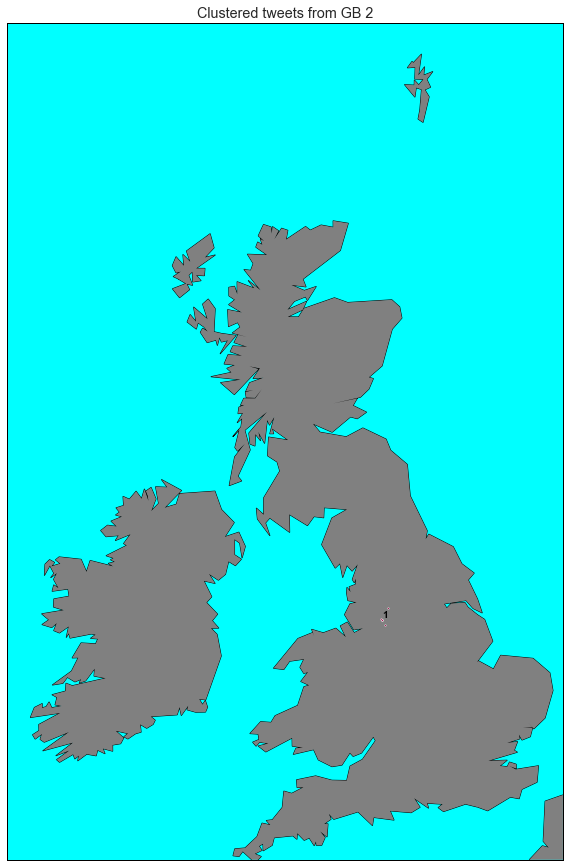

Making the Map took: 1.064328908920288
Method 2 took: 0.011647939682006836
[ 0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1
  0 -1  2  0  0  0  3  0  4 -1 -1 -1 -1  5  0 -1  0  0  0  0  0 -1 -1  0  0
  0  0  0  0 -1  0  0 -1  0  0  5  0  0  5  0  0  3  0  0  0  5  0  0  0  0
  0  0  0  0 -1 -1  0  0  0  0  0  4  0  0  0 -1 -1  0  0  0 -1  0  6 -1  3
  4  0  3  0  0  0  3  0  1  0  0  6  0 -1  0 -1  0  0  0 -1 -1 -1 -1  0  0
 -1  0  0  0  0 -1  0  0  0  0  0  5 -1  0  0  5 -1  0  5 -1 -1  0  0 -1  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  6  3  0  0 -1 -1  0  2  0  0  4
  0  0 -1  0  0  4  0  3  0  2  0  0  0  2  0  5  0  0  0  5  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  6 -1  0 -1 -1  0  0  0 -1 -1  0
  0  0  2  0  0  0 -1  0 -1  0  5 -1  0  0 -1  0 -1  0  0  0  5  0  0 -1  0
 -1  0  0  0  0  2  0  2  0  0  0  0 -1  0  0 -1  0  0  0  0 -1  0  0  2 -1
 -1  0  0  2  1  5 -1  0  0  5  0  0  0  2  6  0  0  0  0  0  0  0  0  1 -1
  0  6  0  5 

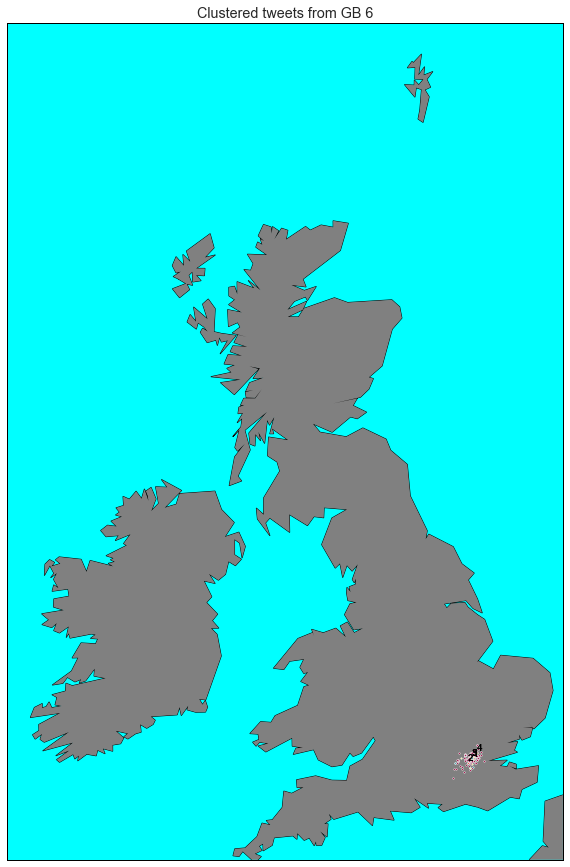

Making the Map took: 1.2149569988250732
Method 2 took: 0.00090789794921875
[ 0  0  0  0  0 -1  0 -1 -1  0 -1]
start calculating
There were 4 out of 11 Tweets that were clustered as noise
This is 36.3636363636%.


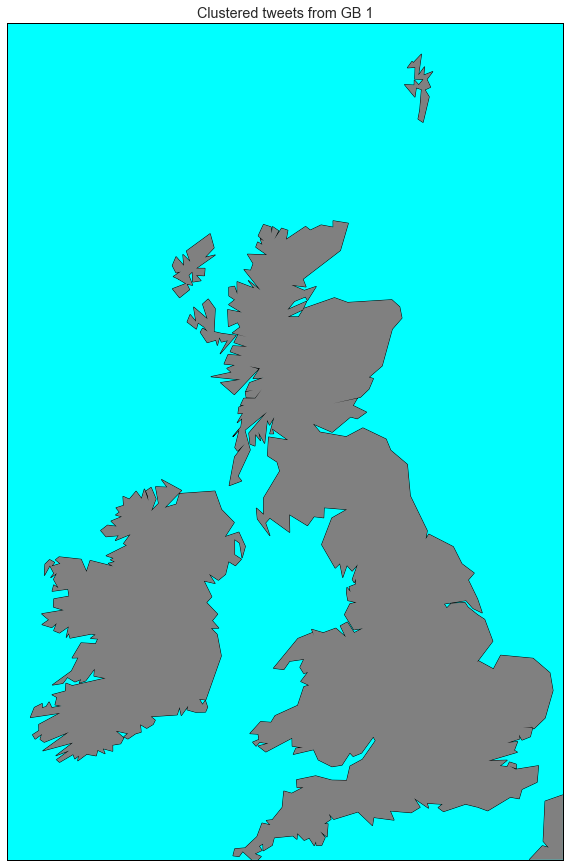

Making the Map took: 1.119873046875
Method 2 took: 0.0017039775848388672
[-1 -1 -1  0 -1 -1  0  0 -1  0  0  0 -1  0 -1 -1 -1  0  0 -1 -1  0 -1 -1 -1
 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1]
start calculating
1. Cluster, with 14 tweets, 14 distinct users, the most freq. words are:
This cluster is From: 2016-07-03T16:26:32.000000000 To 2016-07-03T22:13:05.000000000
[('dublin', 9), ('hotel', 4), ('ireland', 4), ('college', 3), ('trinity', 2), ('#dublin', 2), ('park', 1), ('clayton', 1), ('week', 1), ('stunning', 1), ('first', 1), ('clontarf', 1), ('back', 1), ('stroll', 1), ('gardiner', 1)]
 ------------- 
 
There were 28 out of 42 Tweets that were clustered as noise
This is 66.6666666667%.


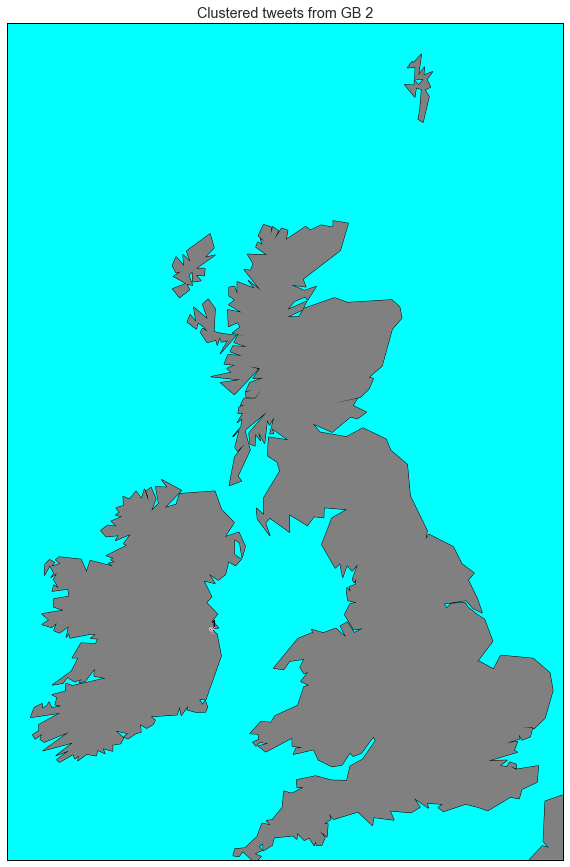

Making the Map took: 1.1415870189666748
Method 2 took: 0.0012249946594238281
[-1 -1  0  0 -1 -1 -1 -1 -1  0 -1 -1  0  0 -1 -1 -1  0  0 -1 -1 -1 -1  0]
start calculating
1. Cluster, with 8 tweets, 8 distinct users, the most freq. words are:
This cluster is From: 2016-07-03T16:27:02.000000000 To 2016-07-03T21:46:34.000000000
[('leeds', 5), ('city', 3), ('hall', 2), ('flats', 2), ('&amp;', 2), ('park', 1), ('best', 1), ('punk', 1), ('belgrave', 1), ('steam', 1), ('hotel', 1), ('wakefield', 1), ('street', 1), ('🏙🛍#treat', 1), ('view', 1)]
 ------------- 
 
There were 16 out of 24 Tweets that were clustered as noise
This is 66.6666666667%.


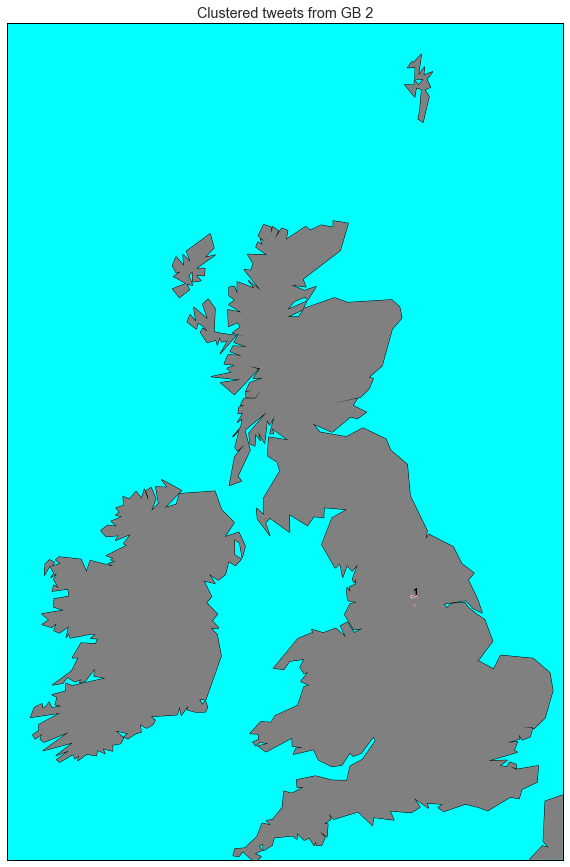

Making the Map took: 1.0609159469604492
Method 2 took: 0.0012021064758300781
[-1  0  0 -1 -1  0  0 -1  0 -1]
start calculating
1. Cluster, with 5 tweets, 4 distinct users, the most freq. words are:
This cluster is From: 2016-07-03T17:06:25.000000000 To 2016-07-03T22:18:59.000000000
[('#oxford', 3), ('#summer', 3), ('united', 2), ('kingdom', 2), ('oxford', 2), ('oxfordshire', 2), ('#meadow', 1), ('#christchurchmeadow', 1), ('beauty', 1), ('#sunnyday', 1), ('blind', 1), ('#shadows', 1), ('many', 1), ('session', 1), ('#oiloncanvas', 1)]
 ------------- 
 
There were 5 out of 10 Tweets that were clustered as noise
This is 50.0%.


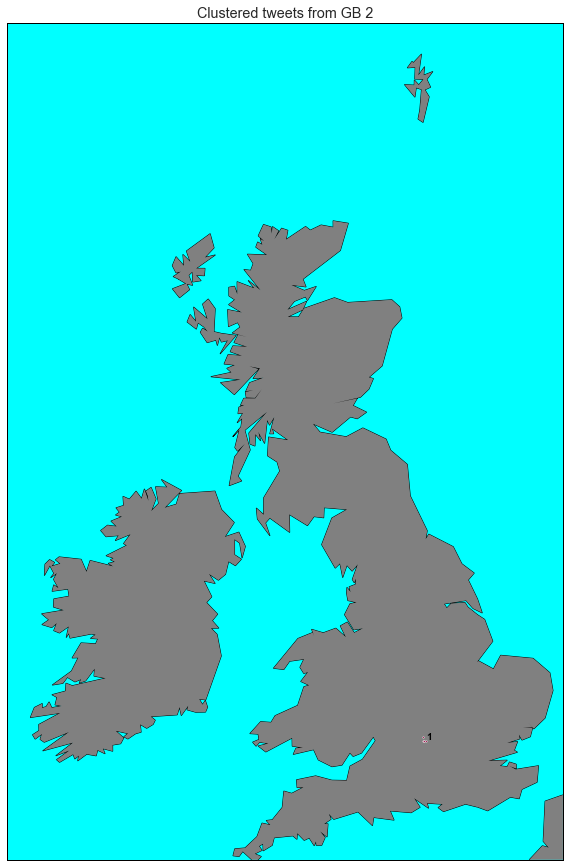

Making the Map took: 1.0747811794281006
Method 2 took: 0.0013108253479003906
[ 0  1 -1 -1  0 -1  1 -1  2 -1  2 -1  1 -1 -1 -1  0  2 -1 -1  1 -1  1 -1 -1
  0  2  2 -1 -1 -1 -1 -1  0 -1 -1  2  2]
start calculating
1. Cluster, with 5 tweets, 5 distinct users, the most freq. words are:
This cluster is From: 2016-07-03T17:14:21.000000000 To 2016-07-03T20:21:44.000000000
[('happened', 4), ('france', 4), ('game', 4), ('explosion', 4), ('time', 4), ('stade', 4), ('tonight’s', 4), ('local', 4), ('show', 1), ('shit', 1), ('shows', 1), ('england', 1), ('#eng', 1)]
 ------------- 
 
2. Cluster, with 5 tweets, 4 distinct users, the most freq. words are:
This cluster is From: 2016-07-03T17:17:40.000000000 To 2016-07-03T20:14:37.000000000
[('#fra', 3), ('prediction', 2), ('!!!!', 2), ('#ice', 2), ('#fifa16', 2), ('what’s', 2), ('game', 1), ('fuck', 1), ('gone', 1), ('scored', 1), ('mins', 1), ('good', 1), ('giroud', 1), ('goal', 1), ('yarders', 1)]
 ------------- 
 
3. Cluster, with 7 tweets, 7 disti

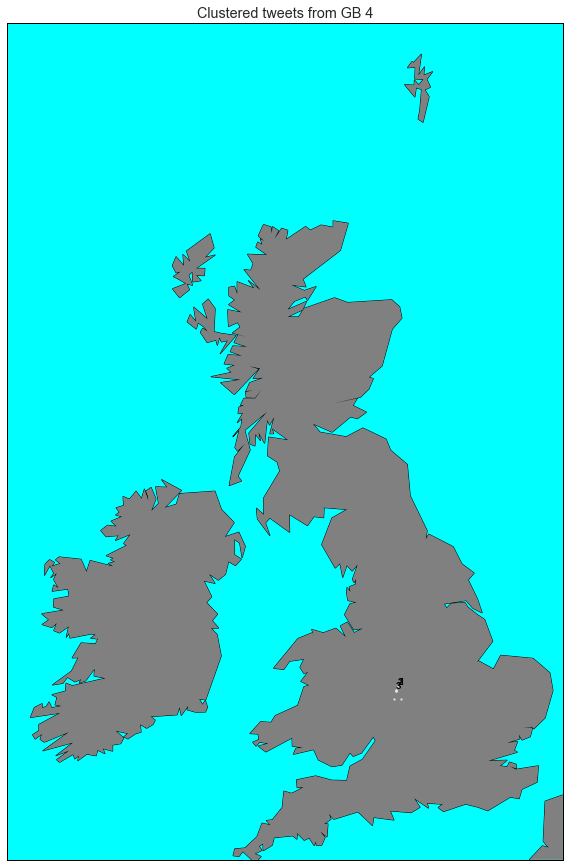

Making the Map took: 1.0462119579315186
Method 2 took: 0.0011720657348632812
[ 0  0 -1 -1  0 -1  0  0 -1  0]
start calculating
1. Cluster, with 6 tweets, 6 distinct users, the most freq. words are:
This cluster is From: 2016-07-03T17:43:06.000000000 To 2016-07-03T21:06:59.000000000
[('godiva', 7), ('festival', 7), ('park', 3), ('memorial', 3), ('today', 2), ('#coventry', 2), ('#godivafestival', 2), ('year', 1), ('#fifthmember', 1), ('#chorus…', 1), ('#godiva', 1), ('found', 1), ('great', 1), ('blue', 1), ('skies', 1)]
 ------------- 
 
There were 4 out of 10 Tweets that were clustered as noise
This is 40.0%.


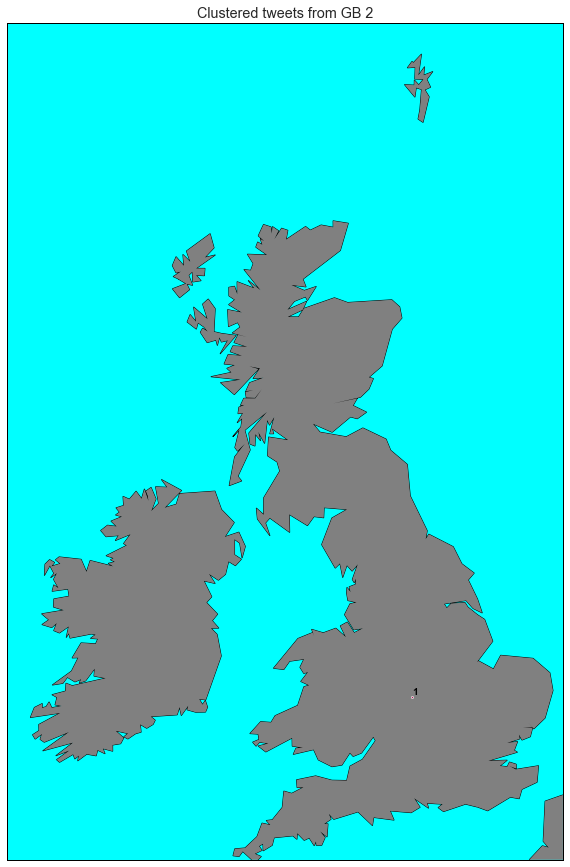

Making the Map took: 1.0587360858917236
Method 2 took: 0.0011680126190185547
[ 0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0]
start calculating
1. Cluster, with 13 tweets, 11 distinct users, the most freq. words are:
This cluster is From: 2016-07-03T16:26:39.000000000 To 2016-07-03T22:16:42.000000000
[('henley', 16), ('regatta', 12), ('royal', 8), ('#henley', 4), ('thames', 3), ('#henleyregatta', 3), ('#rowing', 3), ('#watersports', 2), ('remenham', 2), ('2016', 2), ('#hrr', 2), ('club', 2), ('#remenhamclub', 2), ('week', 1), ('#roadtorio', 1)]
 ------------- 
 
There were 2 out of 15 Tweets that were clustered as noise
This is 13.3333333333%.


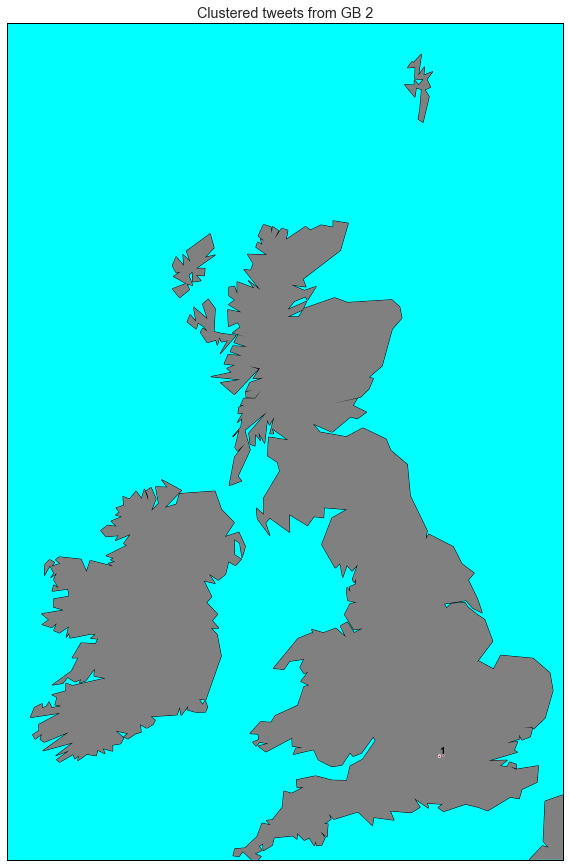

Making the Map took: 1.088118076324463
There were 478 Tweets that were clustered as noise
Begin Analysis for next day
4 day Clustered. The passed time is: 0.012514829635620117
labelsMethod2_loc: 1500
start calculating
Method 2 took: 0.012269020080566406
[ 0  1  2  2  2 -1 -1 -1  2  3 -1  0  4 -1 -1 -1  2  2  2 -1  2  2  5  2  2
  2  2  2  2 -1  0 -1  1  2 -1  2  2  2  2  2  2  2 -1  2  2  2  2 -1  3  2
  6  2  2  2  1 -1  2  4  2 -1  1  1  2  2 -1 -1 -1  2  2  2  0  4  2 -1  1
  6 -1  3  2  2  2  2 -1  3 -1  2  4  2 -1 -1  2  5 -1  2  2  2  2  2  7 -1
  2  2  5  2  0  2  2 -1 -1  5  2  2  2  2 -1  2 -1  2  6 -1  2  2  2  2  2
  2  2  2  2  2  2  2  1 -1  0  2  2  4  2  1 -1  2 -1  2 -1 -1  2  2  2 -1
 -1 -1  2 -1 -1  5  2  2  2  2 -1  2 -1 -1  1  6  6  2  3  1 -1  2  0  2  2
  2 -1 -1  2  2  5  2 -1  2  2  0  2  2  2  2  2  2  2  2  2  2 -1  2 -1 -1
 -1  2  2 -1  2 -1  2 -1  2  2  2 -1  2  2 -1 -1  4 -1  2  2 -1 -1  2  2  2
 -1  2  2  1 -1  2  2  2  2  2 -1  2 -1  0  2  2  2  2  2  0  

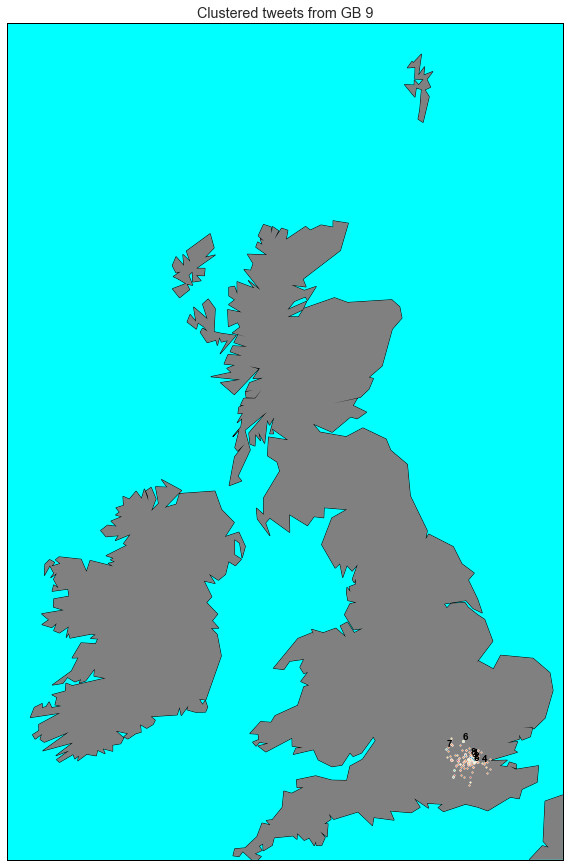

Making the Map took: 1.213393211364746
Method 2 took: 0.0012481212615966797
[-1 -1  1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  0  1 -1
 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  0  1  0 -1  0]
start calculating
1. Cluster, with 11 tweets, 8 distinct users, the most freq. words are:
This cluster is From: 2016-07-04T12:23:18.000000000 To 2016-07-04T21:08:39.000000000
[('dublin', 11), ('#dublin', 6), ('house', 3), ('ireland', 3), ('avenue', 2), ('semi-detached', 2), ('city', 2), ('photo', 2), ('posted', 2), ('county', 2), ('park', 1), ('merrion', 1), ('#lucan', 1), ('🛳⚓🌤…', 1), ('mount', 1)]
 ------------- 
 
There were 32 out of 48 Tweets that were clustered as noise
This is 66.6666666667%.


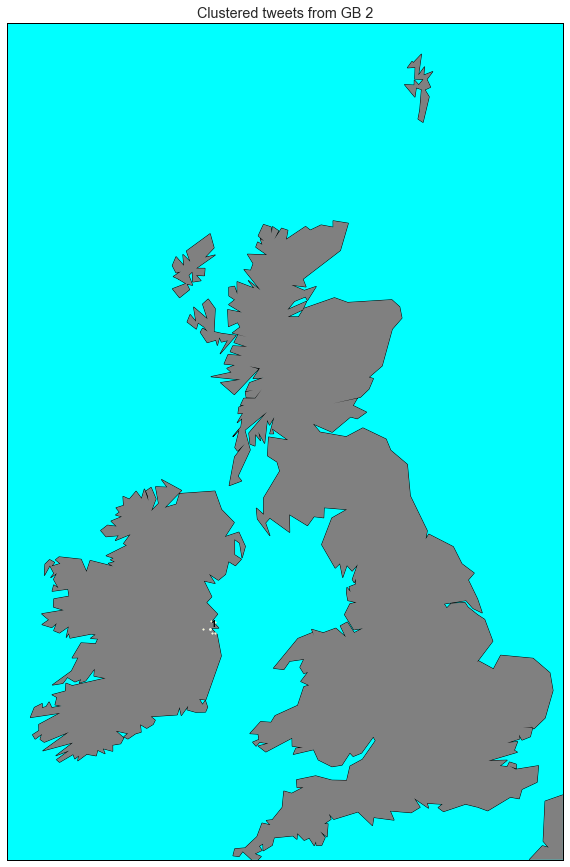

Making the Map took: 1.0248000621795654
Method 2 took: 0.0012831687927246094
[-1 -1 -1  1  1 -1 -1 -1  0  0  0 -1  1 -1 -1  1 -1  0 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1  1]
start calculating
1. Cluster, with 7 tweets, 6 distinct users, the most freq. words are:
This cluster is From: 2016-07-04T09:15:35.000000000 To 2016-07-04T20:55:00.000000000
[('manchester', 11), ('greater', 4), ('salford', 2), ('american', 1), ('#ginandtonic', 1), ('#jackdaniel', 1), ('#krispykreme', 1), ('#efmoment', 1), ('friends', 1), ('station', 1), ('airport', 1), ('#efambassador', 1), ('united', 1), ('think', 1), ('free', 1)]
 ------------- 
 
2. Cluster, with 6 tweets, 6 distinct users, the most freq. words are:
This cluster is From: 2016-07-04T07:44:47.000000000 To 2016-07-04T21:22:37.000000000
[('morning', 2), ('back', 2), ('always', 2), ('right', 1), ('tomorrow', 1), ('ready', 1), ("it's…", 1), ('zone', 1), ('happy', 1), ('great', 1), ('#dancelife…', 1), (

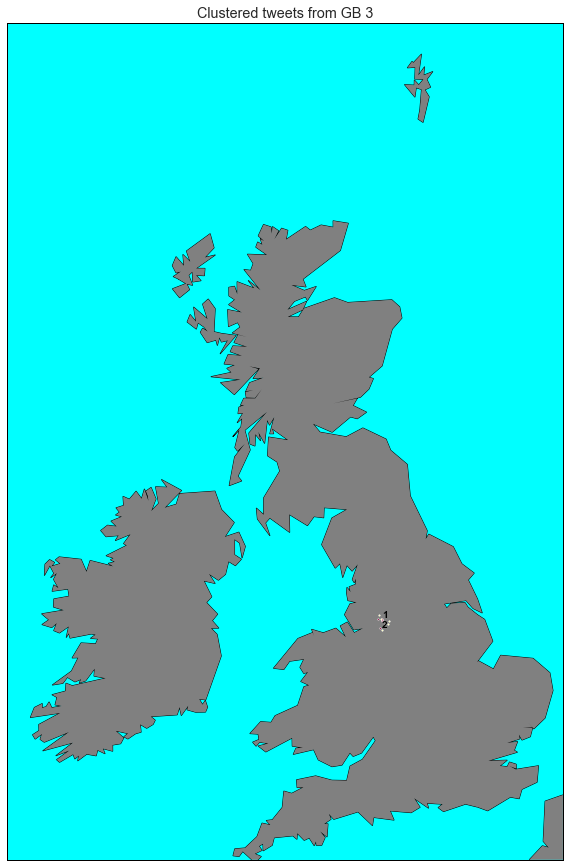

Making the Map took: 1.1718759536743164
Method 2 took: 0.0012271404266357422
[ 0 -1  0  0  0  0 -1 -1  0 -1 -1  0 -1]
start calculating
There were 6 out of 13 Tweets that were clustered as noise
This is 46.1538461538%.


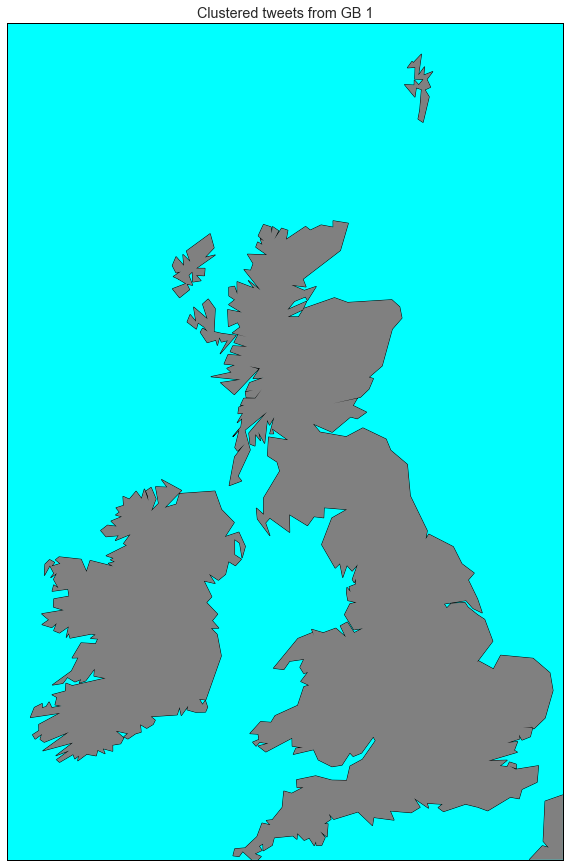

Making the Map took: 1.022406816482544
Method 2 took: 0.0018448829650878906
[ 0  0  0  0 -1  0  0  0  0 -1 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0 -1  0  0]
start calculating
There were 6 out of 38 Tweets that were clustered as noise
This is 15.7894736842%.


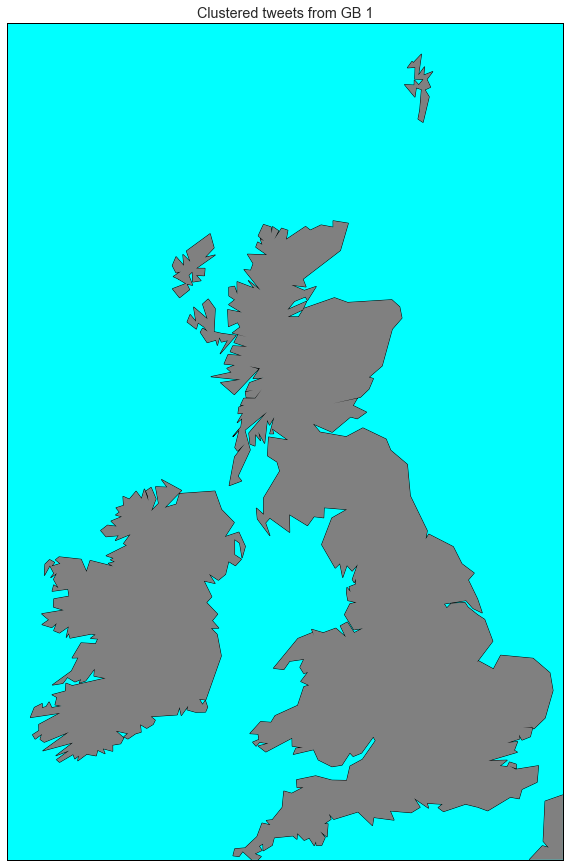

Making the Map took: 1.0991508960723877
Method 2 took: 0.0008211135864257812
[-1  0 -1  0  0  0  0 -1 -1]
start calculating
1. Cluster, with 5 tweets, 5 distinct users, the most freq. words are:
This cluster is From: 2016-07-04T09:32:01.000000000 To 2016-07-04T12:57:34.000000000
[('oxford', 6), ('oxfordshire', 2), ('university', 2), ('hall', 1), ('morris', 1), ('#brookesbusiness', 1), ('destroy', 1), ('lack', 1), ('william', 1), ('create🤘🏽👅', 1), ('museum', 1), ('love', 1), ('church', 1), ('christ', 1), ('wetherspoon', 1)]
 ------------- 
 
There were 4 out of 9 Tweets that were clustered as noise
This is 44.4444444444%.


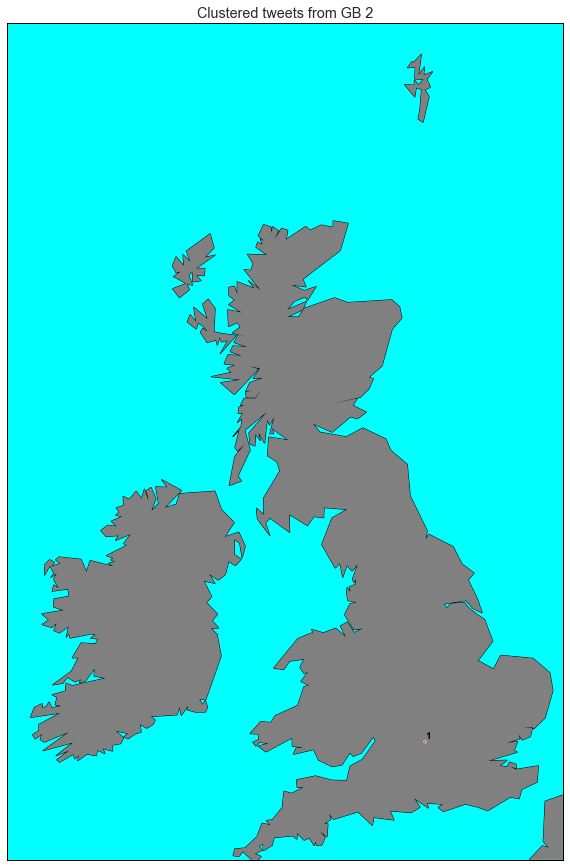

Making the Map took: 1.0806169509887695
Method 2 took: 0.0006451606750488281
[ 0 -1 -1  0  0 -1 -1 -1  0  0 -1]
start calculating
There were 6 out of 11 Tweets that were clustered as noise
This is 54.5454545455%.


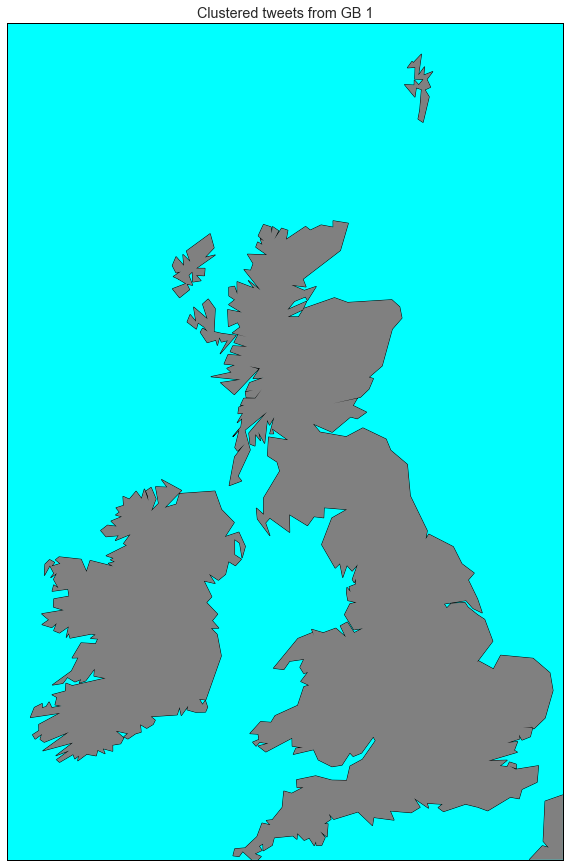

Making the Map took: 1.0617790222167969
There were 427 Tweets that were clustered as noise
Begin Analysis for next day
5 day Clustered. The passed time is: 0.011157989501953125
labelsMethod2_loc: 1500
start calculating
Method 2 took: 0.001194000244140625
[ 0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1 -1 -1]
start calculating
There were 5 out of 16 Tweets that were clustered as noise
This is 31.25%.


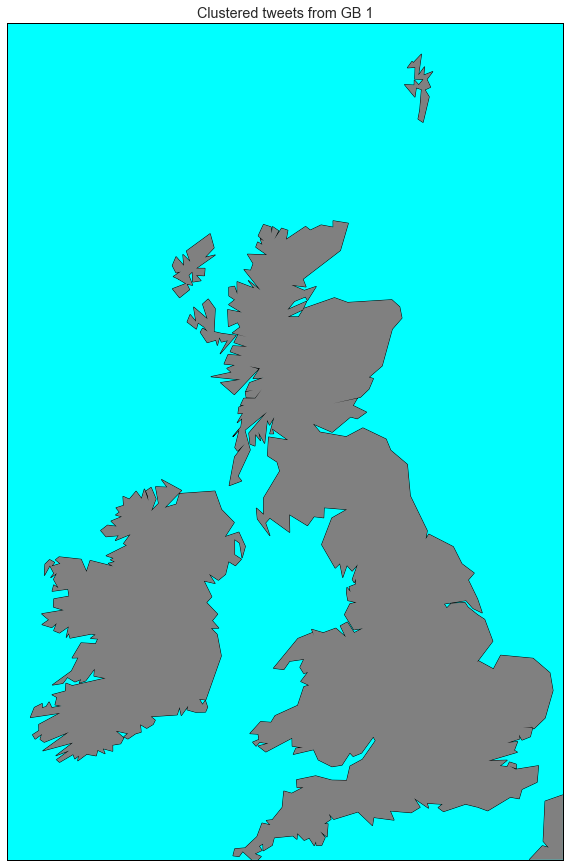

Making the Map took: 1.0738060474395752
Method 2 took: 0.008908987045288086
[ 0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0 -1  0  0  1  0  0  0 -1  0 -1
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  2  0  0 -1  0  0  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0 -1  0 -1 -1  0 -1 -1  0  0  0  0  0 -1  0  0
  0  0 -1 -1  0 -1 -1  0 -1 -1  0  1  0 -1  1  0  0  0 -1  0  0  0  0  0  0
 -1  0  0 -1  0  0 -1  0 -1  0  0  0  1  0  0 -1 -1  0 -1 -1  0  0  0 -1  0
 -1 -1  0  0 -1  0  0 -1  2  0  0  3 -1  0  0  0 -1  0  0 -1  0 -1  0 -1  0
  0  0 -1 -1  0 -1  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  1
  0  0  0  0  0 -1 -1  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0
  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0 -1  0 -1 -1  0 -1  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0 -1  0  0  0  0  1  2  0
  0  0 -1  0 -1  0  0  0 -1  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  1  0  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0
  0  0  0  0

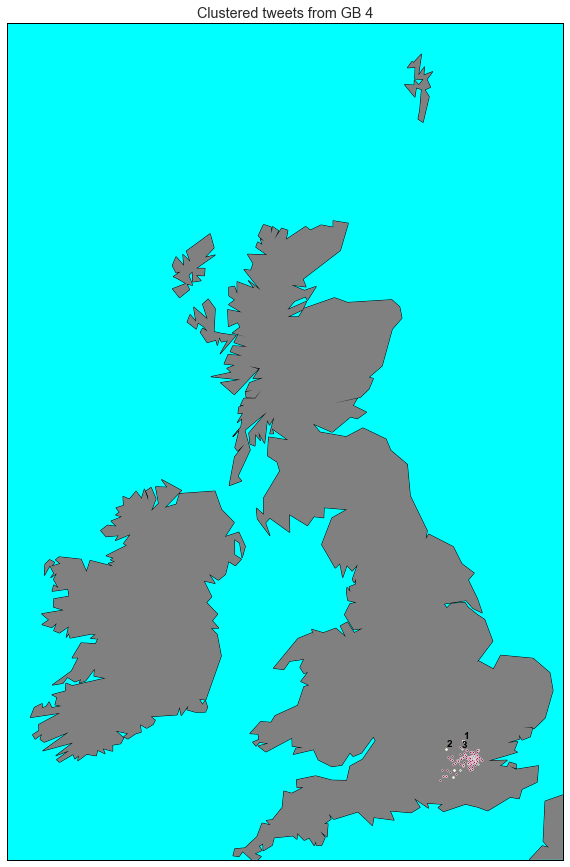

Making the Map took: 1.0515220165252686
Method 2 took: 0.0011479854583740234
[-1 -1  0 -1  0 -1 -1 -1 -1  0 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1
 -1  0  0 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1  0 -1]
start calculating
1. Cluster, with 15 tweets, 12 distinct users, the most freq. words are:
This cluster is From: 2016-07-05T08:56:05.000000000 To 2016-07-05T17:45:29.000000000
[('dublin', 11), ('#dublin', 5), ('storehouse', 3), ('ireland', 3), ('guinness', 3), ('house', 2), ('#ireland', 2), ('love', 2), ('road', 2), ('&amp;', 2), ('feelings', 1), ('castle', 1), ('#ever', 1), ('happy', 1), ('terraced', 1)]
 ------------- 
 
There were 28 out of 43 Tweets that were clustered as noise
This is 65.1162790698%.


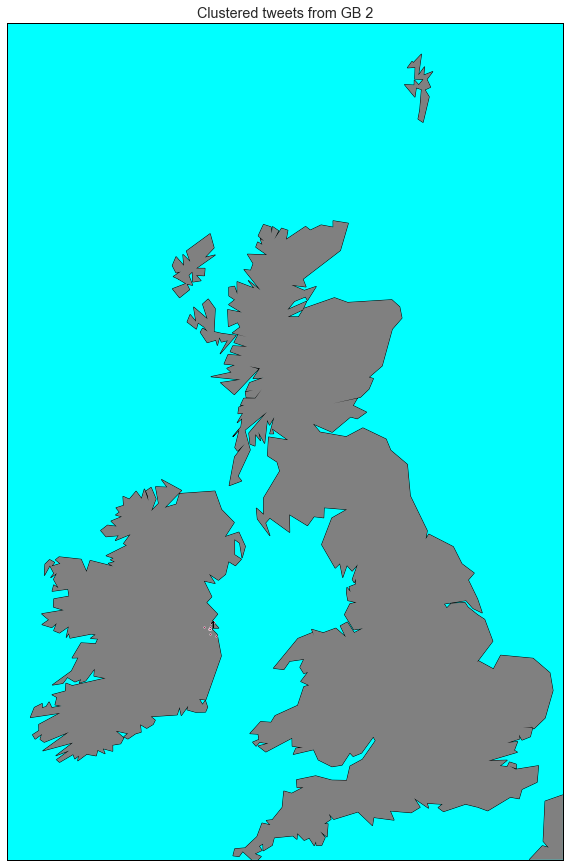

Making the Map took: 0.9966089725494385
Method 2 took: 0.0014591217041015625
[ 0 -1 -1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0 -1]
start calculating
1. Cluster, with 6 tweets, 6 distinct users, the most freq. words are:
This cluster is From: 2016-07-05T10:18:39.000000000 To 2016-07-05T17:13:05.000000000
[('hampshire', 5), ('southampton', 3), ('another', 2), ('liberty', 1), ('gallery', 1), ('bowl', 1), ('shopping', 1), ('college', 1), ('centre', 1), ('quays', 1), ('school', 1), ('ageas', 1), ('house', 1), ('trophy', 1), ('marwell', 1)]
 ------------- 
 
There were 12 out of 18 Tweets that were clustered as noise
This is 66.6666666667%.


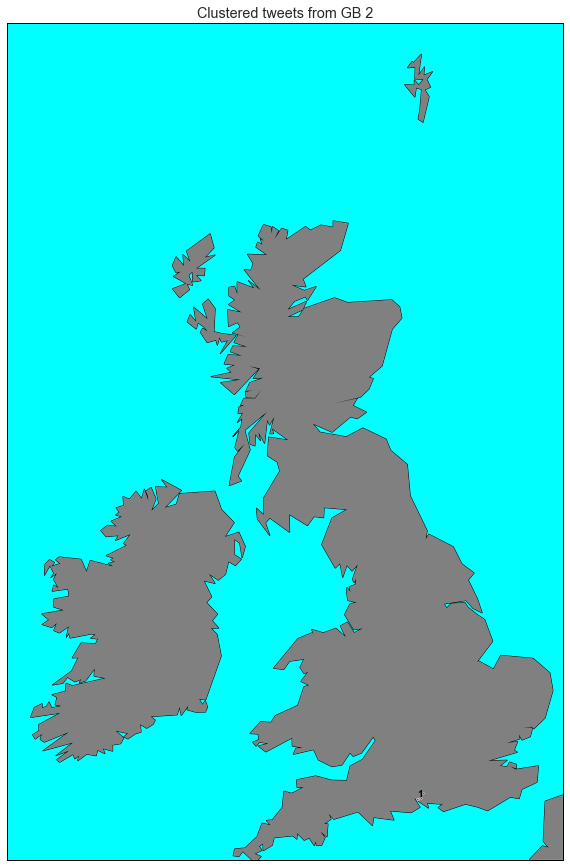

Making the Map took: 1.0123510360717773
Method 2 took: 0.000843048095703125
[ 0  0  0 -1  0  0  0]
start calculating
There were 1 out of 7 Tweets that were clustered as noise
This is 14.2857142857%.


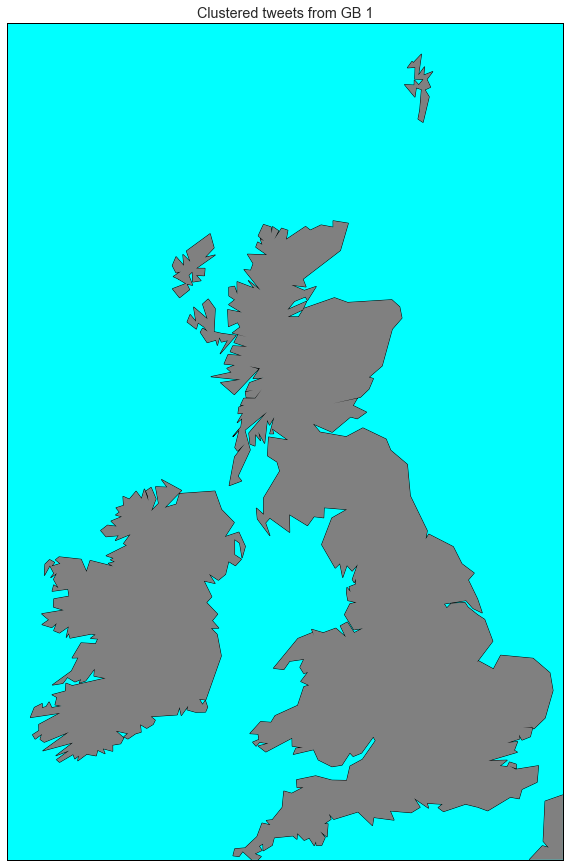

Making the Map took: 1.0125200748443604
Method 2 took: 0.0006659030914306641
[ 0  0  0  0  0  0  0 -1 -1 -1 -1]
start calculating
There were 4 out of 11 Tweets that were clustered as noise
This is 36.3636363636%.


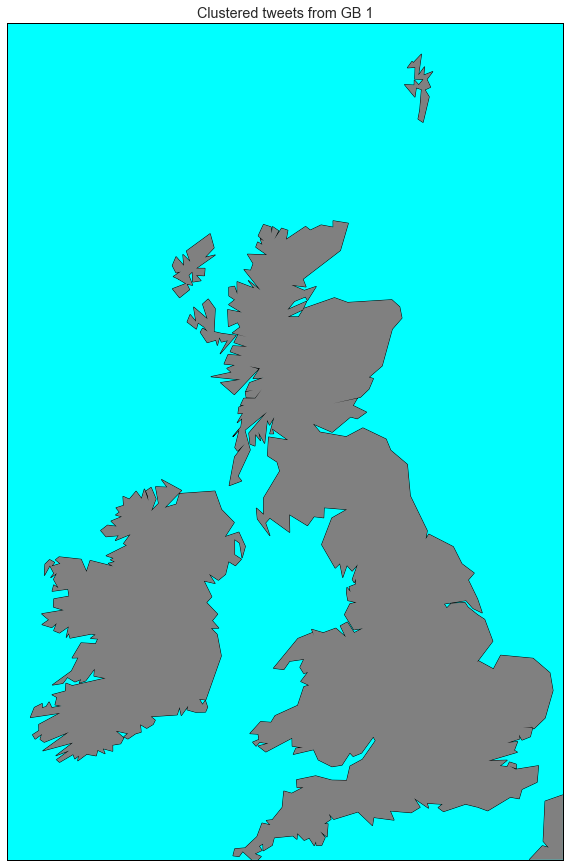

Making the Map took: 1.0077240467071533
Method 2 took: 0.0006349086761474609
[ 0  0 -1  0  0 -1  0]
start calculating
There were 2 out of 7 Tweets that were clustered as noise
This is 28.5714285714%.


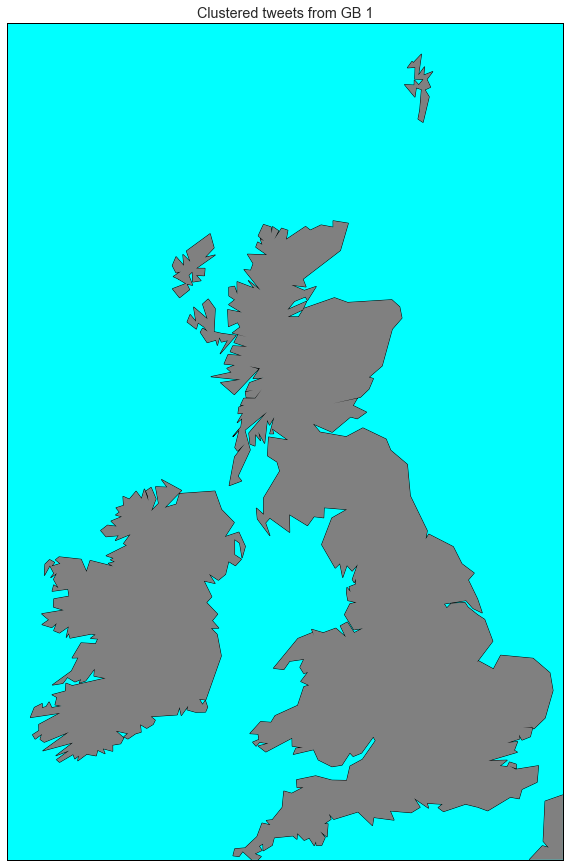

Making the Map took: 1.0077199935913086
Method 2 took: 0.0006718635559082031
[ 0  0 -1  0 -1  0  0 -1  0 -1]
start calculating
There were 4 out of 10 Tweets that were clustered as noise
This is 40.0%.


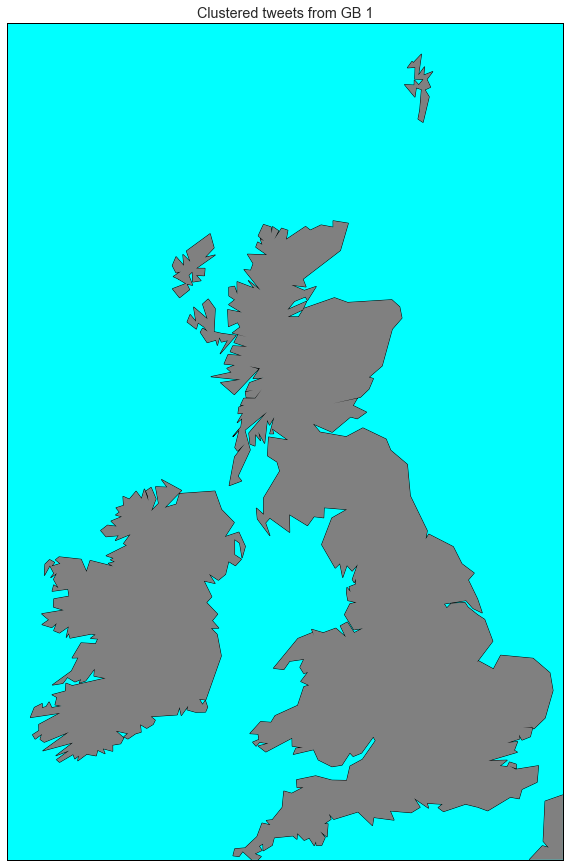

Making the Map took: 1.001986026763916
There were 411 Tweets that were clustered as noise
Begin Analysis for next day
6 day Clustered. The passed time is: 0.010992050170898438
labelsMethod2_loc: 1500
start calculating
Method 2 took: 0.0009601116180419922
[ 0  0 -1  0  0  0  0  0 -1 -1 -1  0  0  0  0 -1  0 -1 -1  0  0  0  0  0  0
  0 -1  0  0  0  0]
start calculating
There were 8 out of 31 Tweets that were clustered as noise
This is 25.8064516129%.


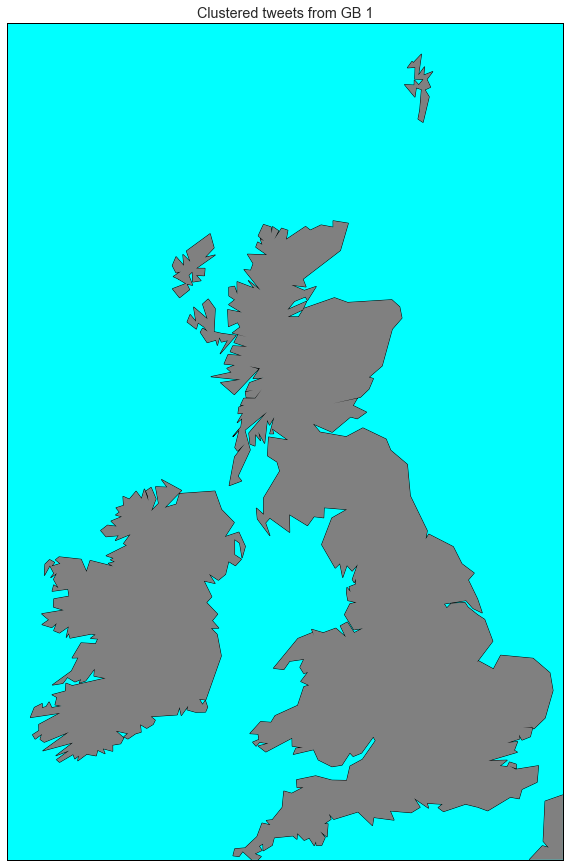

Making the Map took: 0.9915609359741211
Method 2 took: 0.01085209846496582
[-1 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0
  0 -1 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  1  2  0  0 -1  0  3  0
 -1  0  0  0  0  0  0  0  0  0 -1  4  4 -1  2  0  0  0 -1 -1  0  0  0  0  0
  2  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  3  0  0  0  0  0 -1  4  0
  0  0  1  0  0 -1  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  3  3  0  4  0 -1
  0  0  0  0  0  0  0  0  0  4 -1  1  0 -1  0 -1 -1  0 -1  0  4 -1  0  0  0
  0 -1 -1 -1  0  0  0  0  0  0  0 -1 -1  0  0  0  4  0  2  0  0  0 -1 -1 -1
 -1 -1 -1  0  0 -1  0  0  0  0 -1  0  3  0 -1  0  0 -1 -1  0  0  0  0 -1 -1
 -1 -1  0 -1  0  0  0  0 -1  0  0 -1 -1 -1  0  0  0  4 -1  0 -1 -1  0  0  0
 -1  4  0  0  3  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0 -1  0  0 -1
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  4 -1  0  0  0  4 -1  0  1 -1 -1
  4  4 -1  1 -1  4  0  0 -1  0  0 -1  0 -1  0  0  0  3  0 -1  0 -1  0  0 -1
  3  0  0  0 

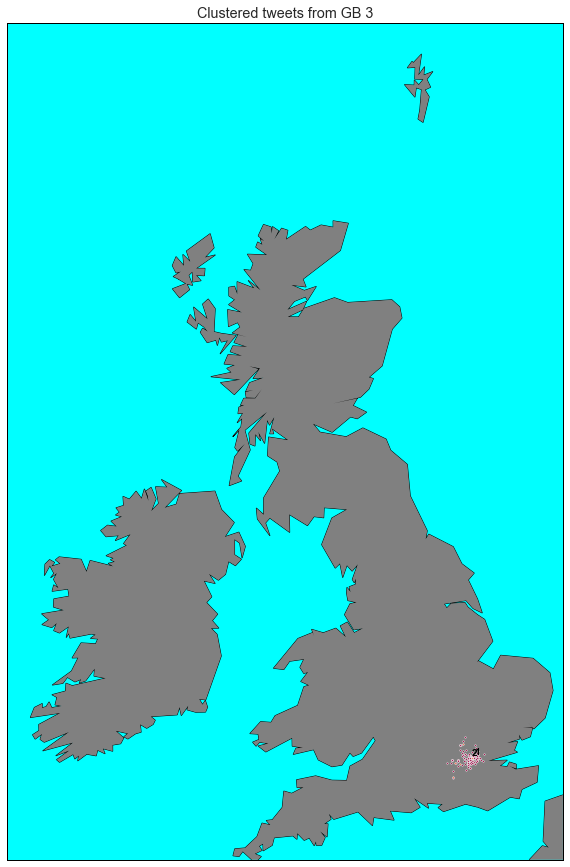

Making the Map took: 1.1503489017486572
Method 2 took: 0.002507925033569336
[-1 -1 -1  0 -1 -1  0  0  0 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1
  0 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1  0 -1
 -1  0 -1  0]
start calculating
1. Cluster, with 18 tweets, 18 distinct users, the most freq. words are:
This cluster is From: 2016-07-06T09:26:51.000000000 To 2016-07-06T19:57:23.000000000
[('trafford', 12), ('ground', 9), ('cricket', 9), ('beyoncé', 6), ('emirates', 5), ('beyonce', 5), ('best', 3), ('tour', 3), ('formation', 3), ('#formationworldtour', 3), ('last', 3), ('manchester', 3), ('night', 3), ('ever', 2), ('world', 2)]
 ------------- 
 
There were 36 out of 54 Tweets that were clustered as noise
This is 66.6666666667%.


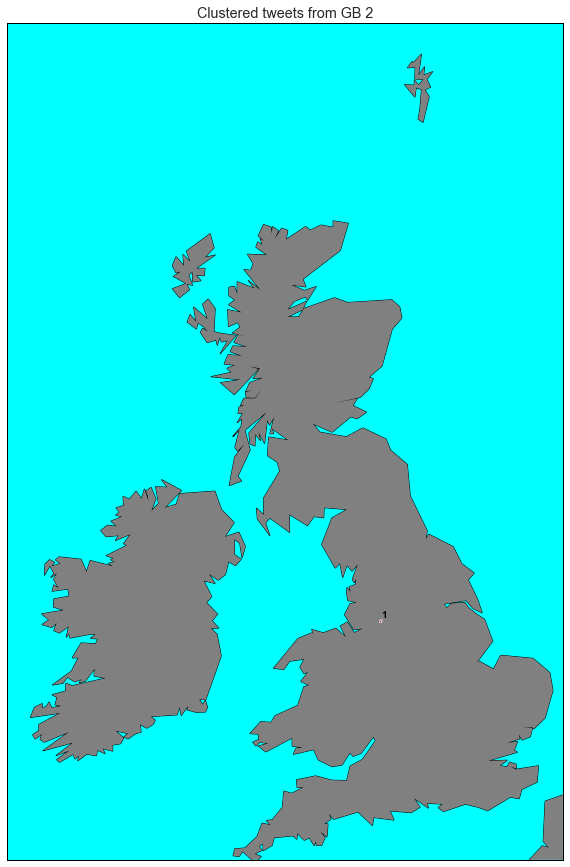

Making the Map took: 1.0715210437774658
Method 2 took: 0.0009489059448242188
[ 0 -1 -1 -1 -1  0 -1  0 -1  0  0 -1  0 -1  0  0  0  0 -1  0 -1  0 -1 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1]
start calculating
1. Cluster, with 15 tweets, 6 distinct users, the most freq. words are:
This cluster is From: 2016-07-06T10:53:00.000000000 To 2016-07-06T19:03:59.000000000
[('dublin', 12), ('#dublin', 11), ('terraced', 4), ('house', 4), ('duplex', 3), ('apartment', 3), ('abbot', 2), ('rathgar', 2), ('#knocklyon', 2), ('road', 2), ('avenue', 2), ('beautiful', 2), ('#grand_canal_dk', 1), ('#rathfarnham', 1), ('cathedral', 1)]
 ------------- 
 
There were 26 out of 41 Tweets that were clustered as noise
This is 63.4146341463%.


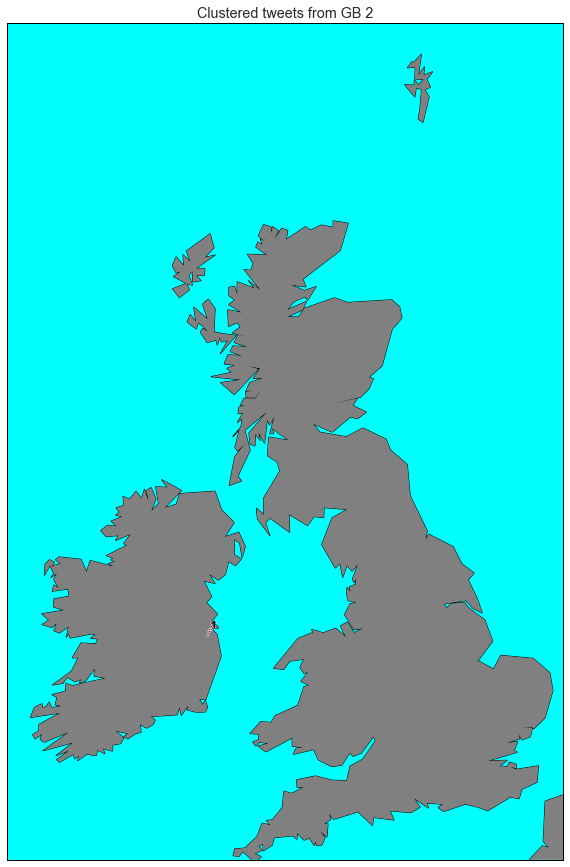

Making the Map took: 1.0623080730438232
Method 2 took: 0.0009961128234863281
[-1  0 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1  0 -1 -1  0 -1  0 -1  0 -1]
start calculating
There were 15 out of 22 Tweets that were clustered as noise
This is 68.1818181818%.


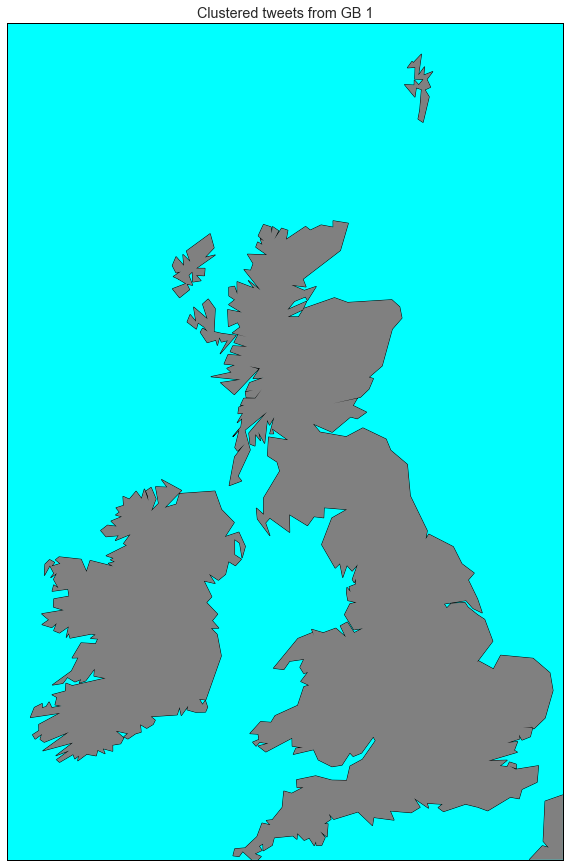

Making the Map took: 1.1194508075714111
Method 2 took: 0.0010790824890136719
[ 0 -1 -1  0  0  0  0 -1 -1 -1]
start calculating
There were 5 out of 10 Tweets that were clustered as noise
This is 50.0%.


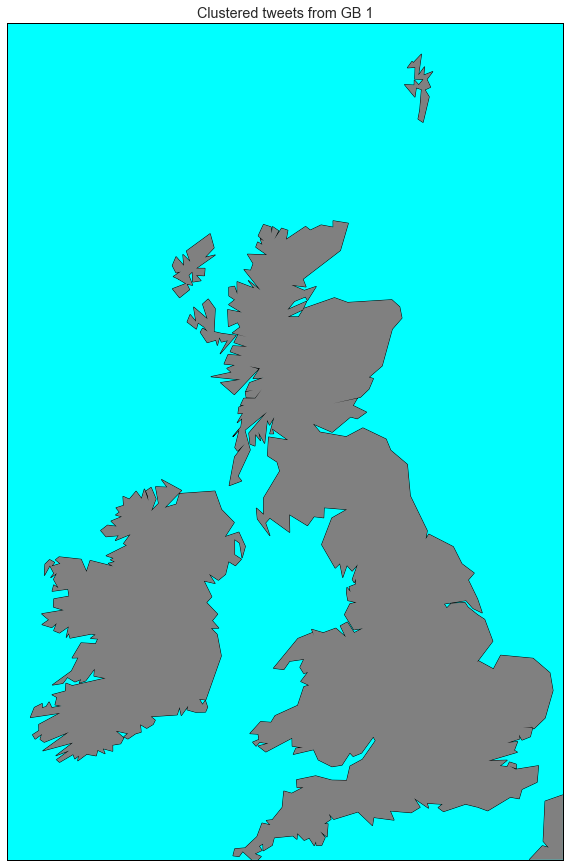

Making the Map took: 1.1505188941955566
Method 2 took: 0.0008409023284912109
[-1 -1 -1 -1  0 -1  0  0  0 -1 -1 -1 -1  0  0 -1 -1]
start calculating
1. Cluster, with 6 tweets, 6 distinct users, the most freq. words are:
This cluster is From: 2016-07-06T10:02:52.000000000 To 2016-07-06T21:25:48.000000000
[('edinburgh', 5), ('hall', 1), ('castle', 1), ('made', 1), ('#lucky', 1), ('tavern', 1), ('midlothian', 1), ('bear', 1), ('room', 1), ('#edinburghcastle', 1), ('britannia', 1), ('away', 1), ('laich', 1), ('yacht', 1), ('princes', 1)]
 ------------- 
 
There were 11 out of 17 Tweets that were clustered as noise
This is 64.7058823529%.


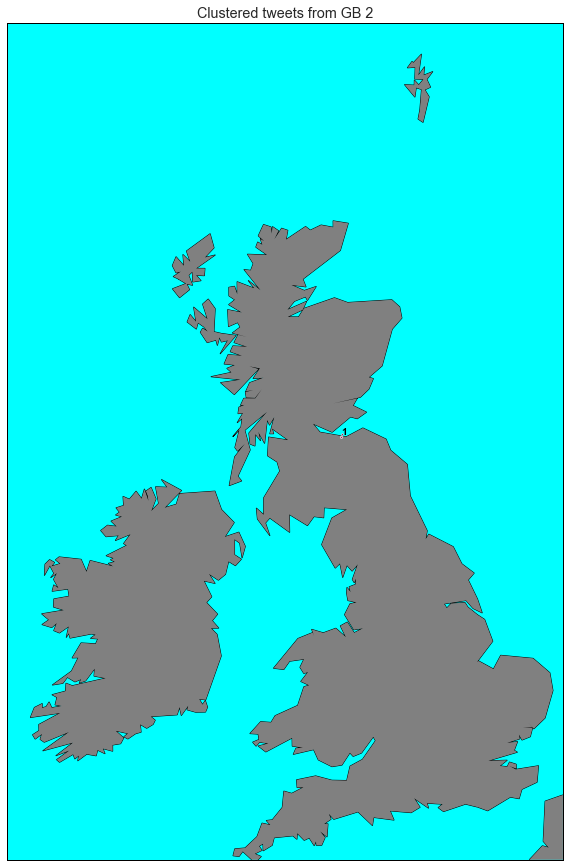

Making the Map took: 1.0599110126495361
Method 2 took: 0.0007891654968261719
[ 0  0 -1  0 -1 -1  0 -1 -1 -1  0  0 -1]
start calculating
There were 7 out of 13 Tweets that were clustered as noise
This is 53.8461538462%.


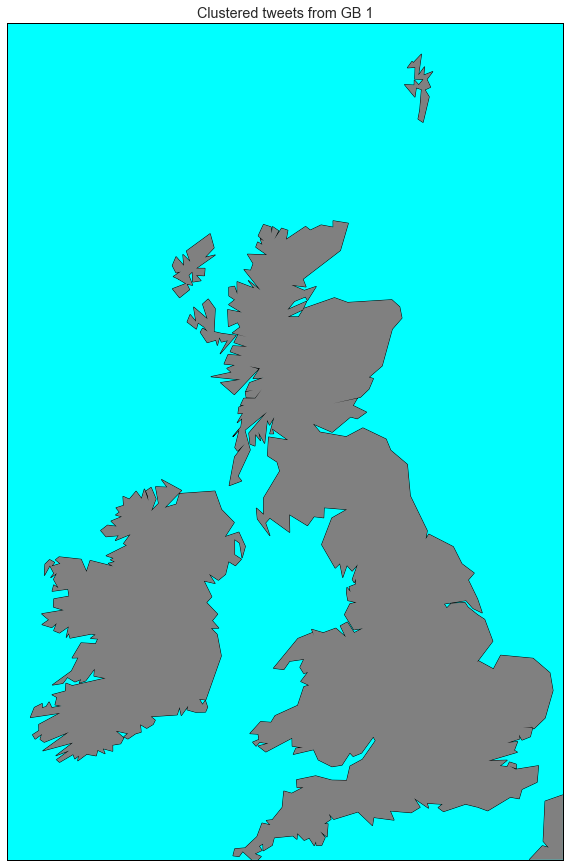

Making the Map took: 1.0877671241760254
There were 402 Tweets that were clustered as noise
Begin Analysis for next day
7 day Clustered. The passed time is: 0.013151884078979492
labelsMethod2_loc: 1500
start calculating
Method 2 took: 0.01054692268371582
[ 0  0 -1 -1  1  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0 -1  0 -1  0 -1
 -1  0  2  1 -1  0 -1  0  0  0  0  0  0 -1 -1 -1 -1  0  0  0  0 -1  1  0  0
 -1  0 -1  0  0 -1  3  0 -1  0  0  0  4  4  0  0 -1  0 -1  0 -1  0  0 -1 -1
  4  0  0  0 -1  0  1 -1  0  1  0  0  0  0  0  0 -1  0  0  0  1  0  0  0 -1
 -1 -1 -1 -1  2  1  1  3  0 -1  0  0  0  0  0 -1  0  0 -1 -1 -1  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0 -1  4  0  0  0  0  0  1  1  0  0  0  0  0
  2 -1  0  2  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  1 -1 -1  0  0
  0 -1  4  0  0  0 -1  0 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  3 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0
 -1  0  0  0  3  0  0 -1  0  2 -1  0  0  2  0 -1  0  0  4  0  

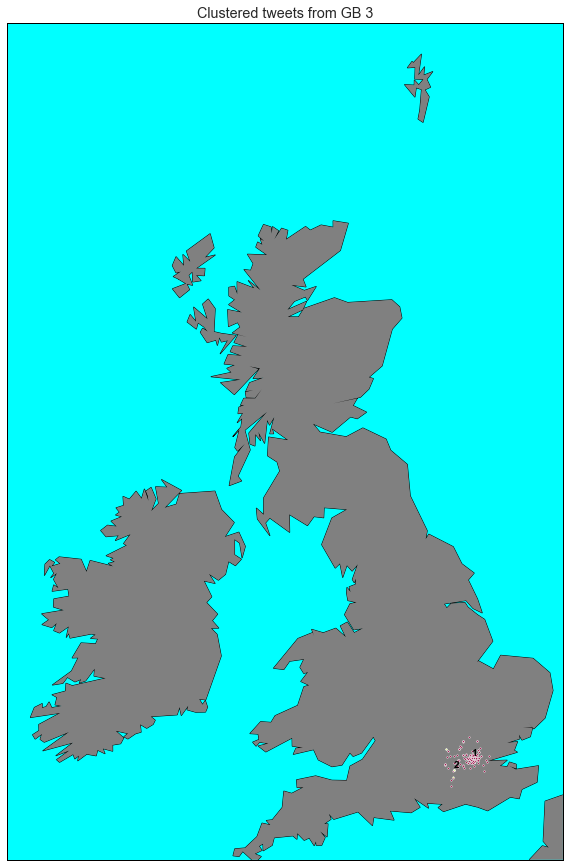

Making the Map took: 1.0969960689544678
Method 2 took: 0.0011839866638183594
[-1 -1  0 -1 -1 -1  1 -1  1  0 -1 -1 -1  0 -1  1 -1  0  1  1  1  0 -1  1  1
  0 -1 -1 -1 -1 -1 -1  1  0 -1 -1 -1  1  1  0  1  0  0]
start calculating
1. Cluster, with 10 tweets, 7 distinct users, the most freq. words are:
This cluster is From: 2016-07-07T07:56:02.000000000 To 2016-07-07T10:57:50.000000000
[('#job', 10), ('#hiring', 10), ('#dublin', 9), ('#careerarc', 8), ('opening', 3), ("we're", 3), ('latest', 3), ('great', 2), ('recommend', 2), ('anyone', 2), ('interested', 2), ('near', 2), ('could', 2), ('join', 2), ('team', 2)]
 ------------- 
 
2. Cluster, with 12 tweets, 11 distinct users, the most freq. words are:
This cluster is From: 2016-07-07T07:27:49.000000000 To 2016-07-07T10:50:50.000000000
[('dublin', 13), ('#dublin', 4), ('#ireland', 3), ('ireland', 3), ('house', 2), ('street', 2), ('#guinness', 2), ('morning', 1), ('goatstown', 1), ('beautiful', 1), ('#ierland', 1), ('terraced', 1), ('#hardroc

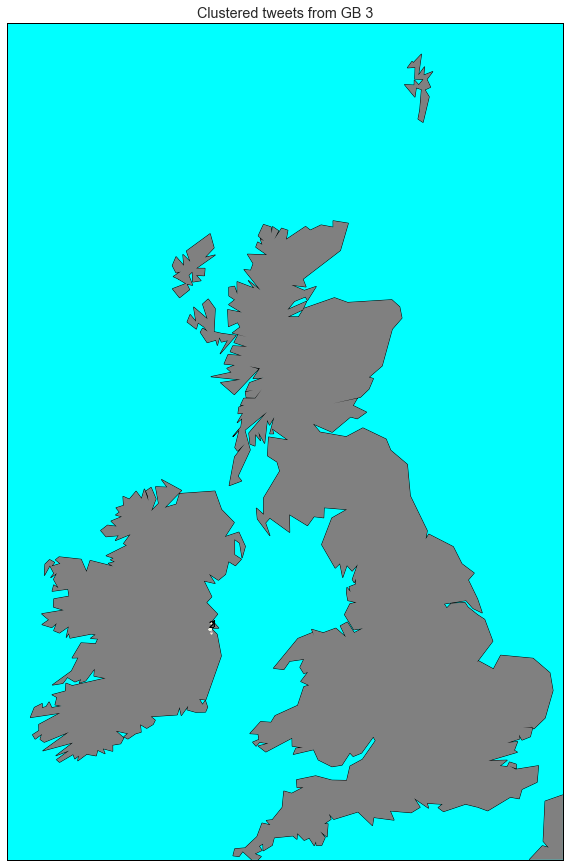

Making the Map took: 1.0488941669464111
Method 2 took: 0.0010650157928466797
[-1 -1 -1 -1  0 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  0 -1 -1  1
 -1 -1 -1 -1  0  0 -1  0 -1 -1  0]
start calculating
1. Cluster, with 6 tweets, 6 distinct users, the most freq. words are:
This cluster is From: 2016-07-07T07:33:37.000000000 To 2016-07-07T09:28:47.000000000
[('united', 3), ('cardiff', 3), ('kingdom', 3), ('#wales', 3), ('#cymru', 2), ('principality', 2), ('stadium', 2), ('#walpor', 1), ('take', 1), ('#togetherstronger', 1), ("don't", 1), ('#wales#cadiffcastle', 1), ('#thisonesforyou', 1), ('2016…', 1), ('taking', 1)]
 ------------- 
 
There were 24 out of 36 Tweets that were clustered as noise
This is 66.6666666667%.


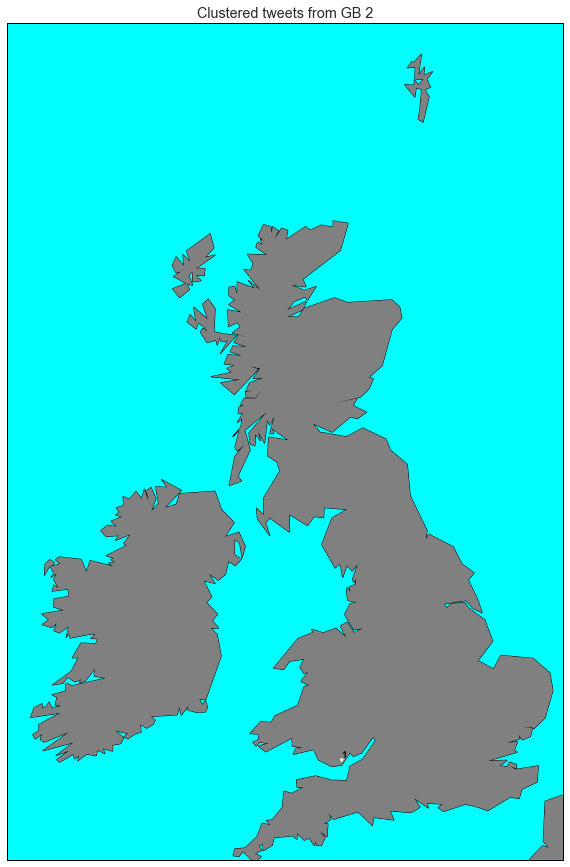

Making the Map took: 1.1166720390319824
Method 2 took: 0.0008780956268310547
[-1  0 -1 -1  0 -1 -1  0 -1  0 -1 -1 -1  0 -1]
start calculating
There were 10 out of 15 Tweets that were clustered as noise
This is 66.6666666667%.


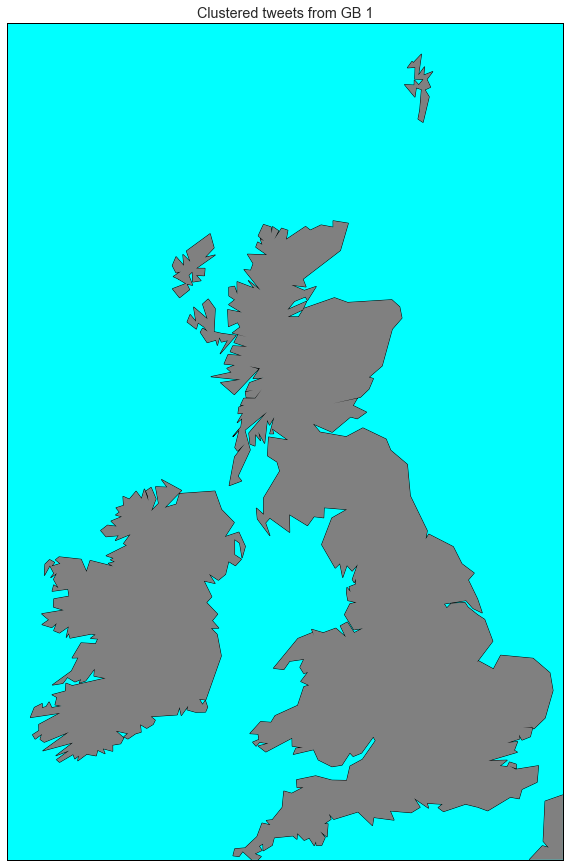

Making the Map took: 1.0746300220489502
Method 2 took: 0.0016269683837890625
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1  0]
start calculating
There were 30 out of 35 Tweets that were clustered as noise
This is 85.7142857143%.


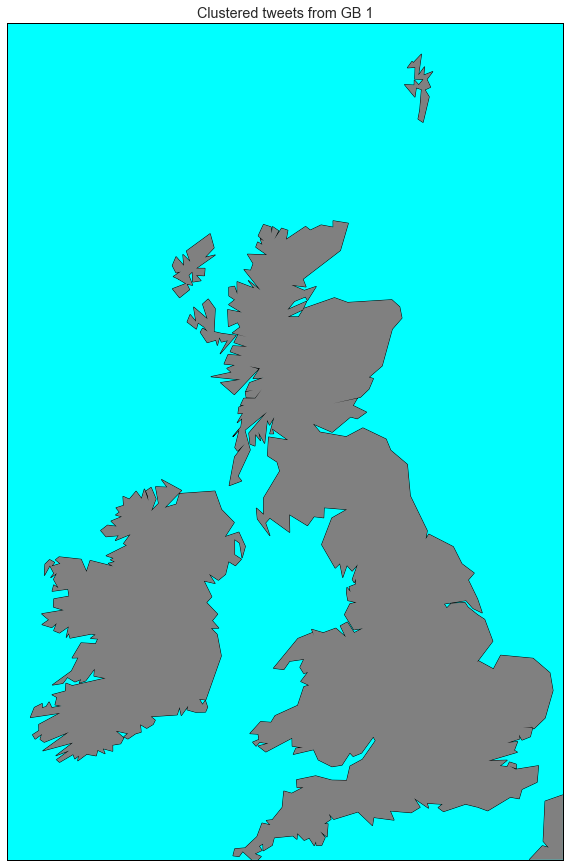

Making the Map took: 1.0112841129302979
Method 2 took: 0.0014030933380126953
[-1  0  0  0 -1  1  1 -1  1 -1 -1 -1 -1  1 -1  0 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  0 -1 -1 -1  0 -1 -1]
start calculating
1. Cluster, with 6 tweets, 5 distinct users, the most freq. words are:
This cluster is From: 2016-07-07T07:42:45.000000000 To 2016-07-07T09:15:10.000000000
[('back', 3), ('office', 3), ('another', 3), ('long', 3), ('morning', 2), ('great', 2), ('wait', 2), ('guys', 2), ('#fra', 2), ('shattered', 2), ('battle', 2), ('good', 2), ('#ger', 2), ('work', 2), ('can’t', 2)]
 ------------- 
 
2. Cluster, with 6 tweets, 4 distinct users, the most freq. words are:
This cluster is From: 2016-07-07T07:25:28.000000000 To 2016-07-07T10:47:49.000000000
[('#birmingham', 5), ('#igers', 3), ('birmingham', 3), ('#igersbirmingham', 3), ('ikon', 2), ('#ilovebrum…', 2), ('gallery', 2), ('love', 2), ('#ilovebrum', 1), ('deck', 1), ('midlands', 1), ('west', 1), ('station', 1), ('library', 1), ('building',

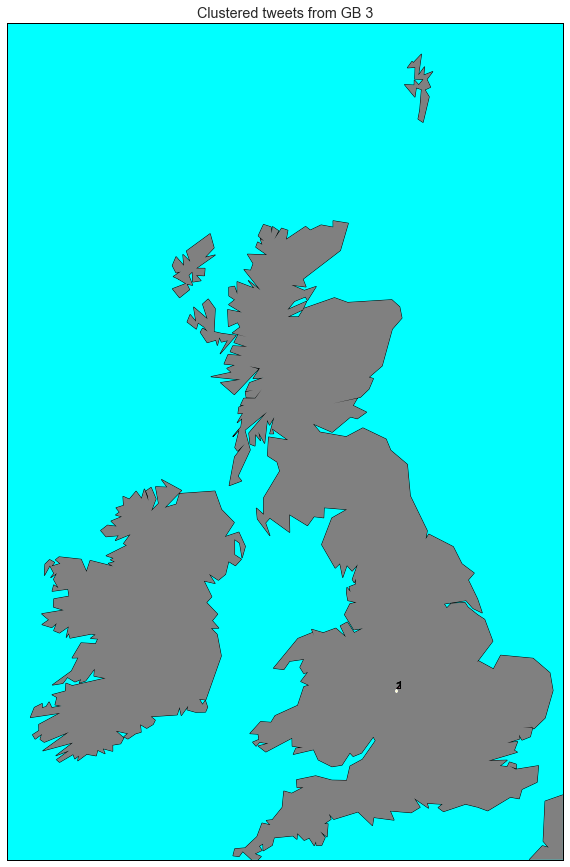

Making the Map took: 1.064018964767456
Method 2 took: 0.0007510185241699219
[-1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0 -1  0 -1  0  0]
start calculating
There were 9 out of 19 Tweets that were clustered as noise
This is 47.3684210526%.


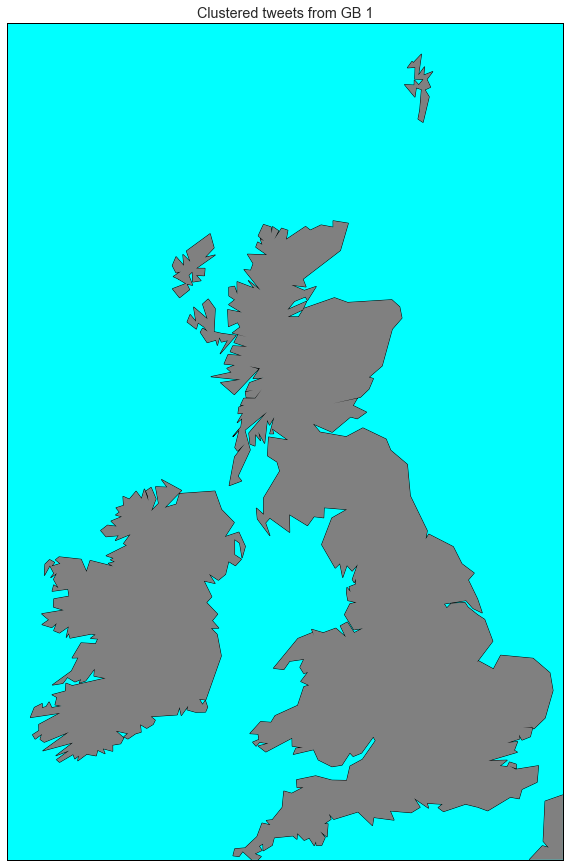

Making the Map took: 1.0602219104766846
Method 2 took: 0.0011191368103027344
[-1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1  0  0  0 -1 -1 -1]
start calculating
There were 19 out of 25 Tweets that were clustered as noise
This is 76.0%.


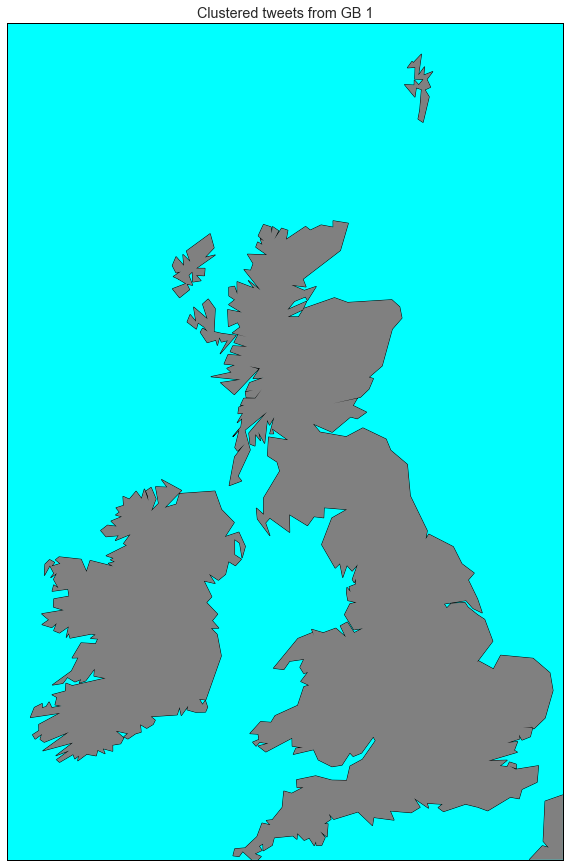

Making the Map took: 1.1211659908294678
Method 2 took: 0.00086212158203125
[ 0  0 -1  0  0  0  0  0]
start calculating
There were 1 out of 8 Tweets that were clustered as noise
This is 12.5%.


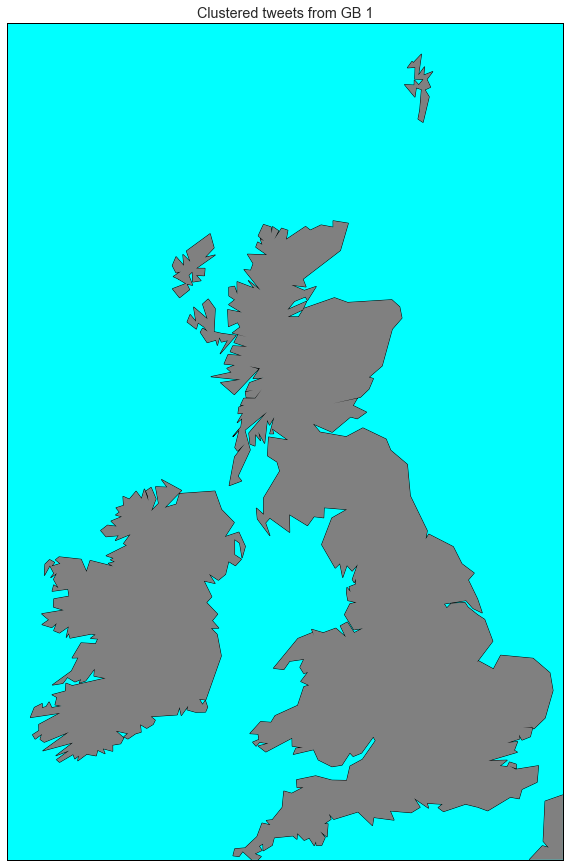

Making the Map took: 1.0243709087371826
Method 2 took: 0.0020639896392822266
[-1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  0]
start calculating
1. Cluster, with 5 tweets, 4 distinct users, the most freq. words are:
This cluster is From: 2016-07-07T08:01:38.000000000 To 2016-07-07T10:53:10.000000000
[('#essex', 3), ('factor', 2), ('#southend', 2), ('sites', 2), ('echo', 2), ('risk', 2), ('southend', 2), ('close', 2), ('burnham', 1), ('latest', 1), ('stay', 1), ('#maldon', 1), ('#leigh', 1), ('campaign', 1), ('centre', 1)]
 ------------- 
 
There were 19 out of 24 Tweets that were clustered as noise
This is 79.1666666667%.


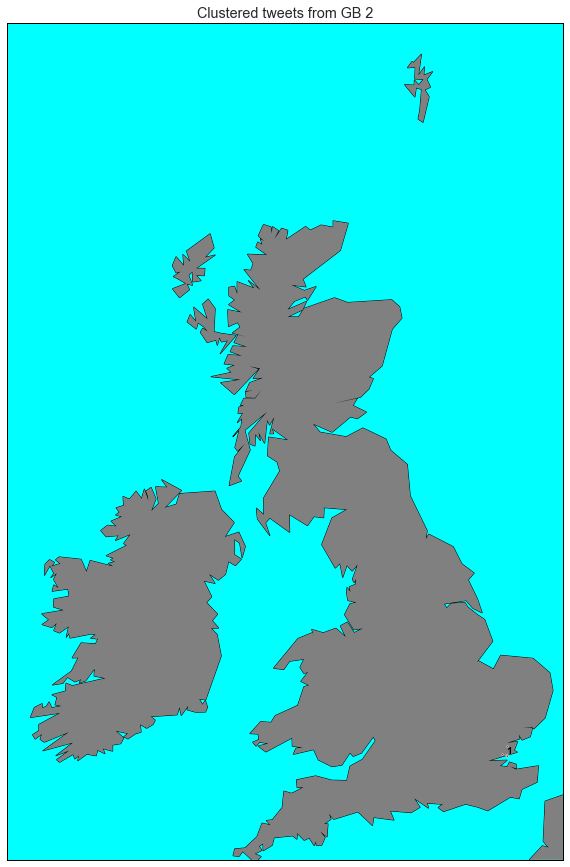

Making the Map took: 1.1078481674194336
Method 2 took: 0.0006821155548095703
[-1  0 -1 -1  0  0  0 -1  0  0  0  0]
start calculating
There were 4 out of 12 Tweets that were clustered as noise
This is 33.3333333333%.


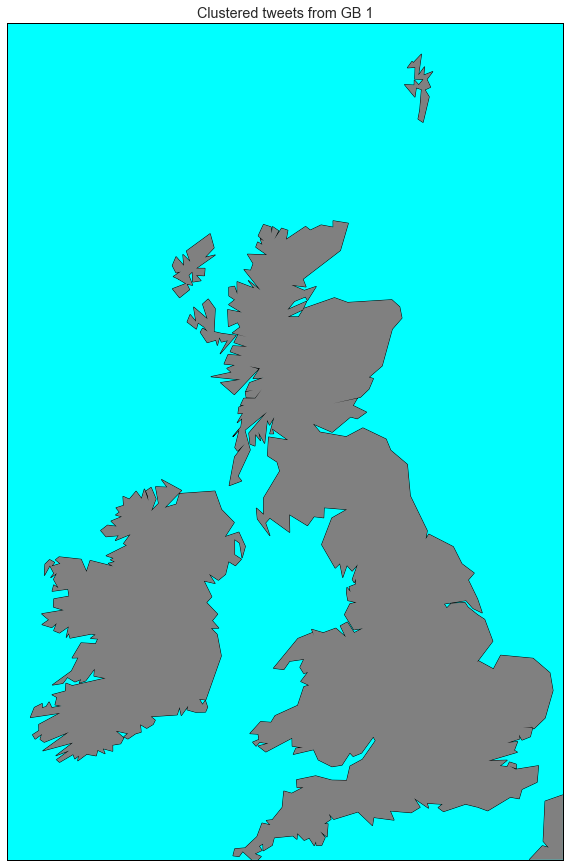

Making the Map took: 1.0890560150146484
Method 2 took: 0.0011091232299804688
[-1 -1 -1  0 -1  0 -1 -1  0  0  0 -1  0 -1 -1 -1 -1]
start calculating
There were 11 out of 17 Tweets that were clustered as noise
This is 64.7058823529%.


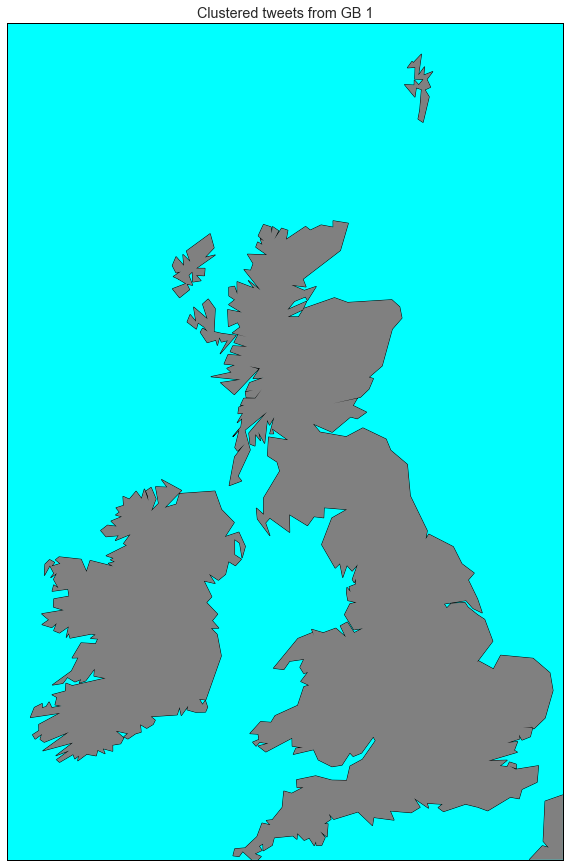

Making the Map took: 1.0580599308013916
Method 2 took: 0.0006868839263916016
[ 0 -1  0 -1 -1  0  0  0 -1]
start calculating
1. Cluster, with 5 tweets, 3 distinct users, the most freq. words are:
This cluster is From: 2016-07-07T07:58:03.000000000 To 2016-07-07T11:02:44.000000000
[('#reading', 5), ('#hiring', 5), ('#job', 4), ('#careerarc', 4), ('latest', 2), ('apply', 2), ('#businessmgmt', 2), ('click', 2), ('#sales', 2), ('work', 2), ("you're", 1), ('resource', 1), ('enterprise', 1), ('#finance', 1), ('planning', 1)]
 ------------- 
 
There were 4 out of 9 Tweets that were clustered as noise
This is 44.4444444444%.


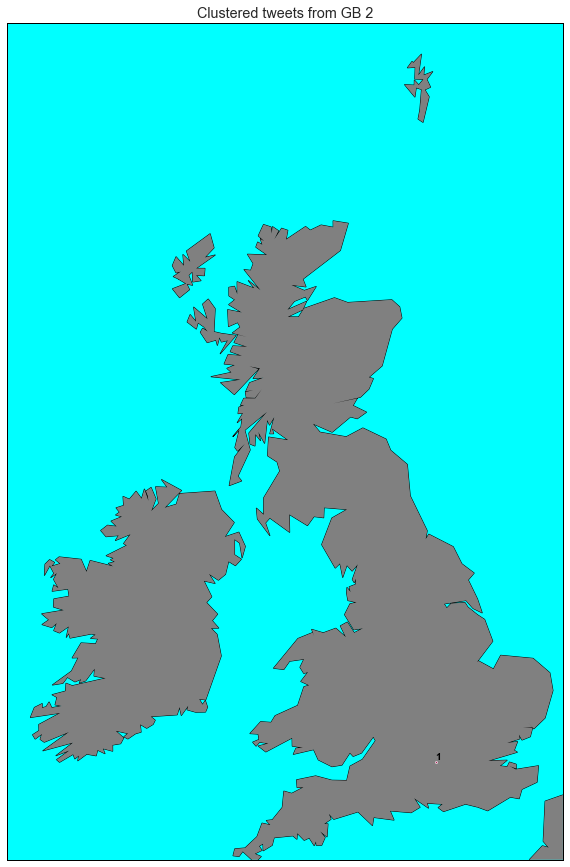

Making the Map took: 1.0386288166046143
There were 377 Tweets that were clustered as noise
Begin Analysis for next day
9 day Clustered. The passed time is: 0.011878013610839844
labelsMethod2_loc: 1500
start calculating
Method 2 took: 0.006587028503417969
[-1 -1 -1  0  1  1  1  1  1  1 -1  2  1 -1 -1 -1  1  1 -1  1  2 -1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  0  1
  1  1  1  1  1  1 -1  2  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1  0 -1
  1 -1  1  1  1  1 -1  1 -1  2  1  1  0  1  1  1  1  1 -1  1  1  2 -1  1 -1
  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1  0  1  1  1 -1  0  1
  1  1 -1  1  1  1  1  1 -1  1 -1 -1  3  1 -1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1  2  1 -1 -1  1  1  1 -1  1  1
  1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  0  1  1  1  1  1 -1 -1  1  3  1 -1  0  1  1  1 -1  1 -1  1  1
  1  1  1  1 -1  1  3  1 -1  1  1  1  1  1  1  1  1  1  1  1 

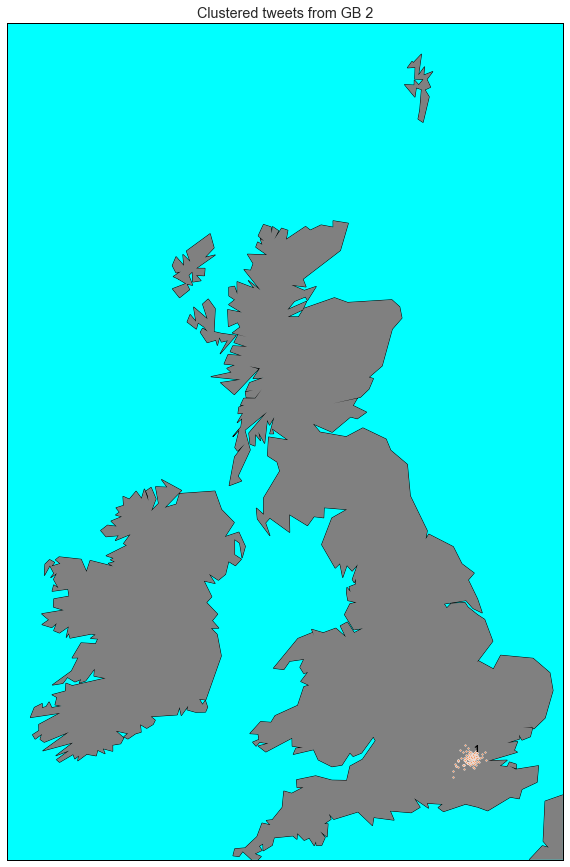

Making the Map took: 1.0907819271087646
Method 2 took: 0.0012400150299072266
[-1  0 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1]
start calculating
1. Cluster, with 5 tweets, 4 distinct users, the most freq. words are:
This cluster is From: 2016-07-09T13:17:44.000000000 To 2016-07-09T20:18:33.000000000
[('drinking', 5), ('chocolate', 2), ('life', 1), ('sloth', 1), ('much', 1), ('bryghus', 1), ('pancakes', 1), ('aged', 1), ('stout', 1), ('great', 1), ('times', 1), ('sinner', 1), ('amager', 1), ('even', 1), ('love', 1)]
 ------------- 
 
There were 42 out of 47 Tweets that were clustered as noise
This is 89.3617021277%.


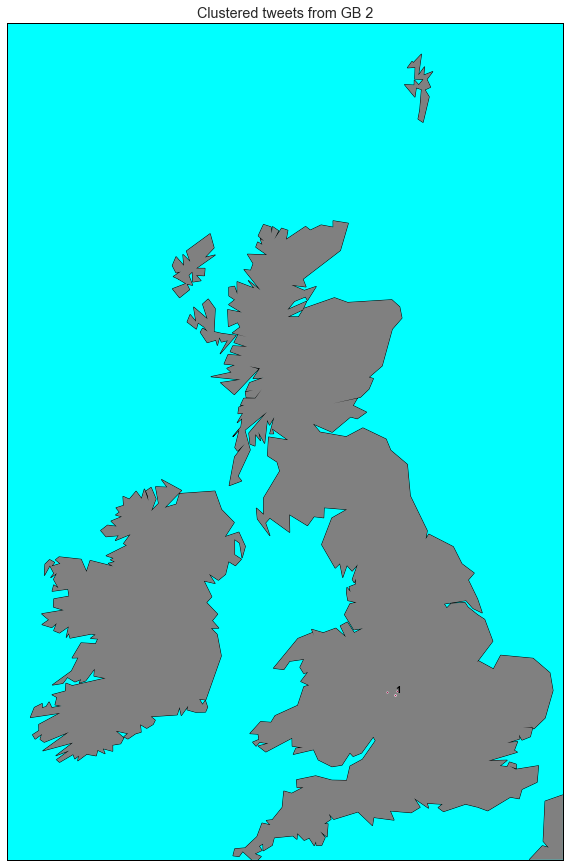

Making the Map took: 1.035696029663086
Method 2 took: 0.0014879703521728516
[-1  0  0 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0  0  1  0  0  1 -1 -1 -1 -1 -1
  0  1 -1 -1 -1 -1  1  1 -1  1 -1 -1  0 -1  0  0  0  0 -1  0 -1  1 -1 -1 -1
 -1  1 -1  0 -1  1  0 -1 -1  1 -1  0 -1 -1 -1 -1  1 -1]
start calculating
1. Cluster, with 19 tweets, 18 distinct users, the most freq. words are:
This cluster is From: 2016-07-09T09:48:23.000000000 To 2016-07-09T21:18:54.000000000
[('dublin', 9), ('#dublin', 8), ('#ireland', 6), ('ireland', 4), ('#lovedublin', 3), ('#friends', 2), ('#wanderlust', 2), ('trinity', 2), ('college', 2), ('city', 2), ('#travel…', 2), ('#green', 2), ('life', 1), ('morning', 1), ('#styes', 1)]
 ------------- 
 
2. Cluster, with 11 tweets, 11 distinct users, the most freq. words are:
This cluster is From: 2016-07-09T19:38:47.000000000 To 2016-07-09T23:20:54.000000000
[('park', 6), ('croke', 3), ('marlay', 3), ('tonight', 2), ('#bey', 2), ('beyoncé', 2), ('#crokepark', 2), ('formation', 

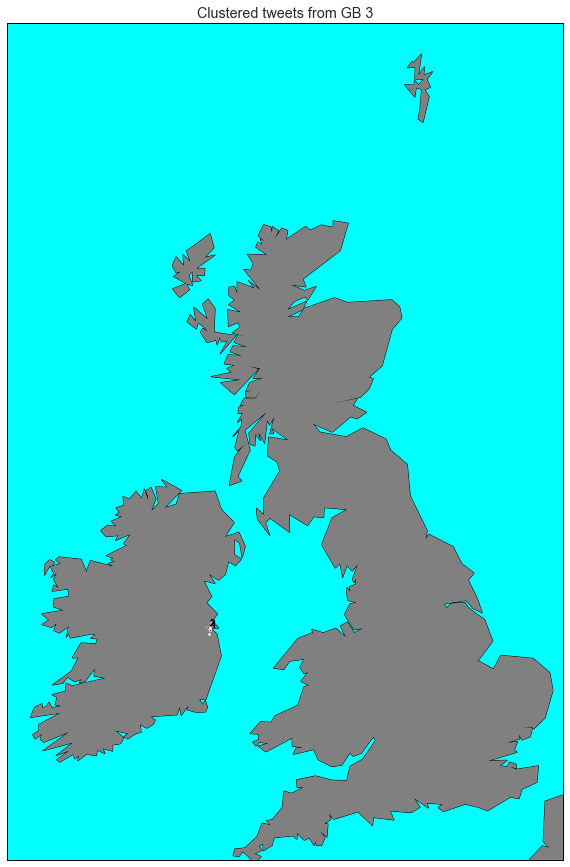

Making the Map took: 1.0459458827972412
Method 2 took: 0.0015268325805664062
[-1 -1 -1  0 -1 -1 -1 -1 -1  0  0 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1  0 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0
 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1]
start calculating
1. Cluster, with 15 tweets, 14 distinct users, the most freq. words are:
This cluster is From: 2016-07-09T13:00:49.000000000 To 2016-07-09T22:51:23.000000000
[('manchester', 10), ('beer', 7), ('drinking', 4), ('#photo', 3), ('festival', 3), ('chorlton', 3), ('tasting', 2), ('brunch', 2), ('moose', 2), ('time', 2), ('first', 2), ('afternoon', 2), ('sample', 2), ('good', 2), ('colour', 1)]
 ------------- 
 
There were 55 out of 70 Tweets that were clustered as noise
This is 78.5714285714%.


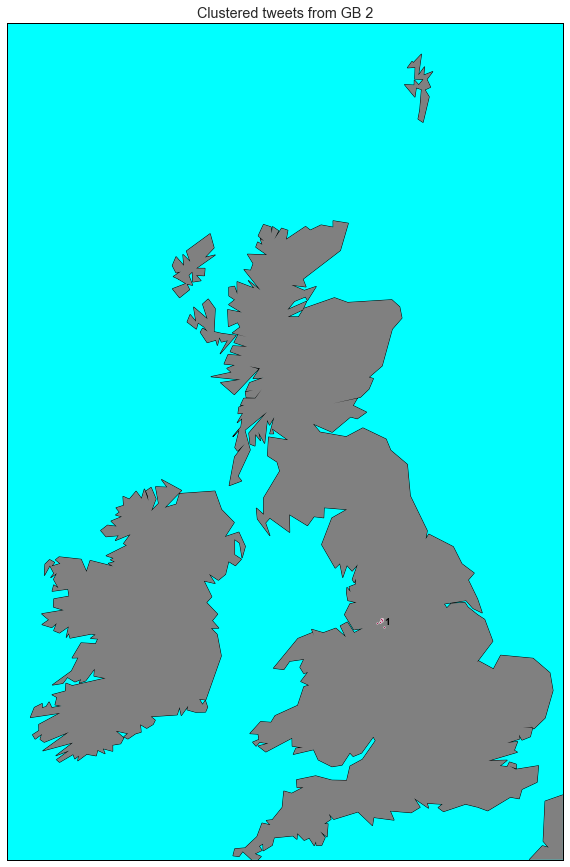

Making the Map took: 1.9563801288604736
Method 2 took: 0.0008280277252197266
[-1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0  0 -1  0 -1]
start calculating
1. Cluster, with 6 tweets, 6 distinct users, the most freq. words are:
This cluster is From: 2016-07-09T11:52:47.000000000 To 2016-07-09T15:40:06.000000000
[('cardiff', 8), ('stadium', 3), ('hall', 2), ('food', 2), ('festival', 2), ('international', 2), ('city', 2), ('sports', 1), ('could', 1), ('principality', 1), ('atop', 1), ('leckwith', 1), ('full', 1), ('tesco', 1), ('aquabus', 1)]
 ------------- 
 
There were 18 out of 24 Tweets that were clustered as noise
This is 75.0%.


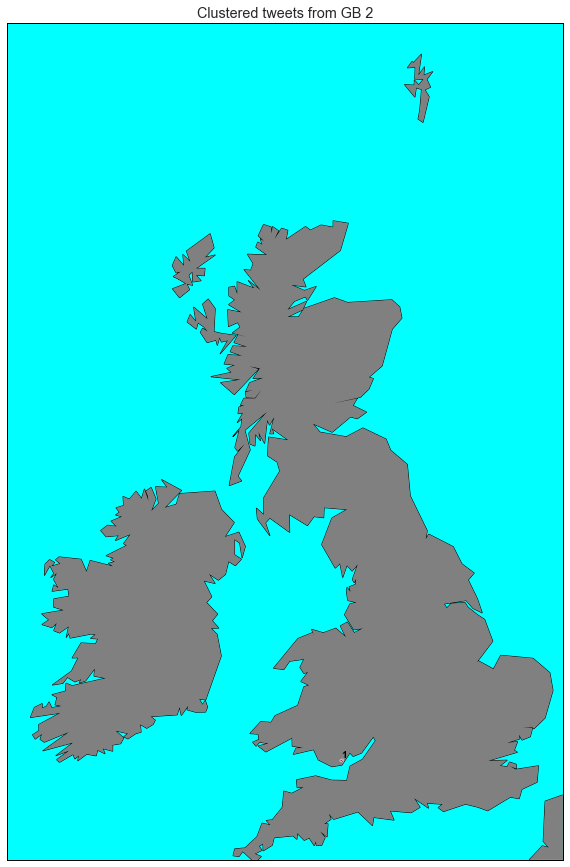

Making the Map took: 1.149735927581787
Method 2 took: 0.001065969467163086
[ 0  0  0  0 -1  0  0  0]
start calculating
1. Cluster, with 7 tweets, 7 distinct users, the most freq. words are:
This cluster is From: 2016-07-09T12:26:34.000000000 To 2016-07-09T20:32:19.000000000
[('park', 8), ('castle', 3), ('strathallan', 3), ('tent', 2), ('#alessiacara', 1), ('#tinthepark', 1), ('hello', 1), ('#titp', 1), ('obligatory', 1), ('biggest', 1), ('edinburgh', 1), ('selfie', 1), ('scotland', 1), ('stage', 1), ('main', 1)]
 ------------- 
 
There were 1 out of 8 Tweets that were clustered as noise
This is 12.5%.


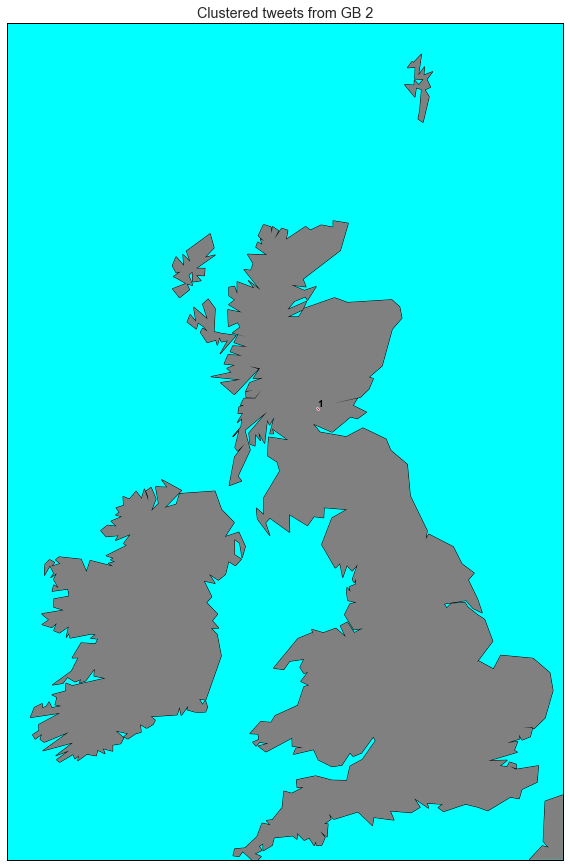

Making the Map took: 1.1467459201812744
Method 2 took: 0.0010859966278076172
[ 0 -1 -1 -1 -1  0 -1 -1  0  0  0 -1 -1 -1 -1  0 -1 -1 -1 -1]
start calculating
1. Cluster, with 6 tweets, 5 distinct users, the most freq. words are:
This cluster is From: 2016-07-09T12:04:23.000000000 To 2016-07-09T19:48:44.000000000
[('bristol', 10), ('pride', 3), ('city', 3), ('cis-tem', 1), ('brew', 1), ('destroy', 1), ('pre-cinema', 1), ('cinema', 1), ('showcase', 1), ('today', 1), ('punks', 1), ('trans', 1)]
 ------------- 
 
There were 14 out of 20 Tweets that were clustered as noise
This is 70.0%.


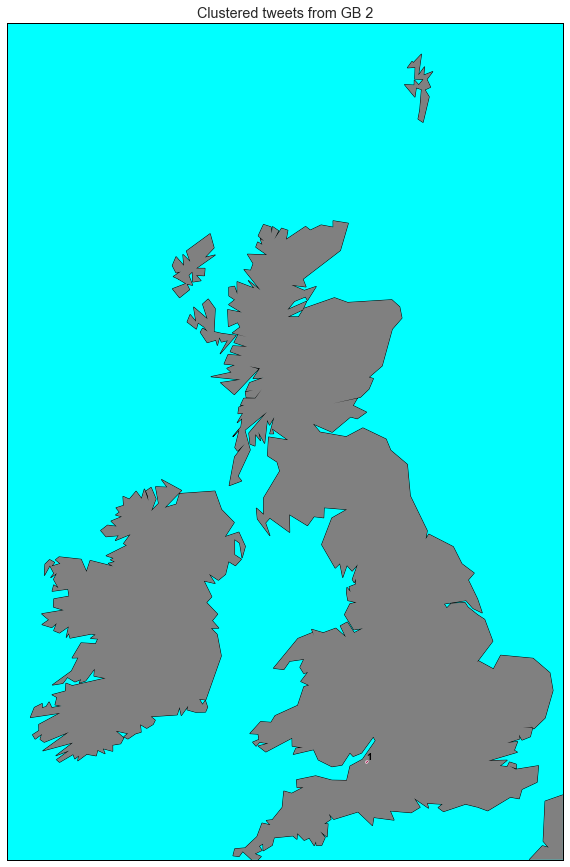

Making the Map took: 1.1295900344848633
Method 2 took: 0.0006711483001708984
[ 0  0 -1  0 -1  0 -1 -1  0 -1  0  0  0]
start calculating
There were 5 out of 13 Tweets that were clustered as noise
This is 38.4615384615%.


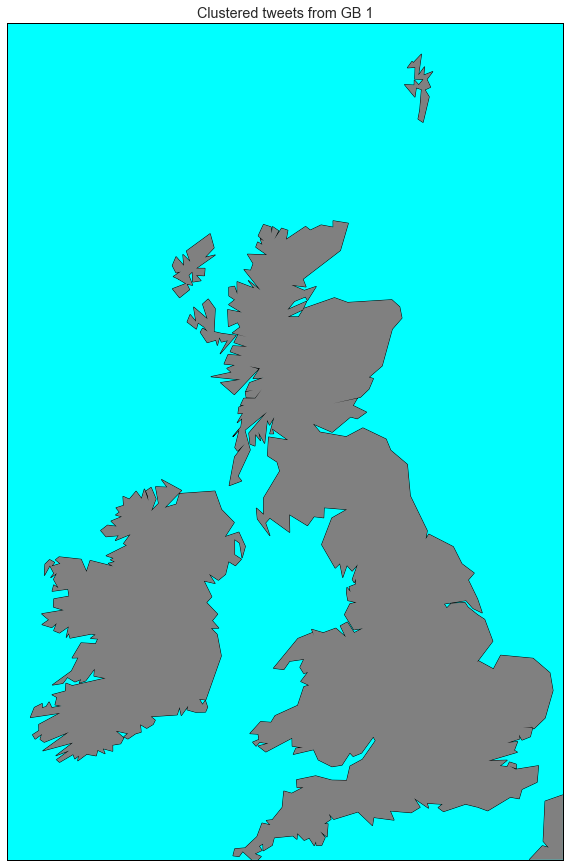

Making the Map took: 1.0438141822814941
Method 2 took: 0.0007898807525634766
[-1  0  0  0  0  0 -1  0  0  0 -1 -1  0  0  0  0 -1 -1 -1  0  0 -1  0 -1 -1]
start calculating
1. Cluster, with 15 tweets, 12 distinct users, the most freq. words are:
This cluster is From: 2016-07-09T09:48:17.000000000 To 2016-07-09T21:26:00.000000000
[('silverstone', 9), ('#britishgp', 7), ('grand', 5), ('#silverstone', 4), ('prix', 4), ('great', 3), ('british', 3), ('race', 3), ('racing', 3), ('#teamlh', 3), ('formula', 3), ('straight', 2), ('international', 2), ('morning', 1), ('guys', 1)]
 ------------- 
 
There were 10 out of 25 Tweets that were clustered as noise
This is 40.0%.


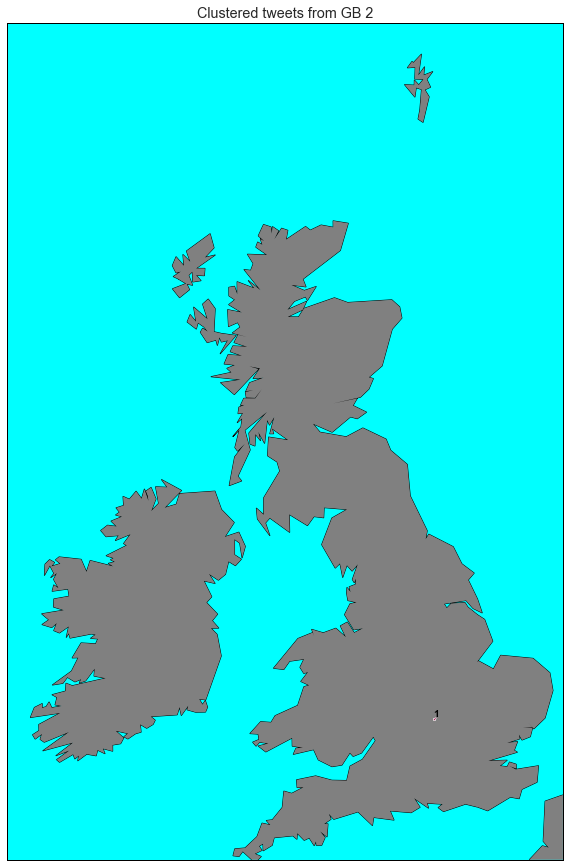

Making the Map took: 1.10856294631958
There were 443 Tweets that were clustered as noise
Begin Analysis for next day
10 day Clustered. The passed time is: 0.012069940567016602
labelsMethod2_loc: 1500
start calculating
Method 2 took: 0.007181882858276367
[ 0  1  1  1  1 -1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  0
  1  1  1  1 -1  1  1  1  2  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1  1
  1  1  1  3 -1 -1  1  1  1  1 -1  1  1  0  1  1  1  1  1 -1  1  1 -1  1 -1
 -1 -1  1 -1  1  1  1  1 -1  1  1  1  4  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  2 -1 -1  1  1 -1  0 -1 -1  1  1  1  1  3  1  1 -1 -1 -1  1  1 -1
  1  1 -1  1  1  1 -1  1 -1  1  4  1 -1 -1  1  1  1  1  1  0  1  3  3  1  1
 -1  1  4 -1  1  1  1  1  4 -1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1
  0  1  5  2  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  5  1  1 -1
  1  1 -1 -1 -1  1  1  3  1  0  1  1  1 -1  1  1  1  1  1  1 -1  1  2  1  1
 -1  1  1  1  1  0  1  1  1  0 -1  0  0  1  1  1  1 -1  1  2  

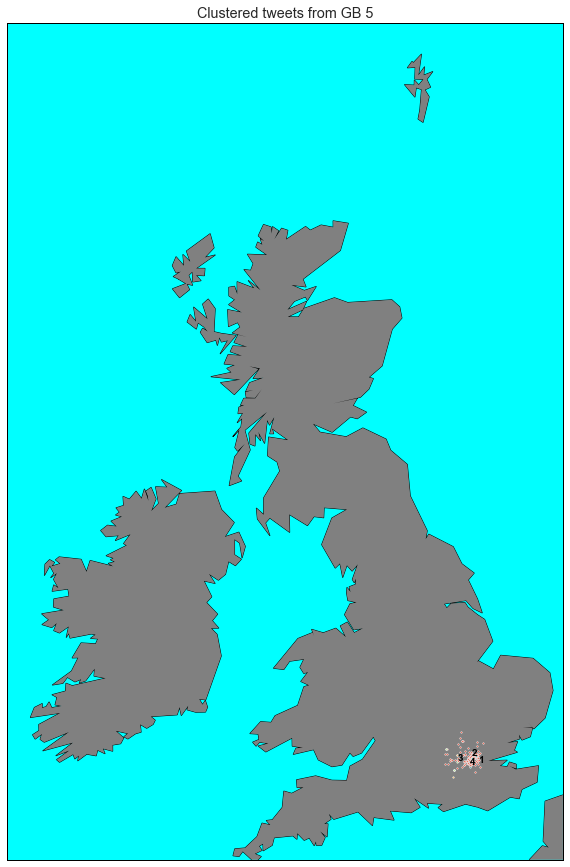

Making the Map took: 1.1562130451202393
Method 2 took: 0.001987934112548828
[-1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1  0  0 -1 -1  0 -1 -1]
start calculating
1. Cluster, with 7 tweets, 6 distinct users, the most freq. words are:
This cluster is From: 2016-07-10T10:15:48.000000000 To 2016-07-10T22:26:06.000000000
[('birmingham', 7), ('kingdom', 5), ('posted', 5), ('united', 5), ('photo', 4), ('square', 1), ('trinity', 1), ('one👭love', 1), ('university', 1), ('video', 1), ('lower', 1), ('great', 1), ('days', 1), ('till', 1), ('victoria', 1)]
 ------------- 
 
There were 30 out of 37 Tweets that were clustered as noise
This is 81.0810810811%.


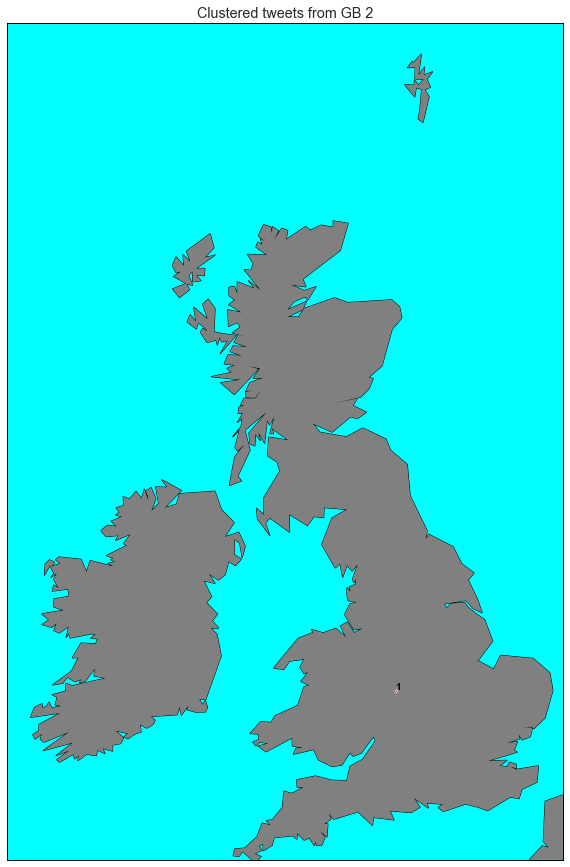

Making the Map took: 1.0596160888671875
Method 2 took: 0.0010640621185302734
[-1 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1  0 -1  0 -1 -1
 -1 -1 -1 -1 -1  0 -1  0 -1  0  0 -1 -1]
start calculating
1. Cluster, with 12 tweets, 12 distinct users, the most freq. words are:
This cluster is From: 2016-07-10T10:36:46.000000000 To 2016-07-10T20:46:33.000000000
[('manchester', 10), ('castlefield', 6), ('bowl', 5), ('arndale', 2), ('gallery', 2), ('last', 2), ('posted', 2), ('greater', 2), ('photo', 2), ('week', 1), ('shadow', 1), ('honda', 1), ('vintique', 1), ('united', 1), ('baes', 1)]
 ------------- 
 
There were 26 out of 38 Tweets that were clustered as noise
This is 68.4210526316%.


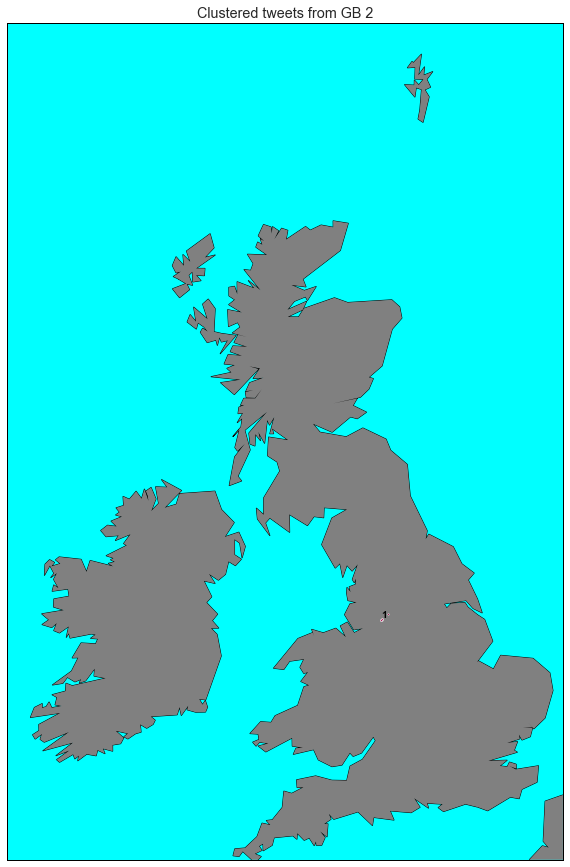

Making the Map took: 1.0014657974243164
Method 2 took: 0.0006639957427978516
[-1  0 -1  0  0 -1 -1  0  0]
start calculating
There were 4 out of 9 Tweets that were clustered as noise
This is 44.4444444444%.


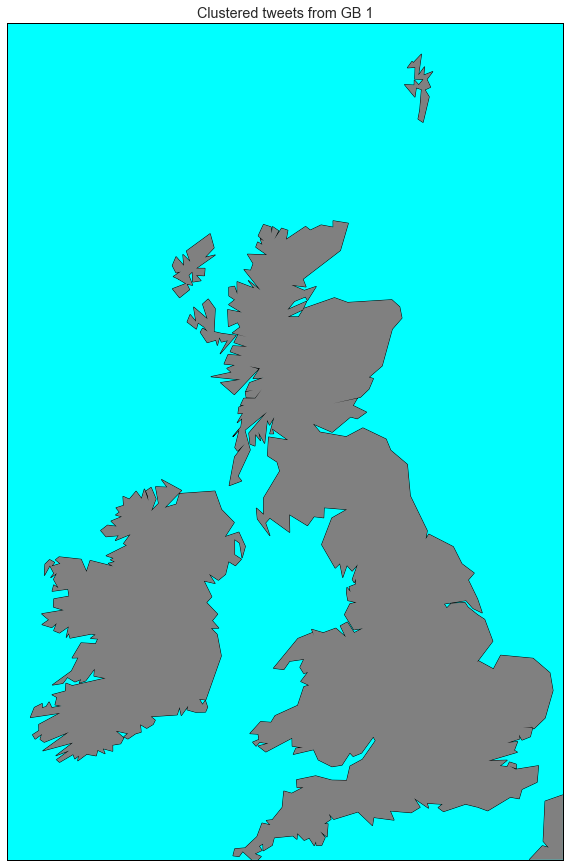

Making the Map took: 0.9855189323425293
Method 2 took: 0.0008828639984130859
[ 0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
start calculating
1. Cluster, with 23 tweets, 21 distinct users, the most freq. words are:
This cluster is From: 2016-07-10T09:24:01.000000000 To 2016-07-10T21:46:02.000000000
[('silverstone', 8), ('#silverstone', 7), ('prix', 7), ('british', 7), ('grand', 7), ('#lewishamilton', 4), ('international', 3), ('#britishgp', 3), ('#britishgrandprix', 3), ('great', 3), ('race', 3), ('straight', 3), ('#formula1', 2), ('#raceday', 2), ('#britishgrandprix2016', 2)]
 ------------- 
 
There were 2 out of 25 Tweets that were clustered as noise
This is 8.0%.


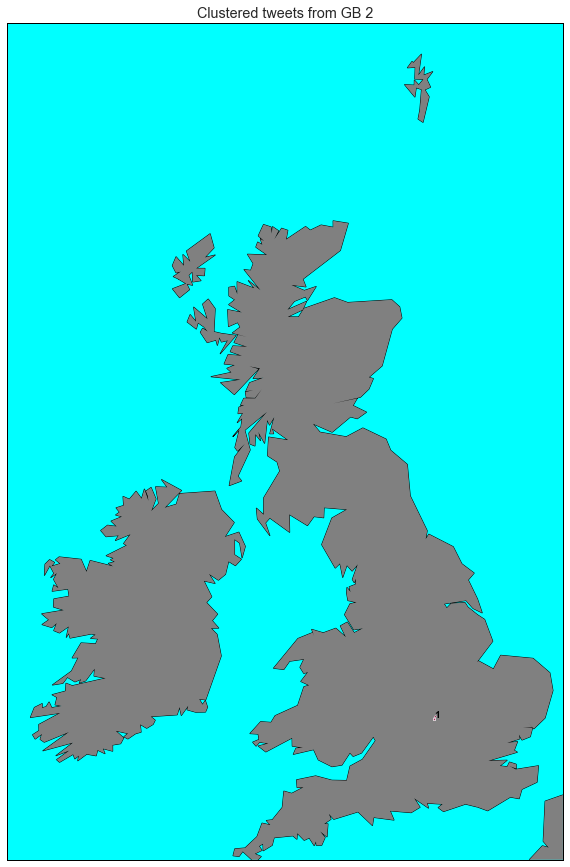

Making the Map took: 0.9896371364593506
Method 2 took: 0.0008389949798583984
[ 0  0  0  0 -1  0  0  0 -1]
start calculating
There were 2 out of 9 Tweets that were clustered as noise
This is 22.2222222222%.


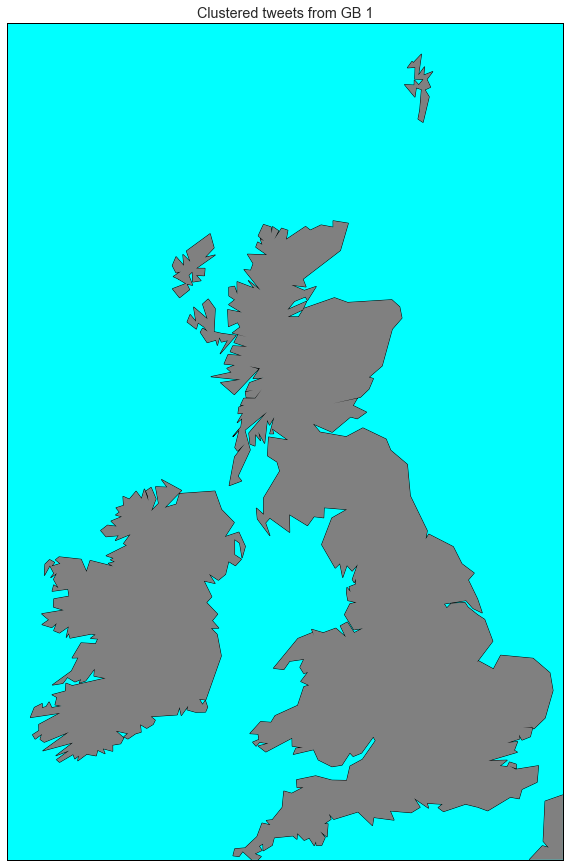

Making the Map took: 1.0338249206542969
Method 2 took: 0.0014920234680175781
[-1  0  0 -1  0  0  1  0 -1  1  0  0  1  0 -1 -1  0  1 -1 -1 -1  0 -1 -1 -1
  0 -1  0 -1  1 -1 -1  0 -1  0  0 -1 -1 -1  1  0 -1 -1  0  0  0  0 -1 -1]
start calculating
1. Cluster, with 20 tweets, 20 distinct users, the most freq. words are:
This cluster is From: 2016-07-10T08:31:27.000000000 To 2016-07-10T22:14:06.000000000
[('dublin', 9), ('#dublin', 6), ('ireland', 5), ('park', 4), ('#ireland', 4), ('posted', 3), ('photo', 3), ('church', 3), ('world', 2), ('croke', 2), ('beyonce', 2), ('tour', 2), ('city', 2), ('#travel', 2), ('formation', 2)]
 ------------- 
 
2. Cluster, with 6 tweets, 4 distinct users, the most freq. words are:
This cluster is From: 2016-07-10T20:36:25.000000000 To 2016-07-10T22:34:44.000000000
[('gignac', 2), ('france', 2), ('#frapor', 2), ('#fra', 2), ('guillotine', 1), ('pogba', 1), ('coming', 1), ('shower', 1), ('look', 1), ('#ronaldo', 1), ('bringing', 1), ('though', 1), ('joke', 1),

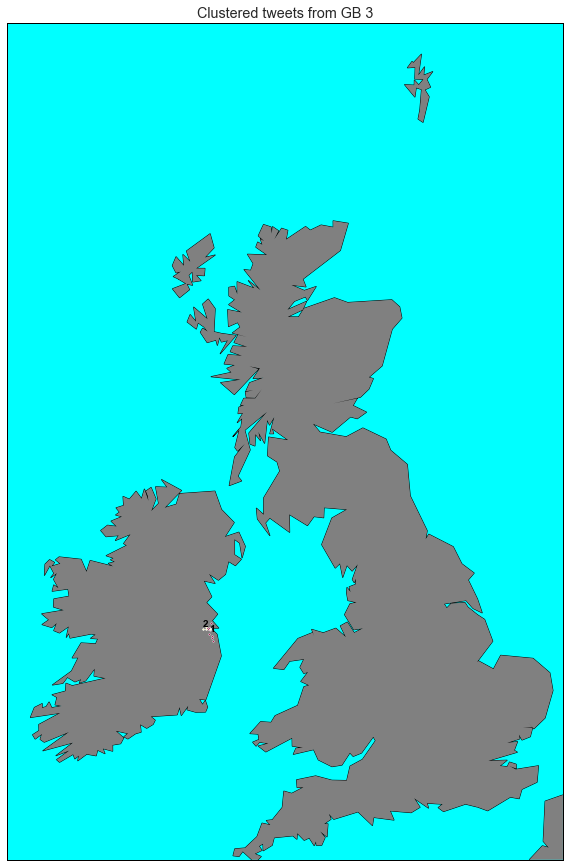

Making the Map took: 1.0391550064086914
Method 2 took: 0.0007159709930419922
[-1  0  0  0 -1  0 -1  0 -1 -1 -1  0  0 -1]
start calculating
There were 7 out of 14 Tweets that were clustered as noise
This is 50.0%.


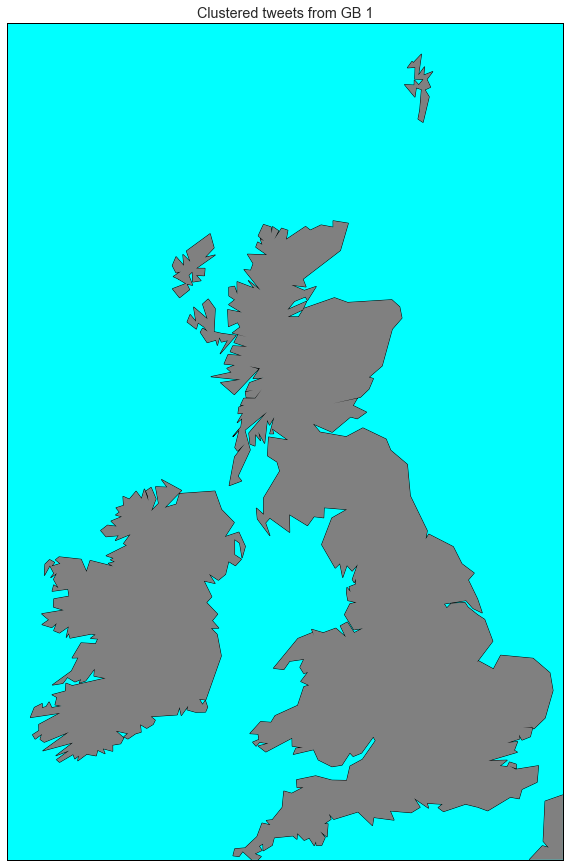

Making the Map took: 1.026427984237671
Method 2 took: 0.0007841587066650391
[ 0  0  0  0 -1  0  0  0  0 -1  0]
start calculating
1. Cluster, with 9 tweets, 8 distinct users, the most freq. words are:
This cluster is From: 2016-07-10T09:06:09.000000000 To 2016-07-10T21:54:23.000000000
[('park', 7), ('castle', 2), ('#titp', 2), ('strathallan', 2), ('titp', 1), ('#tinthepark', 1), ('⛺️🎤⛺️', 1), ('😝💃🏼🎶', 1), ('catfish', 1), ('#muchlove', 1), ('harris', 1), ('calvin', 1), ('best', 1), ('#sunset', 1), ('#vip…', 1)]
 ------------- 
 
There were 2 out of 11 Tweets that were clustered as noise
This is 18.1818181818%.


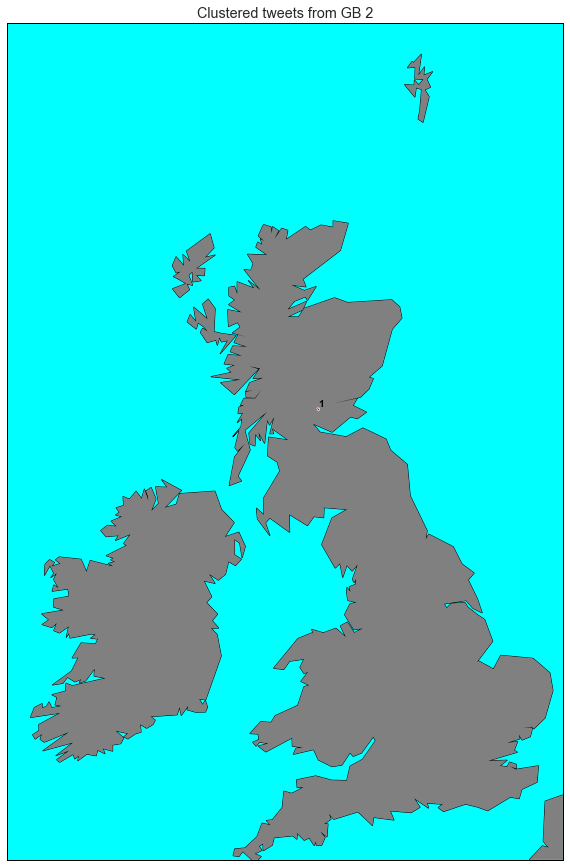

Making the Map took: 1.002875804901123
Method 2 took: 0.0007190704345703125
[-1  0 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1  0  0 -1 -1]
start calculating
1. Cluster, with 5 tweets, 3 distinct users, the most freq. words are:
This cluster is From: 2016-07-10T13:00:24.000000000 To 2016-07-10T17:52:34.000000000
[('tyne', 6), ('newcastle', 5), ('#ne1motorshow', 4), ('upon', 3), ('wear', 3), ('centre', 2), ('city', 2), ('street', 2), ('#bentley', 1), ('beer', 1), ('grainger', 1), ('grey', 1), ('#bmw', 1), ('&amp;', 1), ('craft', 1)]
 ------------- 
 
There were 13 out of 18 Tweets that were clustered as noise
This is 72.2222222222%.


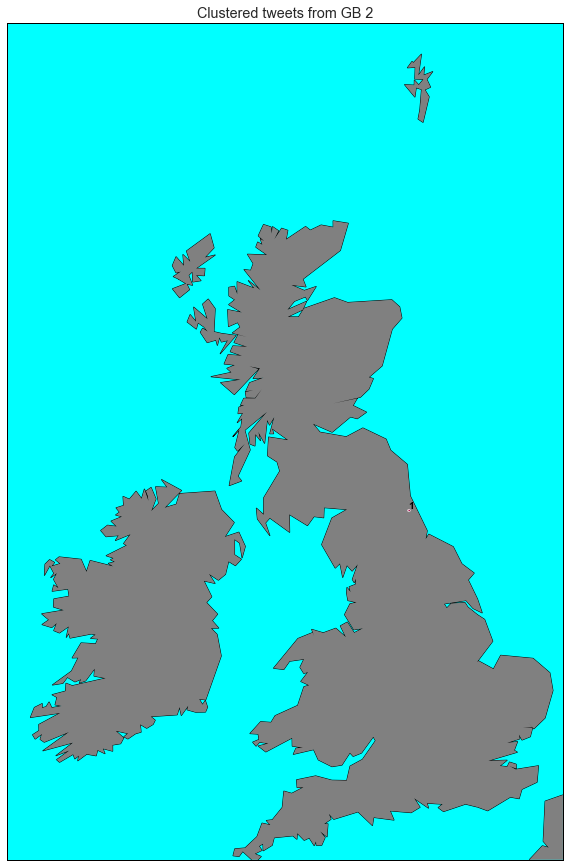

Making the Map took: 0.9803318977355957
Method 2 took: 0.0006458759307861328
[-1  0  0  0 -1  0  0]
start calculating
There were 2 out of 7 Tweets that were clustered as noise
This is 28.5714285714%.


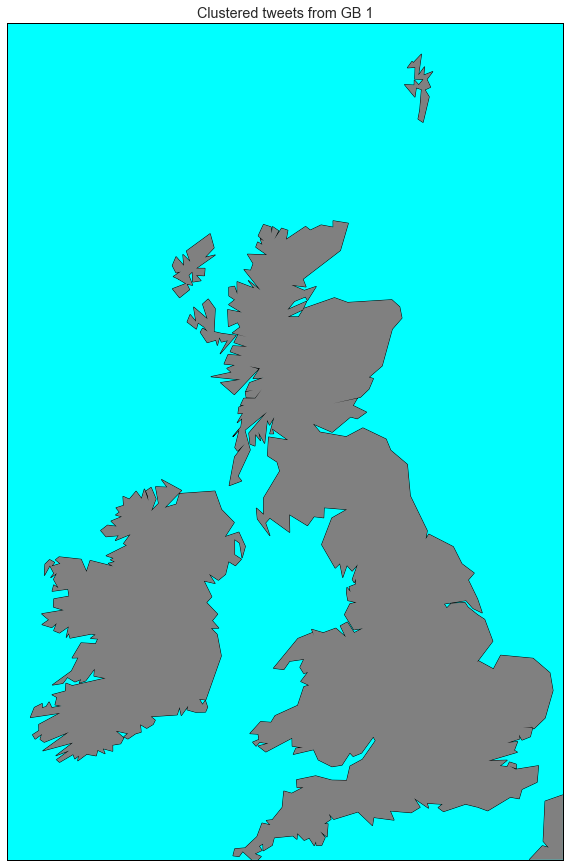

Making the Map took: 0.9703528881072998
There were 444 Tweets that were clustered as noise
Begin Analysis for next day
11 day Clustered. The passed time is: 0.011071920394897461
labelsMethod2_loc: 1500
start calculating
Method 2 took: 0.001026153564453125
[-1  0  1 -1 -1  0  1 -1 -1 -1 -1 -1  0  2 -1 -1 -1 -1 -1 -1  2  2 -1 -1  1
 -1  1  2  2  1 -1  0  1  1 -1 -1 -1 -1  2 -1  1 -1 -1  0 -1 -1  2 -1 -1  2
  1 -1 -1  1 -1 -1]
start calculating
1. Cluster, with 10 tweets, 9 distinct users, the most freq. words are:
This cluster is From: 2016-07-11T09:12:34.000000000 To 2016-07-11T11:09:16.000000000
[('manchester', 14), ('greater', 4), ('airport', 2), ('salford', 2), ('house', 2), ('pedro', 1), ('wait', 1), ('breakfast', 1), ('crazy', 1), ('stage', 1), ('travelodge', 1), ('parlour', 1), ('piccadilly', 1), ('hotel', 1), ('saturday', 1)]
 ------------- 
 
2. Cluster, with 8 tweets, 7 distinct users, the most freq. words are:
This cluster is From: 2016-07-11T09:02:38.000000000 To 2016-07-11T1

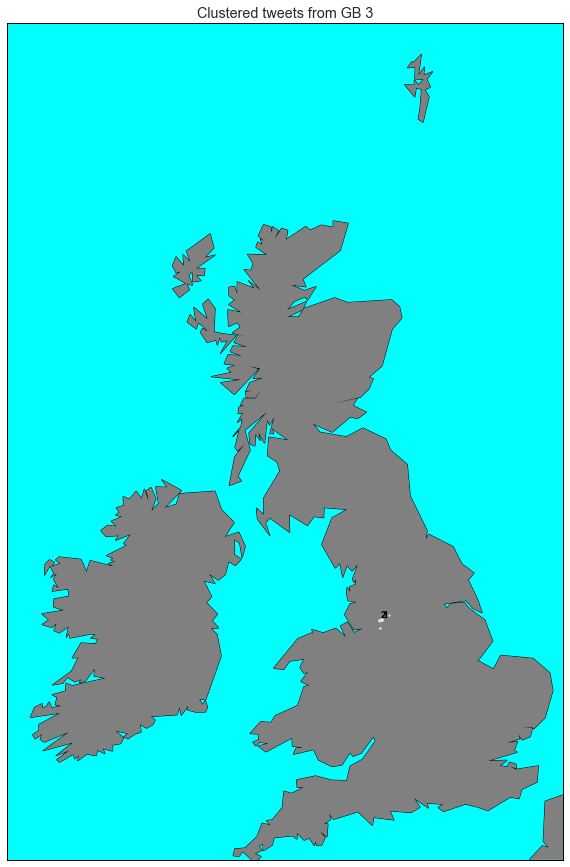

Making the Map took: 1.0126969814300537
Method 2 took: 0.008704900741577148
[-1  0  0  0 -1  0 -1  5  0 -1 -1  0  0  0 -1  7  0  0  0  0  0  0 -1  0  0
 -1  0  0  0  0  0  0 -1 -1  0  0 -1  1  0  0  0  0  0  0  0 -1  0  2  0  0
 -1  0  0  0  7  1  2  0 -1  0  0  0 -1  0  0  0  0  0  0 -1  0  7  0  0  0
  0  3  0  0  0 -1  0  0  5  0  0  0  0  0  0  0 -1  0  2  0 -1 -1  1 -1  3
 -1  0  0  0  0 -1  0  4  0  0 -1 -1  0  0  0  4 -1  0  0 -1  0  0 -1 -1 -1
 -1 -1  0  0 -1  0  0 -1  4  0  1  2  0  0 -1  0  1  0  1  1  0  0 -1  0 -1
  0 -1  0 -1 -1  0 -1 -1  0  0 -1 -1  0 -1  0  0  0  0  1  0  0  0  0  0  0
  0 -1 -1  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
 -1  0  0  0  0 -1 -1  0  0 -1 -1  0  0 -1 -1 -1  0  0 -1  0  0  0  0  0  0
  0  0 -1  0  0  4  0  1  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0 -1  0
  2  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0 -1  4  4  1  0  0  2
  0  0  0  0  0  0  5 -1 -1  0  0  0 -1  0  0 -1  0  6  0  0 -1  0  0  0 -1
  0 -1  0  0

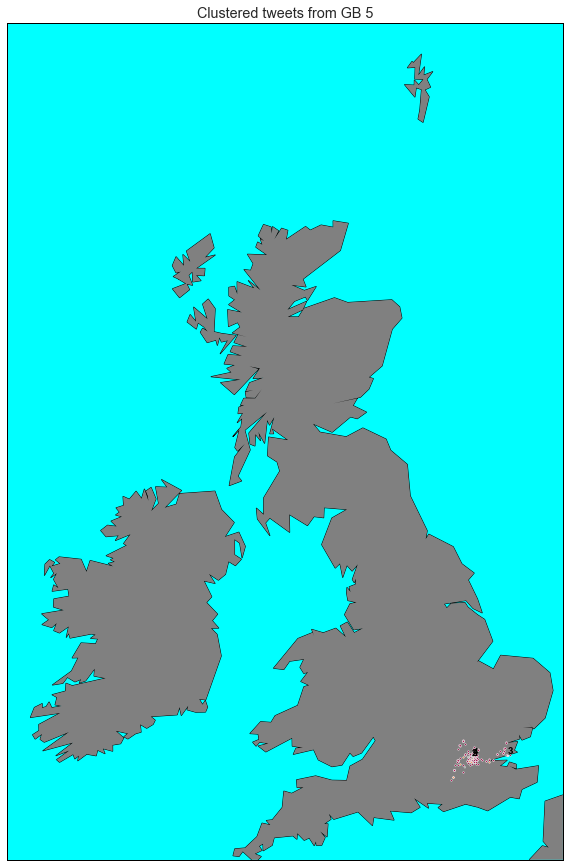

Making the Map took: 1.086298942565918
Method 2 took: 0.0009989738464355469
[-1 -1  0 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1  0 -1  0 -1  0 -1 -1  0 -1 -1
  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1  0  0 -1  0  0]
start calculating
1. Cluster, with 16 tweets, 7 distinct users, the most freq. words are:
This cluster is From: 2016-07-11T10:30:47.000000000 To 2016-07-11T10:31:20.000000000
[('images', 16), ('pukkaprintgifts', 11), ('7.99', 7), ('designs', 7), ('9.99', 7), ('graphic', 7), ('sweatshirts', 5), ('t-shirts', 5), ('polo', 5), ('hoodies', 5), ('cases', 5), ('phone/tablet', 5), ('canvas', 5), ('personalised', 5), ('mugs', 5)]
 ------------- 
 
There were 30 out of 46 Tweets that were clustered as noise
This is 65.2173913043%.


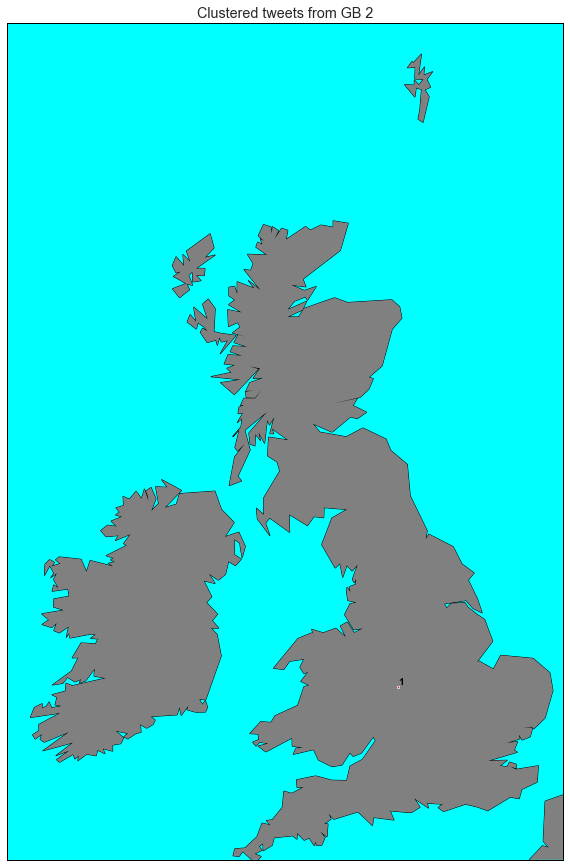

Making the Map took: 1.048205852508545
Method 2 took: 0.001332998275756836
[ 0  0 -1 -1  0  0  0  1  0  0  1  0 -1  0 -1 -1 -1 -1 -1  0  0  0  0 -1 -1
  0  0 -1  1 -1  0  0  0 -1  0  1 -1 -1  1]
start calculating
1. Cluster, with 19 tweets, 13 distinct users, the most freq. words are:
This cluster is From: 2016-07-11T09:03:27.000000000 To 2016-07-11T11:10:43.000000000
[('dublin', 15), ('#dublin', 10), ('road', 3), ('house', 3), ('north', 2), ('apartment', 2), ('sale', 2), ('airport', 2), ('#ireland', 2), ('circular', 2), ('hall', 1), ('#lucan', 1), ('150,000', 1), ('yet…', 1), ('cosmetix', 1)]
 ------------- 
 
2. Cluster, with 5 tweets, 5 distinct users, the most freq. words are:
This cluster is From: 2016-07-11T08:59:05.000000000 To 2016-07-11T10:52:09.000000000
[('&gt;', 4), ('#job', 3), ('#hiring', 3), ('dublin', 2), ('#careerarc', 2), ('#dublin', 2), ("we're", 2), ('read', 1), ('latest', 1), ("don't", 1), ('park', 1), ('store', 1), ('#southdublin', 1), ('engineer', 1), ('ring', 1)

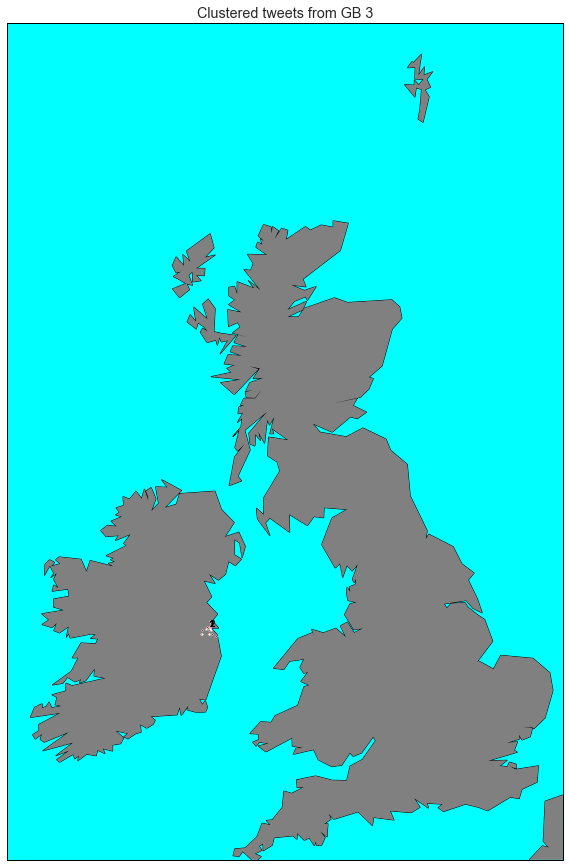

Making the Map took: 1.0347979068756104
Method 2 took: 0.0009701251983642578
[ 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
start calculating
There were 1 out of 20 Tweets that were clustered as noise
This is 5.0%.


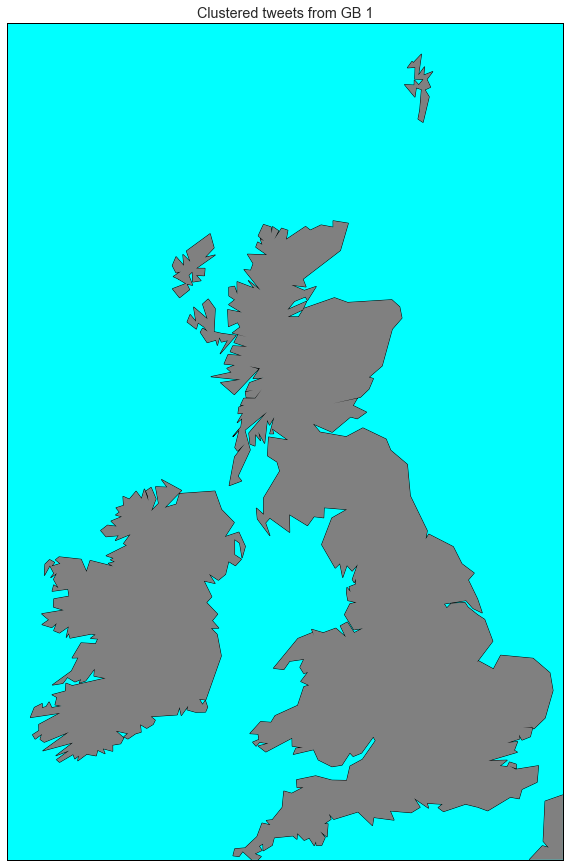

Making the Map took: 0.991826057434082
Method 2 took: 0.0007340908050537109
[ 0 -1 -1 -1  0  0  0  0 -1 -1]
start calculating
1. Cluster, with 5 tweets, 4 distinct users, the most freq. words are:
This cluster is From: 2016-07-11T09:15:50.000000000 To 2016-07-11T10:55:30.000000000
[('silverstone', 5), ('#britishgp', 4), ('#silverstone', 4), ('prix', 3), ('grand', 3), ('circuit', 2), ('racing', 2), ('grand…', 2), ('british', 2), ('formula', 2), ('#crew', 1), ('#gp2016', 1), ('#winner', 1), ('congrats', 1), ('#teamlh', 1)]
 ------------- 
 
There were 5 out of 10 Tweets that were clustered as noise
This is 50.0%.


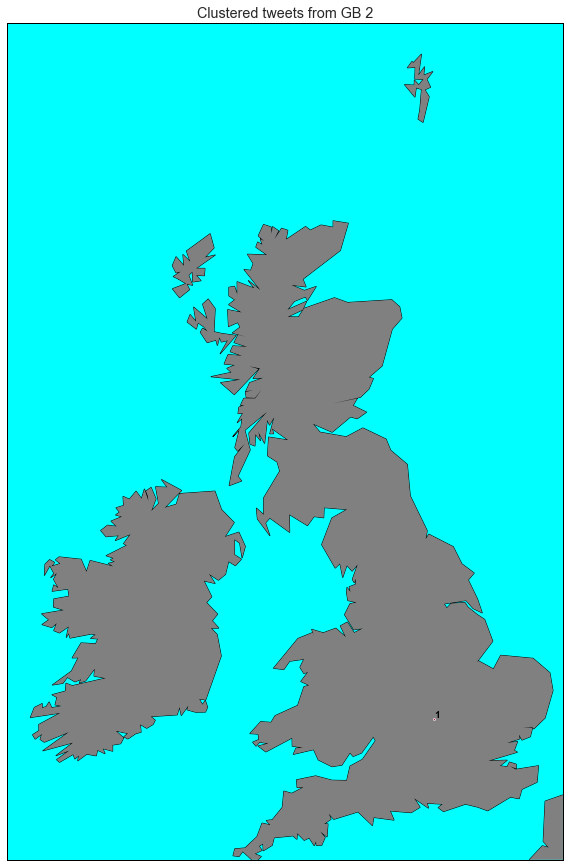

Making the Map took: 0.9820830821990967
Method 2 took: 0.0007829666137695312
[-1  0 -1 -1 -1  0 -1  0 -1 -1 -1  0  0  0 -1 -1  0  0  0 -1 -1]
start calculating
There were 12 out of 21 Tweets that were clustered as noise
This is 57.1428571429%.


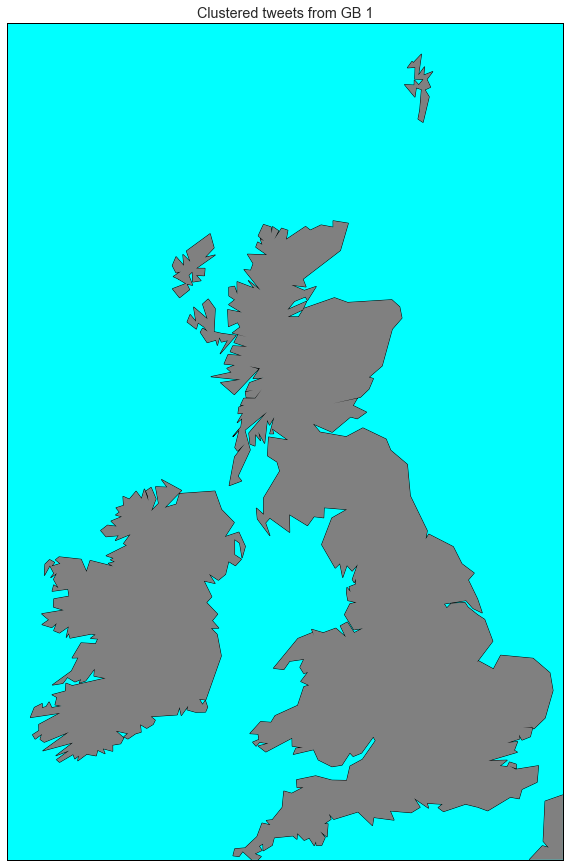

Making the Map took: 0.9839839935302734
Method 2 took: 0.0006489753723144531
[ 0  0  0  0  0 -1  0  0 -1 -1  0  0 -1]
start calculating
1. Cluster, with 9 tweets, 3 distinct users, the most freq. words are:
This cluster is From: 2016-07-11T09:00:36.000000000 To 2016-07-11T11:04:05.000000000
[('#essex', 7), ('romford', 2), ('#chelmsford', 2), ('london', 2), ('essex', 2), ('young', 1), ('seeking', 1), ('anywhere', 1), ('2,768', 1), ('play', 1), ('harlow', 1), ('18-25', 1), ('tailbacks', 1), ('mountain', 1), ('take', 1)]
 ------------- 
 
There were 4 out of 13 Tweets that were clustered as noise
This is 30.7692307692%.


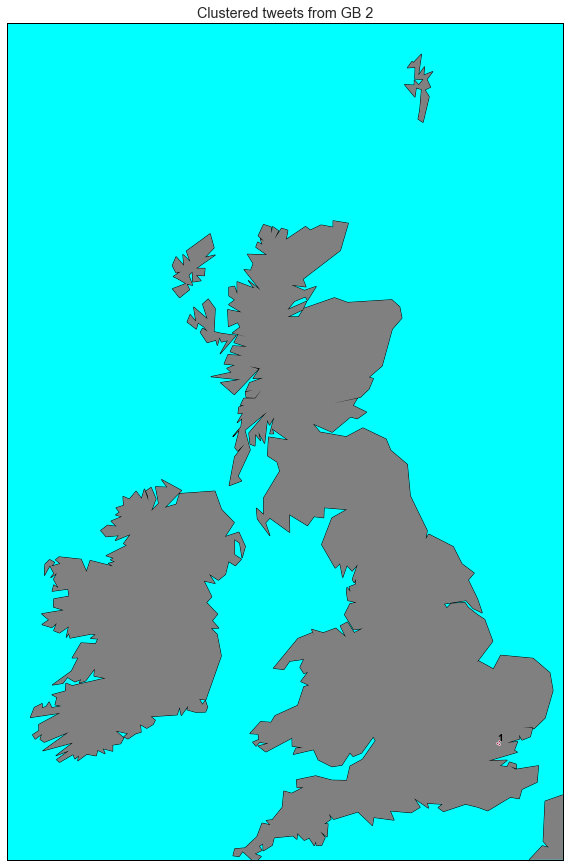

Making the Map took: 0.9795169830322266
Method 2 took: 0.0007491111755371094
[ 0  0  0  0  0  0 -1  0]
start calculating
There were 1 out of 8 Tweets that were clustered as noise
This is 12.5%.


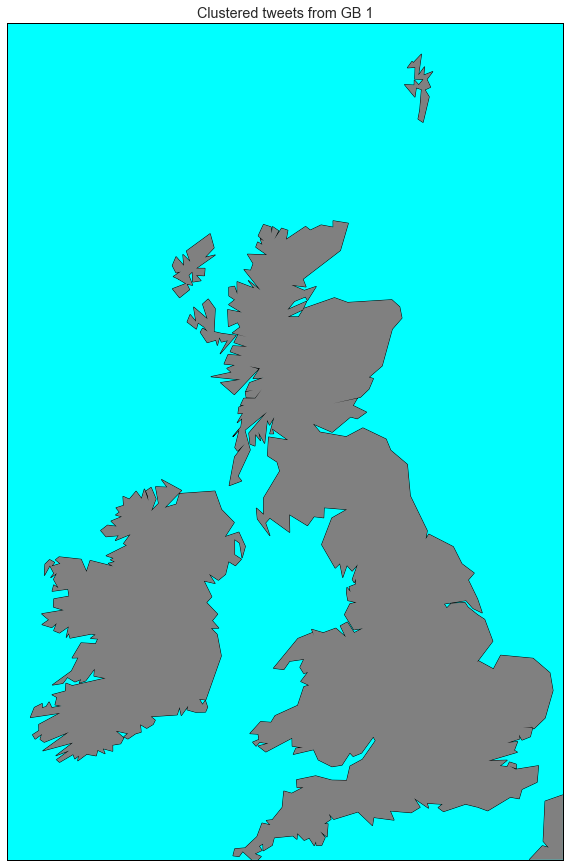

Making the Map took: 0.9650020599365234
Method 2 took: 0.0009710788726806641
[ 0 -1 -1  0  0  0 -1  0  0  0  0  0 -1  0  0  0]
start calculating
There were 4 out of 16 Tweets that were clustered as noise
This is 25.0%.


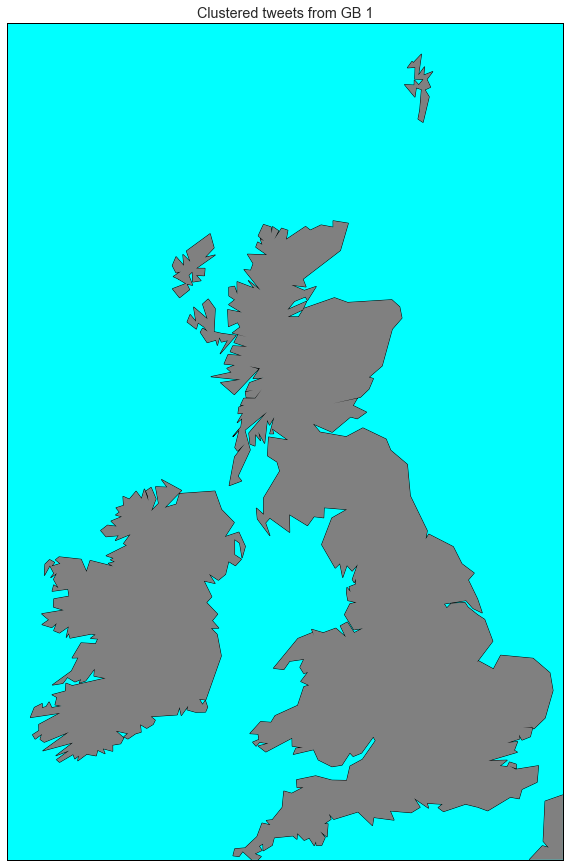

Making the Map took: 1.0459778308868408
Method 2 took: 0.0006330013275146484
[ 0 -1  0  0  0  0 -1]
start calculating
There were 2 out of 7 Tweets that were clustered as noise
This is 28.5714285714%.


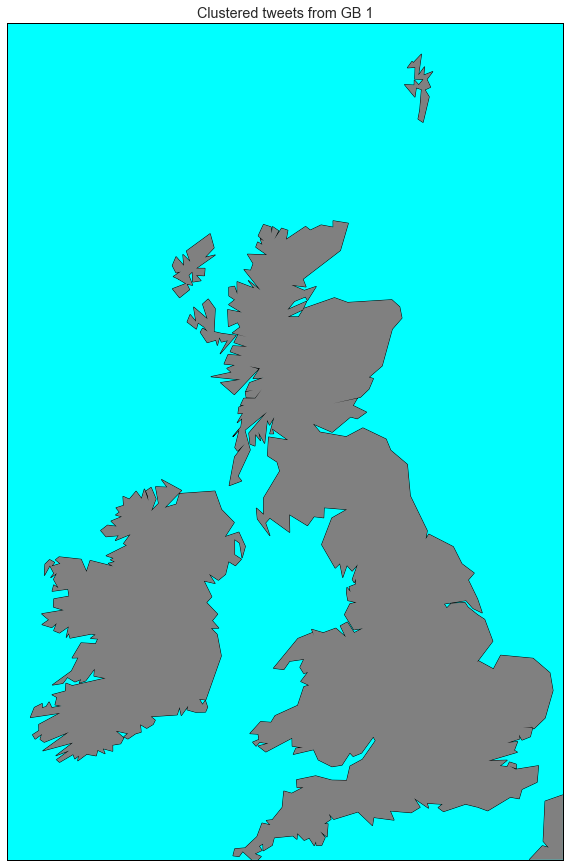

Making the Map took: 1.019531011581421
Method 2 took: 0.0008101463317871094
[-1  0  0  0  0  0]
start calculating
There were 1 out of 6 Tweets that were clustered as noise
This is 16.6666666667%.


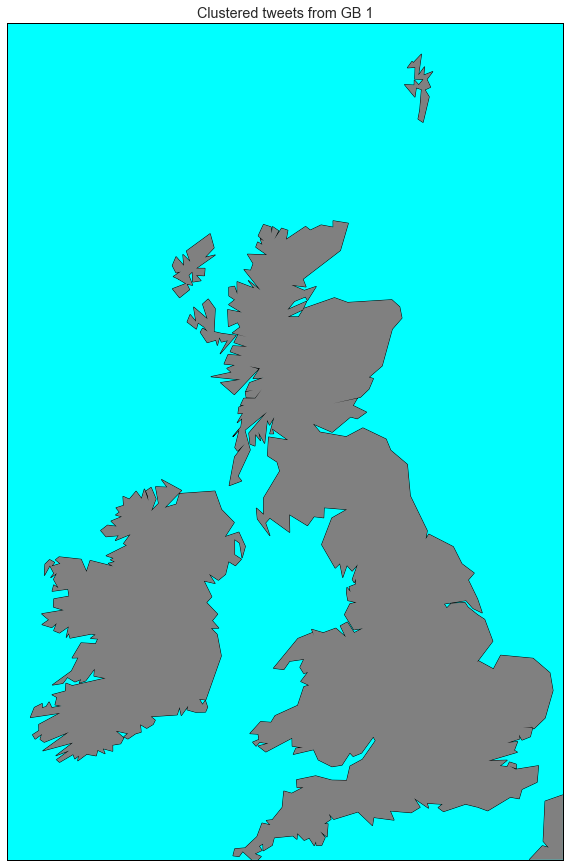

Making the Map took: 1.0235161781311035
There were 402 Tweets that were clustered as noise


In [54]:
import random
import time

#Method2

groupedByDay = [group[1] for group in df2.groupby([df2.index.year,df2.index.month,df2.index.day])]

#print(groupedByDay)

for dailyTweets in groupedByDay:
    print("Begin Analysis for next day")
    
    #get region clusters

    #set seed for sample
    seed = 4715
    random.seed(seed)
    numOfTweets = 1500
    
    if len(dailyTweets) > numOfTweets:
        rindex =  np.array(random.sample(range(len(dailyTweets)), numOfTweets))
    else:
        rindex = range(len(dailyTweets))
    sampleForMethod2 = dailyTweets.ix[rindex]
    
    #print(dailyTweets.AvgWordEmbeddings)
    #wordembeddings have to be separately picked
   
    
    labelsMethod2_loc = method2_location(sampleForMethod2, minpts=5, eps=0.1)
    print("labelsMethod2_loc: " + str(len(labelsMethod2_loc)))
    uniquelabels2 = set(labelsMethod2_loc)
    
    print("start calculating")
    #plot each cluster individually
    for region in uniquelabels2:
                     
        #currentClusterDF = subset dataframe by current k by index given in label variable
        class_member_mask = (labelsMethod2_loc == region)
              
        if region == -1:
            # don't print noise, but count number of noise tweets
            print("There were " + str(sum((class_member_mask))) + " Tweets that were clustered as noise")
            # m.scatter(x1, y1, s=4, marker="o", c=col, alpha=0.5, zorder=10)            
        else:
            #BUG IS HERE
            regiondf = sampleForMethod2[class_member_mask]
            
            if len(regiondf) > numOfTweets:
                print("length of regiondf: " + str(len(regiondf)))
                rindex2 =  np.array(random.sample(range(len(regiondf)), 20000))
            else:
                rindex2 = range(len(regiondf))
            sampleForMethod22 = regiondf.ix[rindex2]            
            
            we = sampleForMethod22.AvgWordEmbeddings.ix[rindex2]
            #sampleForMethod1 = df2.sample(n=set_size, random_state=seed)
            #print(we.values)
            
            minpts = 5
            
            start = time.time()
                       
            B = np.zeros((len(we),dimensions),float)
            B[:,0:]=np.vstack(we.as_matrix())

            B = B[~np.isnan(B).any(axis=1)]
            
            #print(B)
            
            #break
            db2 = DBSCAN(eps=0.4, min_samples=minpts, metric="cosine", algorithm='brute').fit(B)
            
            if len(np.unique(db2.labels_)) > 1:
                print("Method 2 took: " + str(time.time() - start))
                start = time.time()
                print(db2.labels_)
                #print(db2.labels_.any(1))
                make_the_Cluster_Eval(db2.labels_, regiondf)
                print("Making the Map took: " + str(time.time() - start))
    
    """for region_label in set(labelsMethod2_loc):
        print("Begin analysis for next region")
        #region = subset of dailyTweets by labelsMethod2_loc specified in region_label
        region = [group[1] for group in df2.groupby([df2.index.year,df2.index.month,df2.index.day])]
        labelsMethod2 = method2_semantic(region)
        make_the_Cluster_Eval(labelsMethod2, region)
    """

In [45]:
sampleForMethod22.head()

timestamp_ms
2016-07-01 17:58:24    [-0.739828970283, 0.27851848801, -0.426860143741, -0.294622230654, -0.170944824815, 0.1227019124...
2016-07-01 16:02:46    [-1.19786860049, 0.257474703093, 0.402487983306, 0.831723567254, -2.7567309107, 0.191709041595, ...
2016-07-01 14:49:16    [1.5809151956, 1.46616791402, 0.26807294786, -1.31421674256, -1.36984936893, 0.492094624655, -0....
2016-07-01 13:42:40    [0.268972123042, 1.92903293452, -1.5152807037, -1.82200564692, -0.470762789249, -0.904212129613,...
2016-07-01 17:55:18    [-0.710906187693, 0.309089104335, 0.683294852575, 0.443452974161, -1.04036124547, 0.860136936108...
Name: AvgWordEmbeddings, dtype: object

In [565]:
from datetime import datetime, date

# (now.astype('uint64') / 1e6).astype('uint32')
a = (df2.index.values.astype('uint64') / 1e9).astype('uint32').reshape(-1,1)

print(df2.index.values[0])
for i in range(1,10):
    b = abs((datetime.fromtimestamp(a[0]) - datetime.fromtimestamp(a[i])).days + 1)
    print(print(df2.index.values[i]))
    print(str(i) + " versuche " + str(b))

#print(b / np.timedelta64(1, 'D'))

2016-07-01T13:35:29.000000000
2016-07-01T13:35:29.000000000
None
1 versuche 1
2016-07-01T13:35:31.000000000
None
2 versuche 0
2016-07-01T13:35:31.000000000
None
3 versuche 0
2016-07-01T13:35:33.000000000
None
4 versuche 0
2016-07-01T13:35:33.000000000
None
5 versuche 0
2016-07-01T13:35:35.000000000
None
6 versuche 0
2016-07-01T13:35:42.000000000
None
7 versuche 0
2016-07-01T13:35:46.000000000
None
8 versuche 0
2016-07-01T13:35:54.000000000
None
9 versuche 0


In [474]:
print(df2.index.values[0])
print(df2.index.values[10000])

2016-07-01T13:35:29.000000000
2016-07-02T20:32:50.000000000


In [618]:
#sampleForMethod1.latitude.values.reshape(-1, 1).shape
#print(we.values)



B = np.zeros((len(sampleForMethod1),52+4),float)
B[:,0]= sampleForMethod1.latitude.values
B[:,1]= sampleForMethod1.longitude.values
B[:,2]= sampleForMethod1.User.values
B[:,3]= (sampleForMethod1.index.values.astype('uint64') / 1e9).astype('uint32')
B[:,4:]=np.vstack(we.values)
#B[:,4:]=np.vstack(A[:,-1])

#toge = np.hstack((sampleForMethod1.latitude.values.reshape(-1, 1), we.values.reshape(-1,1)))


In [38]:
regiondf

In [681]:
print(B[14,2])
for i in range(15,50):
    d(B[14,:], B[i,:], p="do")

433279840.0
text: 5.70738512784
time: 1.7999999999999998
spatial: 4.720235255005295
clean spatial in km 472.0235255005295
 
text: 7.0762468412
time: 1.7999999999999998
spatial: 1.1225771997532452
clean spatial in km 112.25771997532452
 
text: 6.36951620705
time: 1.7999999999999998
spatial: 1.0888050246414505
clean spatial in km 108.88050246414504
 
text: 6.91371613235
time: 0.0
spatial: 3.571734935914116
clean spatial in km 357.1734935914116
 
2356703569.0
text: 0.043735468237
time: 0.3
spatial: 0.7320380339524172
clean spatial in km 73.20380339524172
 
text: 5.45366375145
time: 0.0
spatial: 0.33386796062645785
clean spatial in km 33.386796062645786
 
1037157014.0
text: 0.118263821066
time: 0.8999999999999999
spatial: 4.43605068487943
clean spatial in km 443.605068487943
 
text: 5.64680959576
time: 1.7999999999999998
spatial: 7.490941860754471
clean spatial in km 749.094186075447
 
text: 4.2436468644
time: 1.5
spatial: 2.4276721918992785
clean spatial in km 242.76721918992786
 
text: 5

In [ ]:
df2.head(100).describe(include = 'all')

In [655]:
B[1,4] = 0.5